In [24]:
import numpy as np
import math
import matplotlib.pyplot as plt
import copy
TRAIN_FILE_X = 'data/q1/train_x.txt'
TRAIN_FILE_Y = 'data/q1/train_y.txt'
TEST_FILE_X = 'data/q1/test_x.txt'
TEST_FILE_Y = 'data/q1/test_y.txt'
VAL_FILE_X = 'data/q1/valid_x.txt'
VAL_FILE_Y = 'data/q1/valid_y.txt'

In [25]:
def readsparse(filename):
    data = []
    i = 0
    with open(filename) as f:
        for line in f:
            if(len(data)==0):
                head = line.split()
                data = np.zeros((int(head[0]),int(head[1]))).astype(float)
                i = 0
            else:
                for el in line.split():
                    val = float(el.split(':')[1])
                    ind = int(el.split(':')[0])
                    data[i][ind]=val
                i+=1
    return data

#### Load data

In [26]:
X = readsparse(TRAIN_FILE_X)
Y = np.genfromtxt(TRAIN_FILE_Y)

In [27]:
vX = readsparse(VAL_FILE_X)
vY = np.genfromtxt(VAL_FILE_Y)

In [28]:
tX = readsparse(TEST_FILE_X)
tY = np.genfromtxt(TEST_FILE_Y)

### Tree DS

In [29]:
def getEntropyforAttribute(X,Y,i):
    x = X[:,i]
    median = np.median(x)
    right = np.where(x > median)[0]
    left  = np.where(x <= median)[0]
    
    # If the attribute has no records / all records are same
    if(len(left)==0 or len(right)==0):
        return 10.0
    
    # Number of instances which are 1
    left1 = len(np.where(Y[left] == 1)[0])
    right1 = len(np.where(Y[right] == 1)[0])
    
    # Percentage of 1s using this classification
    leftP = float(left1)/float(len(left))
    rightP = float(right1)/float(len(right))
    
    # Calculating entropy
    S = 0
    if(leftP > 0):
        S -= leftP * math.log(leftP)
    if(rightP > 0):
        S -= rightP * math.log(rightP)
    return S/math.log(2)

In [30]:
numAttr = X.shape[1]

In [31]:
def maxEntropyAttribute(X,Y,removedattributes):
    attr = -1;
    minS = 1000;
    for i in range(0,numAttr):
        if i not in removedattributes:
            S = getEntropyforAttribute(X,Y,i);
            if (S < minS):
                minS = S;
                attr = i;
    return attr

### Tree Data structure

In [ ]:
l = [1,2,3,4]
s = l
# s = copy.deepcopy(l)
s.append(5)
print(l,s)

In [7]:
l = np.arange(100)

In [ ]:
np.random.shuffle(l)

In [ ]:
idn = np.where(l%5==0)[0]

In [ ]:
k = np.where(l[idn]%10==0)[0]

In [ ]:
idn

In [11]:
k = np.eye(4)


In [12]:
k

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [15]:
a = np.arange(20)

In [16]:
np.roll(a,-1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19,  0])

In [14]:
np.roll(k,-1,axis=0)

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]])

In [19]:
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [20]:
a[1:2] = [0]
a

array([ 0,  0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [45]:
class Tree:
    def __init__(self):
        self.left = None
        self.right = None
        self.val = -1
        self.attr = -1
        self.med = -1
        self.ht = -1
    def setVal(self,Y):
        if(len(Y)<1): 
            self.val = 0
            return
        if(np.mean(Y) >= 0.5):
            self.val = 1
        else: 
            self.val = 0
        return
    def fit(self,num,ht,htlim,removedattributes):
        global X, Y
        x = X[:num]
        y = Y[:num]
#         print(ht,removedattributes)
        if(len(x) < 10 or ht > htlim):
            ## This would be a leaf
            self.attr=-2
            self.setVal(y)
            # Roll back changes
            X = np.roll(X,-num,axis=0)
            Y = np.roll(Y,-num)
#             print("this was a leaf")
            return
        Attribute = maxEntropyAttribute(x,y,removedattributes)
        if(Attribute == -1):
            return
        self.attr = Attribute
        self.med = np.median(x[:,self.attr])
        self.setVal(y)
        self.ht = ht
        removedattributes.append(self.attr)
        lra = copy.deepcopy(removedattributes)
        rra = copy.deepcopy(removedattributes)
        left = np.where(x[:,self.attr] <= self.med)[0]
        right = np.where(x[:,self.attr] > self.med)[0]
        leftX = X[left]
        rightX = X[right]
        leftY = Y[left]
        rightY = Y[right]
        X[:len(leftY)] = leftX
        X[len(leftY):num] = rightX
        Y[:len(leftY)] = leftY
        Y[len(leftY):num] = rightY
        leftX = None
        rightX = None
        leftY = None
        rightY = None
        self.left = Tree()
        self.left.fit(len(left),ht+1,htlim,lra)
        
        self.right = Tree()
        self.right.fit(len(right),ht+1,htlim,rra)
    def printNode(self):
        print(self.attr,self.med,self.val)
    def printTree(self):
        self.printNode()
        if(self.left != None):
            print("<-")
            self.left.printTree()
        if(self.right != None):
            print("->")
            self.right.printTree()
    def predict(self,X):
        if(self.attr==-2):
            return self.val
        elif(self.attr==-1):
            return -1
        else:
            if(X[self.attr]>self.med):
                return self.right.predict(X)
            else:
                return self.left.predict(X)
    def count(self):
        if(self.attr==-2):
            return 0
        c=0
        if(self.right!=None):
            c += self.right.count()
        if(self.left!=None):
            c += self.left.count()
        c += 1
        return c
    def listTree(self,loc):
        if(self.attr == -2):
            return []
        l = [loc]
        if(self.left!=None):
            l += self.left.listTree(loc+"0")
        if(self.right!=None):
            l += self.right.listTree(loc+"1")
        return l
    def List(self):
        loc = ""
        l = []
        if(self.left!=None):
            l += self.left.listTree(loc+"0")
        if(self.right!=None):
            l += self.right.listTree(loc+"1")
        return l
    def modify(self,loc,val):
        if(len(loc)==0):
            orig = self.attr
            self.attr = val
            return orig
        else:
            if(loc[0]=='0'):
                return self.left.modify(loc[1:],val)
            else:
                return self.right.modify(loc[1:],val)
    def delete(self,loc):
        if(len(loc)==0):
            self.attr = -2
            self.right = None
            self.left = None
        else:
            if(loc[0]=='0'):
                self.left.delete(loc[1:])
            else:
                self.right.delete(loc[1:])
    def Accuracy(self,tX,tY):
        Correct = 0
        for i in range(0,len(tY)):
            if(tY[i]==root.predict(tX[i])):
                Correct+=1
        return float(Correct)/float(len(tY))

In [ ]:
root = None

In [36]:
l = len(X)

In [39]:
root = Tree()
root.fit(l,0,100,[])

(0, [])
node value 1
(1, [243])
node value 1
(2, [243, 216])
node value 1
(3, [243, 216, 394])
node value 1
(4, [243, 216, 394, 462])
node value 1
(5, [243, 216, 394, 462, 75])
node value 1
(6, [243, 216, 394, 462, 75, 252])
(7, [243, 216, 394, 462, 75, 252, 91])
(8, [243, 216, 394, 462, 75, 252, 91, 219])
(9, [243, 216, 394, 462, 75, 252, 91, 219, 410])
(10, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387])
(11, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96])
(12, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401])
(13, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76])
(14, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78])
(15, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437])
(16, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398])
(17, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448])
(18, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398

(59, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82])
(60, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102])
(61, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392])
(62, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 

node value 1
(84, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 192, 6, 217, 470])
node value 1
(85, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 192, 6, 217, 470, 14])
node value 1
(86, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404,

(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 192, 6, 217, 470, 14, 234, 108, 95, 472, 120, 135, 142, 113, 412, 118, 405, 106, 2, 66, 187])
node value 1
(101, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 192, 6, 217, 470, 14, 234, 108, 95, 472, 120, 135, 142, 113, 412, 118, 405, 106, 2, 66, 187, 182])
node value 1
(101, [243, 216, 39

(101, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 192, 6, 217, 470, 14, 234, 108, 95, 472, 120, 135, 142, 113, 412, 118, 405, 106, 52, 2, 43, 5])
(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 192, 6, 217, 470, 14, 234, 108, 95, 472, 120, 135, 142, 113, 412, 118, 405, 106, 52, 2, 43])
(99, [243, 216, 394, 462, 75, 252, 91, 219, 410, 

(101, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 192, 6, 217, 470, 14, 234, 108, 95, 472, 120, 135, 142, 113, 412, 118, 153, 233, 451, 69, 186, 52])
node value 1
(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 192, 6, 217, 470, 14, 234, 108, 95, 472, 120, 135, 142, 113, 412, 118, 153, 233, 451, 69, 186])
node value 1
(99, [243, 216, 

(99, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 192, 6, 217, 470, 14, 234, 108, 95, 472, 120, 135, 142, 113, 86, 163, 65, 81, 110, 156])
(98, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 192, 6, 217, 470, 14, 234, 108, 95, 472, 120, 135, 142, 113, 86, 163, 65, 81, 110])
(97, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 

node value 1
(101, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 192, 6, 217, 470, 14, 234, 108, 95, 472, 120, 135, 142, 21, 52, 253, 25, 114, 104, 20, 34, 391])
node value 1
(101, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 192, 6, 217, 470, 14, 234, 108, 95, 472, 120, 135, 142, 21, 52, 253, 25, 114, 104, 20, 34, 391])
node value 1
(100,

(101, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 192, 6, 217, 470, 14, 234, 108, 95, 472, 120, 135, 88, 52, 213, 55, 233, 153, 12, 358, 125, 8])
(101, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 192, 6, 217, 470, 14, 234, 108, 95, 472, 120, 135, 88, 52, 213, 55, 233, 153, 12, 358, 125, 8])
(100, [243, 216, 394, 462, 75, 252, 91, 219, 4

/home/dhull/.local/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/dhull/.local/lib/python2.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 192, 6, 217, 470, 14, 234, 108, 95, 472, 120, 135, 88, 52, 213, 55, 233, 153, 12, 0, 1])
(99, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 192, 6, 217, 470, 14, 234, 108, 95, 472, 120, 135, 88, 52, 213, 55, 233, 153, 12, 0])
(97, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 7

node value 1
(97, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 192, 6, 217, 470, 14, 234, 108, 95, 472, 56, 63, 69, 81, 169, 246, 2, 25])
node value 1
(98, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 192, 6, 217, 470, 14, 234, 108, 95, 472, 56, 63, 69, 81, 169, 246, 2, 25, 48])
node value 1
(99, [243, 216, 394, 462, 75, 252, 91, 219, 410

node value 1
(96, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 192, 6, 217, 470, 14, 234, 108, 95, 152, 164, 358, 201, 0, 33, 43, 83])
node value 1
(97, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 192, 6, 217, 470, 14, 234, 108, 95, 152, 164, 358, 201, 0, 33, 43, 83, 86])
node value 1
(98, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387,

(89, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 192, 6, 217, 470, 14, 234, 108, 95, 152])
(87, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 192, 6, 217, 470, 14, 234, 108])
node value 1
(88, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 17

(92, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 192, 6, 217, 412, 451, 14, 120, 139, 204, 25, 198, 142])
(93, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 192, 6, 217, 412, 451, 14, 120, 139, 204, 25, 198, 142, 0])
(94, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200

(97, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 192, 6, 217, 412, 451, 14, 120, 139, 204, 25, 198, 142, 0, 400, 215, 106, 114])
(98, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 192, 6, 217, 412, 451, 14, 120, 139, 204, 25, 198, 142, 0, 400, 215, 106, 114, 8])
(99, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 3

(101, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 192, 6, 217, 412, 451, 14, 120, 139, 204, 25, 198, 142, 0, 400, 215, 113, 12, 66, 411, 477, 117])
(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 192, 6, 217, 412, 451, 14, 120, 139, 204, 25, 198, 142, 0, 400, 215, 113, 12, 66, 411, 477])
(99, [243, 216, 394, 462, 75, 252, 91, 219, 410

(97, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 192, 6, 217, 412, 451, 14, 120, 139, 204, 25, 198, 142, 0, 400, 2, 110, 138])
(96, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 192, 6, 217, 412, 451, 14, 120, 139, 204, 25, 198, 142, 0, 400, 2, 110])
(95, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443

(101, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 192, 6, 217, 412, 451, 14, 120, 139, 204, 25, 198, 142, 0, 55, 12, 61, 2, 129, 27, 107, 24])
(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 192, 6, 217, 412, 451, 14, 120, 139, 204, 25, 198, 142, 0, 55, 12, 61, 2, 129, 27, 107])
(101, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 9

(99, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 192, 6, 217, 412, 451, 14, 120, 139, 204, 25, 118, 0, 2, 19, 20, 15, 23, 24, 5])
(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 192, 6, 217, 412, 451, 14, 120, 139, 204, 25, 118, 0, 2, 19, 20, 15, 23, 24, 5, 27])
(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 4

(98, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 192, 6, 217, 412, 451, 14, 120, 139, 204, 25, 118, 0, 2, 19, 20, 24, 27, 15])
(97, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 192, 6, 217, 412, 451, 14, 120, 139, 204, 25, 118, 0, 2, 19, 20, 24, 27])
(98, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 44

(98, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 192, 6, 217, 412, 451, 14, 120, 139, 204, 25, 118, 0, 2, 19, 20, 24, 27, 63])
(94, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 192, 6, 217, 412, 451, 14, 120, 139, 204, 25, 118, 0, 2, 19])
(95, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 4

(97, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 192, 6, 217, 412, 451, 14, 120, 139, 204, 25, 118, 0, 2, 19, 20, 24, 27])
(93, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 192, 6, 217, 412, 451, 14, 120, 139, 204, 25, 118, 0, 2])
(94, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 39

(88, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 192, 6, 217, 412, 451, 14, 120, 139])
(87, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 192, 6, 217, 412, 451, 14, 120])
(86, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385,

(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 192, 6, 477, 236, 79, 106, 69, 110, 233, 446, 457, 113, 23, 117, 254, 223, 153, 114, 111, 81])
(101, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 192, 6, 477, 236, 79, 106, 69, 110, 233, 446, 457, 113, 23, 117, 254, 223, 153, 114, 111, 81, 129])
(101, [243, 216, 394, 462, 75, 252, 91, 219

(84, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 192, 6, 477, 236])
node value 1
(83, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 192, 6, 477])
node value 1
(81, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176

node value 1
(98, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 192, 12, 400, 125, 207, 118, 169, 204, 21, 110, 152, 95, 129, 52, 201, 63, 177, 2])
node value 1
(99, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 192, 12, 400, 125, 207, 118, 169, 204, 21, 110, 152, 95, 129, 52, 201, 63, 177, 2, 8])
node value 1
(100, [243, 216, 394, 462, 75,

(87, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 192, 12, 400, 125, 207, 118, 169])
(86, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 192, 12, 400, 125, 207, 118])
(85, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 4

node value 1
(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 129, 142, 160, 66, 29, 50, 8, 74, 81, 106, 119, 125, 152, 23, 190, 164, 206, 114, 207, 49])
node value 1
(101, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 129, 142, 160, 66, 29, 50, 8, 74, 81, 106, 119, 125, 152, 23, 190, 164, 206, 114, 207, 49, 79])
node value 1
(101, [243,

(84, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 129, 142, 160, 66])
node value 1
(83, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 376, 129, 142, 160])
(82, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 

node value 1
(96, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 112, 160, 8, 2, 143, 48, 139, 207, 169, 33, 21, 0, 55, 27, 52, 49, 164])
node value 1
(97, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 112, 160, 8, 2, 143, 48, 139, 207, 169, 33, 21, 0, 55, 27, 52, 49, 164, 81])
node value 1
(98, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401

(89, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 112, 160, 8, 2, 143, 48, 139, 207, 169, 33])
(88, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 130, 174, 112, 160, 8, 2, 143, 48, 139, 207, 169])
node value 1
(87, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 1

(86, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 0, 6, 21, 12, 20, 61, 93, 63, 80])
(87, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 0, 6, 21, 12, 20, 61, 93, 63, 80, 27])
(88, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 

(99, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 0, 6, 21, 12, 20, 61, 93, 63, 80, 27, 1, 2, 5, 7, 8, 10, 11, 13, 14, 15, 16, 18])
(98, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 0, 6, 21, 12, 20, 61, 93, 63, 80, 27, 1, 2, 5, 7, 8, 10, 11, 13, 14, 15, 16])
(97, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390,

(95, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 0, 6, 21, 12, 20, 61, 93, 63, 27, 19, 1, 2, 5, 7, 8, 10, 11, 13])
(96, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 0, 6, 21, 12, 20, 61, 93, 63, 27, 19, 1, 2, 5, 7, 8, 10, 11, 13, 14])
(97, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228,

(89, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 0, 6, 21, 12, 20, 61, 93, 63, 27, 19, 1, 2])
(88, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 157, 458, 0, 6, 21, 12, 20, 61, 93, 63, 27, 19, 1])
(87, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 

node value 1
(86, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 160, 66, 21, 43, 0, 132, 129, 177, 12, 240, 182])
node value 1
(87, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 160, 66, 21, 43, 0, 132, 129, 177, 12, 240, 182, 111])
node value 1
(88, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 1

(90, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 160, 66, 21, 43, 0, 132, 129, 177, 12, 240, 182, 111, 49, 244, 27])
node value 1
(89, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 162, 160, 66, 21, 43, 0, 132, 129, 177, 12, 240, 182, 111, 49, 244])
(88, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 

node value 1
(85, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 472, 119, 12, 68, 140, 64, 101, 0, 15, 369, 23])
node value 1
(86, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 472, 119, 12, 68, 140, 64, 101, 0, 15, 369, 23, 84])
node value 1
(87, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404,

(86, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 472, 119, 12, 68, 140, 64, 101, 0, 15, 369, 23, 84])
node value 1
(85, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 134, 472, 119, 12, 68, 140, 64, 101, 0, 15, 369, 23])
node value 1
(84, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57

(90, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 110, 2, 25, 238, 52, 69, 5, 114, 140, 177, 22, 113, 118, 88, 23, 101, 63])
(91, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 110, 2, 25, 238, 52, 69, 5, 114, 140, 177, 22, 113, 118, 88, 23, 101, 63, 132])
(92, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 

(94, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 110, 2, 25, 238, 52, 69, 5, 114, 140, 177, 22, 113, 118, 88, 23, 101, 63, 132, 232, 375, 354])
(93, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 241, 110, 2, 25, 238, 52, 69, 5, 114, 140, 177, 22, 113, 118, 88, 23, 101, 63, 132, 232, 375])
node value 1
(92, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 1

node value 1
(74, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 101, 6])
node value 1
(75, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 101, 6, 8])
node value 1
(76, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116

(87, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 101, 6, 8, 23, 93, 111, 240, 198, 119, 245, 52, 71, 15, 24, 80])
(85, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 374, 101, 6, 8, 23, 93, 111, 240, 198, 119, 245, 52, 71, 15])
node value 1
(84, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38

(74, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 64, 114, 71])
node value 1
(73, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 9, 408, 64, 114])
node value 1
(72, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 1

node value 1
(87, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 163, 48, 52, 104, 0, 64, 111, 186, 90, 117, 123, 420, 234, 20, 114, 119, 201, 23])
node value 1
(88, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 163, 48, 52, 104, 0, 64, 111, 186, 90, 117, 123, 420, 234, 20, 114, 119, 201, 23, 230])
(89, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144,

(82, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 163, 48, 52, 104, 0, 64, 111, 186, 90, 117, 123, 420, 234])
node value 1
(81, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 421, 452, 163, 48, 52, 104, 0, 64, 111, 186, 90, 117, 123, 420])
(80, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4,

(74, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 9, 110, 108, 125, 140, 156, 161])
(75, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 9, 110, 108, 125, 140, 156, 161, 374])
(76, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475,

(96, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 9, 110, 108, 125, 140, 156, 161, 374, 411, 106, 454, 458, 420, 158, 66, 107, 169, 154, 29, 207, 12, 43, 152, 201, 2, 55, 88, 114, 90])
(97, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 9, 110, 108, 125, 140, 156, 161, 374, 411, 106, 454, 458, 420, 158, 66, 107, 169, 154, 29, 207, 12, 43, 152, 201, 2, 55, 88, 114, 90, 87])
(98, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 7

(89, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 9, 110, 108, 125, 140, 156, 161, 374, 411, 106, 454, 458, 420, 158, 66, 107, 169, 154, 29, 207, 12, 43])
(88, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 9, 110, 108, 125, 140, 156, 161, 374, 411, 106, 454, 458, 420, 158, 66, 107, 169, 154, 29, 207, 12])
(87, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 

(89, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 9, 110, 108, 125, 140, 156, 161, 374, 411, 106, 454, 458, 420, 158, 66, 107, 169, 154, 0, 5, 15, 20])
(88, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 9, 110, 108, 125, 140, 156, 161, 374, 411, 106, 454, 458, 420, 158, 66, 107, 169, 154, 0, 5, 15])
(86, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 3

(75, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 9, 110, 108, 125, 140, 156, 161, 374])
(74, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 62, 9, 110, 108, 125, 140, 156, 161])
(73, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475,

node value 1
(87, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 25, 117, 204, 411, 6, 14, 56, 458, 69, 134, 158, 452, 48, 65, 189, 376, 23, 370, 233, 108, 367])
node value 1
(88, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 25, 117, 204, 411, 6, 14, 56, 458, 69, 134, 158, 452, 48, 65, 189, 376, 23, 370, 233, 108, 367, 114])
(89, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144,

node value 1
(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 25, 117, 204, 411, 6, 14, 56, 458, 69, 134, 158, 452, 48, 65, 189, 376, 23, 370, 233, 108, 367, 114, 366, 163, 81, 234, 238, 112, 477, 106, 213, 50, 84, 22])
node value 1
(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 25, 117, 204, 411, 6, 14, 56, 458, 69, 134, 158, 452, 48, 65, 189, 376, 23, 370, 233, 108, 367, 114, 366, 163, 81, 234, 238, 112, 477, 106, 213, 50, 84, 22])
node value 1
(99, [243, 216, 3

(94, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 25, 117, 204, 411, 6, 14, 56, 458, 69, 134, 158, 452, 48, 65, 189, 376, 23, 370, 233, 108, 367, 114, 366, 0, 2, 5, 8, 15])
(93, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 25, 117, 204, 411, 6, 14, 56, 458, 69, 134, 158, 452, 48, 65, 189, 376, 23, 370, 233, 108, 367, 114, 366, 0, 2, 5, 8])
(92, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 22

node value 1
(99, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 25, 117, 204, 411, 6, 14, 56, 458, 69, 134, 158, 452, 48, 65, 189, 376, 23, 370, 233, 108, 367, 114, 142, 29, 5, 12, 215, 55, 8, 62, 477, 146, 156])
node value 1
(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 25, 117, 204, 411, 6, 14, 56, 458, 69, 134, 158, 452, 48, 65, 189, 376, 23, 370, 233, 108, 367, 114, 142, 29, 5, 12, 215, 55, 8, 62, 477, 146, 156, 110])
node value 1
(101, [243, 216, 394, 462, 75, 

node value 1
(96, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 25, 117, 204, 411, 6, 14, 56, 458, 69, 134, 158, 452, 48, 65, 189, 376, 23, 370, 233, 108, 367, 365, 101, 20, 22, 19, 15, 50, 93, 206])
node value 1
(96, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 25, 117, 204, 411, 6, 14, 56, 458, 69, 134, 158, 452, 48, 65, 189, 376, 23, 370, 233, 108, 367, 365, 101, 20, 22, 19, 15, 50, 93, 206])
node value 1
(95, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 

(95, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 25, 117, 204, 411, 6, 14, 56, 458, 69, 134, 158, 452, 48, 65, 189, 376, 23, 370, 233, 108, 367, 365, 101, 20, 22, 19, 15, 50, 84])
node value 1
(96, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 25, 117, 204, 411, 6, 14, 56, 458, 69, 134, 158, 452, 48, 65, 189, 376, 23, 370, 233, 108, 367, 365, 101, 20, 22, 19, 15, 50, 84, 87])
node value 1
(96, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 4

node value 1
(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 25, 117, 204, 411, 6, 14, 56, 458, 69, 134, 158, 452, 48, 65, 189, 376, 23, 370, 233, 108, 367, 365, 101, 20, 22, 19, 93, 151, 206, 209, 230, 0, 1, 2])
node value 1
(101, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 25, 117, 204, 411, 6, 14, 56, 458, 69, 134, 158, 452, 48, 65, 189, 376, 23, 370, 233, 108, 367, 365, 101, 20, 22, 19, 93, 151, 206, 209, 230, 0, 1, 2, 5])
node value 1
(101, [243, 216, 394, 462,

(101, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 25, 117, 204, 411, 6, 14, 56, 458, 69, 134, 158, 452, 48, 65, 189, 376, 23, 370, 233, 108, 367, 365, 101, 20, 22, 19, 93, 206, 0, 1, 2, 5, 7, 8, 9])
(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 25, 117, 204, 411, 6, 14, 56, 458, 69, 134, 158, 452, 48, 65, 189, 376, 23, 370, 233, 108, 367, 365, 101, 20, 22, 19, 93, 206, 0, 1, 2, 5, 7, 8])
(99, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 3

(93, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 25, 117, 204, 411, 6, 14, 56, 458, 69, 134, 158, 452, 48, 65, 189, 376, 23, 370, 233, 108, 367, 365, 101, 20, 22, 15, 151])
node value 1
(94, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 25, 117, 204, 411, 6, 14, 56, 458, 69, 134, 158, 452, 48, 65, 189, 376, 23, 370, 233, 108, 367, 365, 101, 20, 22, 15, 151, 206])
node value 1
(94, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 

(101, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 25, 117, 204, 411, 6, 14, 56, 458, 69, 134, 158, 452, 48, 65, 189, 376, 23, 370, 233, 207, 79, 108, 115, 88, 140, 160, 362, 107, 36, 34, 15, 50, 375, 29, 0])
node value 1
(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 25, 117, 204, 411, 6, 14, 56, 458, 69, 134, 158, 452, 48, 65, 189, 376, 23, 370, 233, 207, 79, 108, 115, 88, 140, 160, 362, 107, 36, 34, 15, 50, 375, 29])
(99, [243, 216, 394, 462, 75, 252, 91, 219, 41

(80, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 25, 117, 204, 411, 6, 14, 56, 458, 69, 134, 158, 452, 48, 65])
node value 1
(79, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 127, 25, 117, 204, 411, 6, 14, 56, 458, 69, 134, 158, 452, 48])
node value 1
(78, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 39

(75, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 113, 86, 204, 108, 174, 477, 65, 142, 106, 118])
(76, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 113, 86, 204, 108, 174, 477, 65, 142, 106, 118, 158])
(77, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 10

(99, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 113, 86, 204, 108, 174, 477, 65, 142, 106, 118, 158, 446, 472, 48, 242, 6, 81, 130, 114, 376, 163, 454, 215, 79, 88, 117, 234, 135, 63, 8, 140, 112, 52, 160])
(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 113, 86, 204, 108, 174, 477, 65, 142, 106, 118, 158, 446, 472, 48, 242, 6, 81, 130, 114, 376, 163, 454, 215, 79, 88, 117, 234, 135, 63, 8, 140, 112, 52, 160, 207])
(101, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 4

(96, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 113, 86, 204, 108, 174, 477, 65, 142, 106, 118, 158, 446, 472, 48, 242, 6, 81, 130, 114, 376, 163, 454, 215, 79, 88, 123, 405, 8, 29, 95, 375])
node value 1
(95, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 113, 86, 204, 108, 174, 477, 65, 142, 106, 118, 158, 446, 472, 48, 242, 6, 81, 130, 114, 376, 163, 454, 215, 79, 88, 123, 405, 8, 29, 95])
node value 1
(94, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437,

(79, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 113, 86, 204, 108, 174, 477, 65, 142, 106, 118, 158, 446, 472, 48])
(78, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 133, 32, 113, 86, 204, 108, 174, 477, 65, 142, 106, 118, 158, 446, 472])
(77, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 

(65, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 106, 375])
(64, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 202, 106])
(62, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475])
node value 1
(63, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 3

node value 1
(86, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 251, 253, 2, 62, 117, 140, 422, 5, 21, 160, 201, 207, 218, 238, 234, 63, 27, 29, 362, 113, 154, 66, 233, 375])
node value 1
(87, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 251, 253, 2, 62, 117, 140, 422, 5, 21, 160, 201, 207, 218, 238, 234, 63, 27, 29, 362, 113, 154, 66, 233, 375, 457])
node value 1
(88, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 1

(97, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 251, 253, 2, 62, 117, 140, 422, 5, 21, 160, 201, 207, 218, 238, 234, 63, 27, 29, 362, 113, 154, 66, 233, 375, 457, 119, 236, 15, 0, 1, 6, 7, 8, 9, 10])
(96, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 251, 253, 2, 62, 117, 140, 422, 5, 21, 160, 201, 207, 218, 238, 234, 63, 27, 29, 362, 113, 154, 66, 233, 375, 457, 119, 236, 15, 0, 1, 6, 7, 8, 9])
(95, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 1

(81, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 251, 253, 2, 62, 117, 140, 422, 5, 21, 160, 201, 207, 218, 238, 234, 63, 27, 29, 362])
node value 1
(80, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 475, 251, 253, 2, 62, 117, 140, 422, 5, 21, 160, 201, 207, 218, 238, 234, 63, 27, 29])
(79, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 4

(62, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 392, 52])
node value 1
(60, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102])
(61, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 43])
(62, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478,

(86, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 43, 376, 392, 2, 5, 33, 56, 62, 73, 81, 93, 29, 106, 108, 114, 127, 154, 163, 159, 79, 420, 451, 101, 140, 230, 67])
(87, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 43, 376, 392, 2, 5, 33, 56, 62, 73, 81, 93, 29, 106, 108, 114, 127, 154, 163, 159, 79, 420, 451, 101, 140, 230, 67, 55])
(88, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388

(97, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 43, 376, 392, 2, 5, 33, 56, 62, 73, 81, 93, 29, 106, 108, 114, 127, 154, 163, 159, 79, 420, 451, 101, 140, 230, 67, 55, 88, 160, 204, 90, 8, 361, 80, 110, 198, 50])
(96, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 43, 376, 392, 2, 5, 33, 56, 62, 73, 81, 93, 29, 106, 108, 114, 127, 154, 163, 159, 79, 420, 451, 101, 140, 230, 67, 55, 88, 160, 204, 90, 8, 361, 80, 110, 198])
(95, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 

(75, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 43, 376, 392, 2, 5, 33, 56, 62, 73, 81, 93, 29, 106, 108, 114])
(74, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 43, 376, 392, 2, 5, 33, 56, 62, 73, 81, 93, 29, 106, 108])
(73, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 102, 43, 376, 392, 2, 5, 33, 5

(71, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 454, 104, 376, 56, 120, 139, 158, 179, 156, 374, 392, 412])
(72, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 454, 104, 376, 56, 120, 139, 158, 179, 156, 374, 392, 412, 9])
(73, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 454, 104, 376, 56, 120, 139, 158, 179, 1

(96, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 454, 104, 376, 56, 120, 139, 158, 179, 156, 374, 392, 412, 9, 66, 73, 223, 81, 130, 163, 422, 142, 408, 202, 29, 253, 169, 420, 111, 182, 68, 215, 400, 206, 189, 125, 353, 108])
(97, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 454, 104, 376, 56, 120, 139, 158, 179, 156, 374, 392, 412, 9, 66, 73, 223, 81, 130, 163, 422, 142, 408, 202, 29, 253, 169, 420, 111, 182, 68, 215, 400, 206, 189, 125, 353, 108, 451])
(98, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 

(101, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 454, 104, 376, 56, 120, 139, 158, 179, 156, 374, 392, 412, 9, 66, 73, 223, 81, 130, 163, 422, 142, 408, 202, 29, 253, 169, 420, 111, 182, 68, 215, 400, 206, 189, 125, 353, 375, 74, 5, 152, 87, 113])
(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 454, 104, 376, 56, 120, 139, 158, 179, 156, 374, 392, 412, 9, 66, 73, 223, 81, 130, 163, 422, 142, 408, 202, 29, 253, 169, 420, 111, 182, 68, 215, 400, 206, 189, 125, 353, 375, 74, 5, 152, 87])
(99, [243, 216, 394, 462, 75, 252, 91, 219, 410

(97, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 454, 104, 376, 56, 120, 139, 158, 179, 156, 374, 392, 412, 9, 66, 73, 223, 81, 130, 163, 422, 142, 408, 202, 29, 253, 169, 420, 111, 182, 68, 215, 400, 206, 189, 125, 2, 79, 88])
(96, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 454, 104, 376, 56, 120, 139, 158, 179, 156, 374, 392, 412, 9, 66, 73, 223, 81, 130, 163, 422, 142, 408, 202, 29, 253, 169, 420, 111, 182, 68, 215, 400, 206, 189, 125, 2, 79])
(95, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 44

(92, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 454, 104, 376, 56, 120, 139, 158, 179, 156, 374, 392, 412, 9, 66, 73, 223, 81, 130, 163, 422, 142, 408, 202, 29, 253, 169, 420, 111, 0, 2, 8, 15, 19])
(90, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 454, 104, 376, 56, 120, 139, 158, 179, 156, 374, 392, 412, 9, 66, 73, 223, 81, 130, 163, 422, 142, 408, 202, 29, 253, 169, 420, 111, 0, 2, 8])
(89, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144

(86, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 454, 104, 376, 56, 120, 139, 158, 179, 156, 374, 392, 412, 9, 66, 73, 223, 81, 130, 163, 422, 142, 408, 202, 29, 253, 169, 420])
(87, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 454, 104, 376, 56, 120, 139, 158, 179, 156, 374, 392, 412, 9, 66, 73, 223, 81, 130, 163, 422, 142, 408, 202, 29, 253, 169, 420, 0])
(88, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176

(90, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 454, 104, 376, 56, 120, 139, 158, 179, 156, 374, 392, 412, 9, 66, 73, 223, 81, 130, 163, 422, 142, 408, 202, 29, 253, 169, 420, 0, 15, 19, 24])
(89, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 454, 104, 376, 56, 120, 139, 158, 179, 156, 374, 392, 412, 9, 66, 73, 223, 81, 130, 163, 422, 142, 408, 202, 29, 253, 169, 420, 0, 15, 19])
(90, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404

(85, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 454, 104, 376, 56, 120, 139, 158, 179, 156, 374, 392, 412, 9, 66, 73, 223, 81, 130, 163, 422, 142, 408, 202, 29, 253, 0])
(83, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 454, 104, 376, 56, 120, 139, 158, 179, 156, 374, 392, 412, 9, 66, 73, 223, 81, 130, 163, 422, 142, 408, 202, 29])
(84, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 

(77, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 454, 104, 376, 56, 120, 139, 158, 179, 156, 374, 392, 412, 9, 66, 73, 223, 81, 130])
node value 1
(76, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 454, 104, 376, 56, 120, 139, 158, 179, 156, 374, 392, 412, 9, 66, 73, 223, 81])
(75, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 16

(64, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 454, 6, 0, 2, 15])
node value 1
(62, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 454, 6, 0])
node value 1
(63, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 45, 98, 82, 454, 6, 0, 2])
node value 1
(64, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 39

(72, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 9, 412, 33, 130, 142, 472, 81, 181, 223, 110, 153, 234, 400, 102, 6, 361])
(73, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 9, 412, 33, 130, 142, 472, 81, 181, 223, 110, 153, 234, 400, 102, 6, 361, 29])
(74, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 9, 412, 33, 130, 142, 472, 81, 181, 223, 110,

(88, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 9, 412, 33, 130, 142, 472, 81, 181, 223, 110, 153, 234, 400, 102, 6, 361, 29, 8, 87, 88, 55, 68, 178, 52, 111, 159, 34, 0, 2, 245, 24, 138])
(87, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 9, 412, 33, 130, 142, 472, 81, 181, 223, 110, 153, 234, 400, 102, 6, 361, 29, 8, 87, 88, 55, 68, 178, 52, 111, 159, 34, 0, 2, 245, 24])
node value 1
(88, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47

(74, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 9, 412, 33, 130, 142, 472, 81, 181, 223, 110, 153, 234, 400, 102, 6, 361, 29, 8])
(75, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 9, 412, 33, 130, 142, 472, 81, 181, 223, 110, 153, 234, 400, 102, 6, 361, 29, 8, 2])
(75, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 168, 9, 412, 33, 130, 142, 472, 81, 1

node value 1
(66, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 113, 5, 135, 8, 23, 32, 27, 127, 238, 20, 111])
node value 1
(67, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 113, 5, 135, 8, 23, 32, 27, 127, 238, 20, 111, 50])
node value 1
(68, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 113, 5, 135, 8, 23, 32, 27, 127, 238, 20, 111, 50, 49])
node value 1
(69, [

(64, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 113, 5, 135, 8, 23, 32, 27, 127, 238])
node value 1
(63, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 113, 5, 135, 8, 23, 32, 27, 127])
node value 1
(62, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 116, 113, 5, 135, 8, 23, 32, 27])
node value 1
(61, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 43

(72, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 81, 422, 21, 33, 55, 52, 82, 61, 93, 114, 152, 66, 56, 207, 36, 22, 186, 19])
(71, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 81, 422, 21, 33, 55, 52, 82, 61, 93, 114, 152, 66, 56, 207, 36, 22, 186])
(70, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 175, 89, 235, 461, 81, 422, 21, 33, 55, 52, 82, 61, 93, 114, 152, 66, 56, 207, 36, 22])
node val

node value 1
(60, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 68, 69, 123, 36, 55, 52, 50, 100, 217, 391])
node value 1
(61, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 68, 69, 123, 36, 55, 52, 50, 100, 217, 391, 15])
node value 1
(62, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 59, 68, 69, 123, 36, 55, 52, 50, 100, 217, 391, 15, 20])
node value 1
(63, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 4

node value 1
(65, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 21, 12, 29, 102, 140, 161, 169, 2, 65, 88, 114, 134, 142, 132, 192, 201])
node value 1
(66, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 21, 12, 29, 102, 140, 161, 169, 2, 65, 88, 114, 134, 142, 132, 192, 201, 374])
node value 1
(67, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 21, 12, 29, 102, 140, 161, 169, 2, 65, 88, 114, 134, 142, 132, 192, 201, 374, 55])
node value 1
(68, [243,

node value 1
(89, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 21, 12, 29, 102, 140, 161, 169, 2, 65, 88, 114, 134, 142, 132, 192, 201, 374, 55, 204, 217, 253, 446, 375, 25, 470, 135, 49, 95, 63, 164, 472, 79, 117, 152, 153, 154, 191, 233, 186, 52])
node value 1
(90, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 21, 12, 29, 102, 140, 161, 169, 2, 65, 88, 114, 134, 142, 132, 192, 201, 374, 55, 204, 217, 253, 446, 375, 25, 470, 135, 49, 95, 63, 164, 472, 79, 117, 152, 153, 154, 191, 233, 186, 52, 368])
node value 1
(91, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17,

(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 21, 12, 29, 102, 140, 161, 169, 2, 65, 88, 114, 134, 142, 132, 192, 201, 374, 55, 204, 217, 253, 446, 375, 25, 470, 135, 49, 95, 63, 164, 472, 79, 117, 152, 153, 154, 191, 233, 186, 52, 368, 83, 0, 66, 225, 215, 15, 87, 93, 59, 370])
(98, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 21, 12, 29, 102, 140, 161, 169, 2, 65, 88, 114, 134, 142, 132, 192, 201, 374, 55, 204, 217, 253, 446, 375, 25, 470, 135, 49, 95, 63, 164, 472, 79, 117, 152, 153, 154, 191, 233, 186, 52, 368, 83, 0, 66, 225, 215, 15, 87, 93])
(97, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 4

(91, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 21, 12, 29, 102, 140, 161, 169, 2, 65, 88, 114, 134, 142, 132, 192, 201, 374, 55, 204, 217, 253, 446, 375, 25, 470, 135, 49, 95, 63, 164, 472, 79, 117, 152, 153, 154, 191, 233, 186, 52, 368, 83])
node value 1
(90, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 21, 12, 29, 102, 140, 161, 169, 2, 65, 88, 114, 134, 142, 132, 192, 201, 374, 55, 204, 217, 253, 446, 375, 25, 470, 135, 49, 95, 63, 164, 472, 79, 117, 152, 153, 154, 191, 233, 186, 52, 368])
node value 1
(91, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478

(83, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 21, 12, 29, 102, 140, 161, 169, 2, 65, 88, 114, 134, 142, 132, 192, 201, 374, 55, 204, 217, 253, 446, 375, 25, 470, 135, 49, 95, 63, 164, 472, 79, 117, 152])
node value 1
(82, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 21, 12, 29, 102, 140, 161, 169, 2, 65, 88, 114, 134, 142, 132, 192, 201, 374, 55, 204, 217, 253, 446, 375, 25, 470, 135, 49, 95, 63, 164, 472, 79, 117])
node value 1
(81, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388,

(90, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 21, 12, 29, 102, 140, 161, 169, 2, 65, 88, 114, 134, 142, 132, 192, 201, 374, 55, 204, 217, 253, 446, 375, 25, 470, 135, 49, 95, 63, 164, 66, 100, 186, 27, 106, 90, 52, 0, 87, 159, 391])
node value 1
(89, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 21, 12, 29, 102, 140, 161, 169, 2, 65, 88, 114, 134, 142, 132, 192, 201, 374, 55, 204, 217, 253, 446, 375, 25, 470, 135, 49, 95, 63, 164, 66, 100, 186, 27, 106, 90, 52, 0, 87, 159])
node value 1
(88, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 16

node value 1
(79, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 21, 12, 29, 102, 140, 161, 169, 2, 65, 88, 114, 134, 142, 132, 192, 201, 374, 55, 204, 217, 253, 446, 375, 25, 470, 135, 49, 5, 79, 36])
node value 1
(80, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 21, 12, 29, 102, 140, 161, 169, 2, 65, 88, 114, 134, 142, 132, 192, 201, 374, 55, 204, 217, 253, 446, 375, 25, 470, 135, 49, 5, 79, 36, 63])
node value 1
(81, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128,

(81, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 21, 12, 29, 102, 140, 161, 169, 2, 65, 88, 114, 134, 142, 132, 192, 201, 374, 55, 204, 217, 253, 446, 375, 25, 470, 135, 66, 15, 61, 93, 87, 355])
(80, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 21, 12, 29, 102, 140, 161, 169, 2, 65, 88, 114, 134, 142, 132, 192, 201, 374, 55, 204, 217, 253, 446, 375, 25, 470, 135, 66, 15, 61, 93, 87])
node value 1
(79, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 4

(74, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 21, 12, 29, 102, 140, 161, 169, 2, 65, 88, 114, 134, 142, 132, 192, 201, 374, 55, 204, 217, 253, 446, 375, 186, 0])
node value 1
(73, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 21, 12, 29, 102, 140, 161, 169, 2, 65, 88, 114, 134, 142, 132, 192, 201, 374, 55, 204, 217, 253, 446, 375, 186])
(71, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 469, 21, 12, 29, 102, 140, 161, 169, 2, 65, 88, 114, 134, 142

node value 1
(54, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 208, 98, 62, 106, 142, 189])
node value 1
(55, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 208, 98, 62, 106, 142, 189, 161])
node value 1
(56, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 208, 98, 62, 106, 142, 189, 161, 69])
node value 1
(57, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 

node value 1
(80, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 208, 98, 62, 106, 142, 189, 161, 69, 81, 392, 215, 234, 129, 420, 120, 88, 73, 472, 164, 153, 201, 0, 204, 8, 59, 207, 79, 95, 186, 217, 50, 231])
node value 1
(81, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 208, 98, 62, 106, 142, 189, 161, 69, 81, 392, 215, 234, 129, 420, 120, 88, 73, 472, 164, 153, 201, 0, 204, 8, 59, 207, 79, 95, 186, 217, 50, 231, 34])
node value 1
(82, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149,

(101, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 208, 98, 62, 106, 142, 189, 161, 69, 81, 392, 215, 234, 129, 420, 120, 88, 73, 472, 164, 153, 201, 0, 204, 8, 59, 207, 79, 95, 186, 217, 50, 231, 34, 90, 66, 119, 87, 112, 29, 33, 12, 52, 198, 121, 2, 240, 68, 363, 141, 354, 15, 151, 154])
node value 1
(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 208, 98, 62, 106, 142, 189, 161, 69, 81, 392, 215, 234, 129, 420, 120, 88, 73, 472, 164, 153, 201, 0, 204, 8, 59, 207, 79, 95, 186, 217, 50, 231, 34, 90, 66, 119, 87, 112, 29, 33, 12, 52, 198, 121, 2, 240, 68, 363, 141, 354, 15, 151])
node value 1
(101, [243, 216, 394, 462, 75, 252, 91,

(97, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 208, 98, 62, 106, 142, 189, 161, 69, 81, 392, 215, 234, 129, 420, 120, 88, 73, 472, 164, 153, 201, 0, 204, 8, 59, 207, 79, 95, 186, 217, 50, 231, 34, 90, 66, 119, 87, 112, 29, 33, 12, 52, 198, 121, 83, 84, 107, 141, 209])
node value 1
(96, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 208, 98, 62, 106, 142, 189, 161, 69, 81, 392, 215, 234, 129, 420, 120, 88, 73, 472, 164, 153, 201, 0, 204, 8, 59, 207, 79, 95, 186, 217, 50, 231, 34, 90, 66, 119, 87, 112, 29, 33, 12, 52, 198, 121, 83, 84, 107, 141])
node value 1
(95, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 3

(93, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 208, 98, 62, 106, 142, 189, 161, 69, 81, 392, 215, 234, 129, 420, 120, 88, 73, 472, 164, 153, 201, 0, 204, 8, 59, 207, 79, 95, 186, 217, 50, 231, 34, 90, 66, 119, 87, 112, 29, 33, 240, 84, 93, 19, 20])
node value 1
(92, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 208, 98, 62, 106, 142, 189, 161, 69, 81, 392, 215, 234, 129, 420, 120, 88, 73, 472, 164, 153, 201, 0, 204, 8, 59, 207, 79, 95, 186, 217, 50, 231, 34, 90, 66, 119, 87, 112, 29, 33, 240, 84, 93, 19])
(91, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453,

(94, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 208, 98, 62, 106, 142, 189, 161, 69, 81, 392, 215, 234, 129, 420, 120, 88, 73, 472, 164, 153, 201, 0, 204, 8, 59, 207, 79, 95, 186, 217, 50, 231, 34, 90, 66, 119, 87, 112, 29, 135, 22, 36, 19, 114, 107, 391])
node value 1
(93, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 208, 98, 62, 106, 142, 189, 161, 69, 81, 392, 215, 234, 129, 420, 120, 88, 73, 472, 164, 153, 201, 0, 204, 8, 59, 207, 79, 95, 186, 217, 50, 231, 34, 90, 66, 119, 87, 112, 29, 135, 22, 36, 19, 114, 107])
node value 1
(92, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 

(101, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 208, 98, 62, 106, 142, 189, 161, 69, 81, 392, 215, 234, 129, 420, 120, 88, 73, 472, 164, 153, 201, 0, 204, 8, 59, 207, 79, 95, 186, 217, 50, 231, 34, 90, 66, 119, 87, 112, 15, 71, 135, 101, 209, 93, 36, 19, 114, 121, 154, 107, 354, 24, 151])
node value 1
(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 208, 98, 62, 106, 142, 189, 161, 69, 81, 392, 215, 234, 129, 420, 120, 88, 73, 472, 164, 153, 201, 0, 204, 8, 59, 207, 79, 95, 186, 217, 50, 231, 34, 90, 66, 119, 87, 112, 15, 71, 135, 101, 209, 93, 36, 19, 114, 121, 154, 107, 354, 24])
node value 1
(99, [243, 216, 394, 462, 75, 252, 

node value 1
(83, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 208, 98, 62, 106, 142, 189, 161, 69, 81, 392, 215, 234, 129, 420, 120, 88, 73, 472, 164, 153, 201, 0, 204, 8, 59, 207, 79, 95, 186, 217, 50, 231, 34, 66, 83])
node value 1
(84, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 208, 98, 62, 106, 142, 189, 161, 69, 81, 392, 215, 234, 129, 420, 120, 88, 73, 472, 164, 153, 201, 0, 204, 8, 59, 207, 79, 95, 186, 217, 50, 231, 34, 66, 83, 15])
node value 1
(85, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176

(93, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 208, 98, 62, 106, 142, 189, 161, 69, 81, 392, 215, 234, 129, 420, 120, 88, 73, 472, 164, 153, 201, 0, 204, 8, 59, 207, 79, 95, 186, 217, 50, 231, 34, 66, 83, 15, 370, 61, 355, 209, 71, 19, 151, 24, 27])
node value 1
(92, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 208, 98, 62, 106, 142, 189, 161, 69, 81, 392, 215, 234, 129, 420, 120, 88, 73, 472, 164, 153, 201, 0, 204, 8, 59, 207, 79, 95, 186, 217, 50, 231, 34, 66, 83, 15, 370, 61, 355, 209, 71, 19, 151, 24])
node value 1
(90, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17,

(78, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 208, 98, 62, 106, 142, 189, 161, 69, 81, 392, 215, 234, 129, 420, 120, 88, 73, 472, 164, 153, 201, 0, 204, 8, 59, 207, 79, 95, 186, 217])
node value 1
(77, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 208, 98, 62, 106, 142, 189, 161, 69, 81, 392, 215, 234, 129, 420, 120, 88, 73, 472, 164, 153, 201, 0, 204, 8, 59, 207, 79, 95, 186])
node value 1
(76, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 208, 98, 62, 106

(87, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 208, 98, 62, 106, 142, 189, 161, 69, 81, 392, 215, 234, 129, 420, 120, 88, 73, 472, 164, 127, 181, 15, 49, 108, 207, 233, 2, 23, 100, 154, 153, 362, 67, 20, 112, 84, 0, 1, 5])
(88, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 208, 98, 62, 106, 142, 189, 161, 69, 81, 392, 215, 234, 129, 420, 120, 88, 73, 472, 164, 127, 181, 15, 49, 108, 207, 233, 2, 23, 100, 154, 153, 362, 67, 20, 112, 84, 0, 1, 5, 6])
(89, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 

(97, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 208, 98, 62, 106, 142, 189, 161, 69, 81, 392, 215, 234, 129, 420, 120, 88, 73, 472, 164, 127, 181, 15, 49, 108, 207, 233, 2, 23, 100, 154, 153, 362, 67, 20, 112, 84, 0, 1, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16])
(96, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 208, 98, 62, 106, 142, 189, 161, 69, 81, 392, 215, 234, 129, 420, 120, 88, 73, 472, 164, 127, 181, 15, 49, 108, 207, 233, 2, 23, 100, 154, 153, 362, 67, 20, 112, 84, 0, 1, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
(95, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 20

(94, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 208, 98, 62, 106, 142, 189, 161, 69, 81, 392, 215, 234, 129, 420, 120, 88, 73, 472, 164, 127, 181, 15, 49, 108, 207, 233, 2, 23, 100, 154, 153, 362, 67, 20, 0, 1, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
(95, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 208, 98, 62, 106, 142, 189, 161, 69, 81, 392, 215, 234, 129, 420, 120, 88, 73, 472, 164, 127, 181, 15, 49, 108, 207, 233, 2, 23, 100, 154, 153, 362, 67, 20, 0, 1, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16])
(96, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 

(89, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 208, 98, 62, 106, 142, 189, 161, 69, 81, 392, 215, 234, 129, 420, 120, 88, 73, 472, 164, 127, 181, 15, 49, 108, 207, 233, 2, 23, 100, 154, 153, 362, 67, 20, 0, 1, 5, 6, 7, 8, 9])
(88, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 208, 98, 62, 106, 142, 189, 161, 69, 81, 392, 215, 234, 129, 420, 120, 88, 73, 472, 164, 127, 181, 15, 49, 108, 207, 233, 2, 23, 100, 154, 153, 362, 67, 20, 0, 1, 5, 6, 7, 8])
(87, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 

(98, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 208, 98, 62, 106, 142, 189, 161, 69, 81, 392, 215, 234, 129, 420, 120, 88, 73, 472, 164, 127, 181, 15, 49, 108, 207, 233, 2, 23, 100, 154, 153, 362, 67, 20, 0, 1, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 18, 19, 21])
(99, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 208, 98, 62, 106, 142, 189, 161, 69, 81, 392, 215, 234, 129, 420, 120, 88, 73, 472, 164, 127, 181, 15, 49, 108, 207, 233, 2, 23, 100, 154, 153, 362, 67, 20, 0, 1, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 18, 19, 21, 22])
(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 3

(85, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 208, 98, 62, 106, 142, 189, 161, 69, 81, 392, 215, 234, 129, 420, 120, 88, 73, 472, 164, 127, 181, 15, 49, 108, 207, 233, 2, 23, 100, 154, 153, 362, 67, 20, 0, 1, 5])
(84, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 208, 98, 62, 106, 142, 189, 161, 69, 81, 392, 215, 234, 129, 420, 120, 88, 73, 472, 164, 127, 181, 15, 49, 108, 207, 233, 2, 23, 100, 154, 153, 362, 67, 20, 0, 1])
(83, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 

(63, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 208, 98, 62, 106, 142, 189, 161, 69, 81, 392, 215, 234, 129, 420, 120])
node value 1
(62, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 208, 98, 62, 106, 142, 189, 161, 69, 81, 392, 215, 234, 129, 420])
(61, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 208, 98, 62, 106, 142, 189, 161, 69, 81, 392, 215, 234, 129])
(60, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 

(84, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 208, 98, 62, 106, 142, 189, 161, 69, 81, 392, 215, 234, 8, 61, 66, 93, 207, 15, 164, 50, 355, 217, 209, 101, 154, 90, 231, 36, 129, 100, 354, 107, 391, 24, 19, 151])
node value 1
(83, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 208, 98, 62, 106, 142, 189, 161, 69, 81, 392, 215, 234, 8, 61, 66, 93, 207, 15, 164, 50, 355, 217, 209, 101, 154, 90, 231, 36, 129, 100, 354, 107, 391, 24, 19])
node value 1
(82, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97

(70, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 208, 98, 62, 106, 142, 189, 161, 69, 81, 392, 215, 234, 8, 61, 66, 93, 207, 15, 164, 50, 355, 217])
node value 1
(69, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 208, 98, 62, 106, 142, 189, 161, 69, 81, 392, 215, 234, 8, 61, 66, 93, 207, 15, 164, 50, 355])
node value 1
(68, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 208, 98, 62, 106, 142, 189, 161, 69, 81, 392, 215, 234, 8, 61, 66, 93, 207, 15, 164, 50])
no

(61, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 208, 0, 5, 24, 80, 1, 2, 6, 7, 8, 9, 10, 11])
(62, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 208, 0, 5, 24, 80, 1, 2, 6, 7, 8, 9, 10, 11, 12])
(63, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 208, 0, 5, 24, 80, 1, 2, 6, 7, 8, 9, 10, 11, 12, 13])
(64, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467

(88, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 208, 0, 5, 24, 80, 1, 2, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 42])
(89, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 208, 0, 5, 24, 80, 1, 2, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 42, 43])
(90, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 2

(95, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 208, 0, 5, 24, 80, 1, 2, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 42, 43, 44, 45, 46, 48, 49, 50])
(94, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 208, 0, 5, 24, 80, 1, 2, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 42, 43, 44, 45, 46, 48, 49])
(93, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176,

(71, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 208, 0, 5, 24, 80, 1, 2, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22])
(70, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 208, 0, 5, 24, 80, 1, 2, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21])
(69, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 393, 208, 0, 5, 24, 80, 1, 2, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20])
(68, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 

(58, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62])
(59, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62, 74])
(60, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62, 74, 95])
(61, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97,

(86, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62, 74, 95, 129, 201, 64, 159, 361, 173, 446, 82, 369, 108, 114, 111, 359, 240, 186, 55, 206, 165, 112, 80, 2, 36, 24, 217, 50, 140])
(87, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62, 74, 95, 129, 201, 64, 159, 361, 173, 446, 82, 369, 108, 114, 111, 359, 240, 186, 55, 206, 165, 112, 80, 2, 36, 24, 217, 50, 140, 370])
(88, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149,

(98, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62, 74, 95, 129, 201, 64, 159, 361, 173, 446, 82, 369, 108, 114, 111, 359, 240, 186, 55, 206, 165, 112, 80, 2, 36, 24, 217, 50, 140, 370, 354, 164, 52, 355, 20, 363, 27, 34, 151, 209, 135])
node value 1
(97, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62, 74, 95, 129, 201, 64, 159, 361, 173, 446, 82, 369, 108, 114, 111, 359, 240, 186, 55, 206, 165, 112, 80, 2, 36, 24, 217, 50, 140, 370, 354, 164, 52, 355, 20, 363, 27, 34, 151, 209])
(98, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443,

(99, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62, 74, 95, 129, 201, 64, 159, 361, 173, 446, 82, 369, 108, 114, 111, 359, 240, 186, 55, 206, 165, 112, 80, 2, 36, 24, 217, 50, 140, 370, 354, 164, 52, 355, 20, 363, 27, 34, 84, 67, 135, 178])
node value 1
(98, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62, 74, 95, 129, 201, 64, 159, 361, 173, 446, 82, 369, 108, 114, 111, 359, 240, 186, 55, 206, 165, 112, 80, 2, 36, 24, 217, 50, 140, 370, 354, 164, 52, 355, 20, 363, 27, 34, 84, 67, 135])
(97, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448

(101, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62, 74, 95, 129, 201, 64, 159, 361, 173, 446, 82, 369, 108, 114, 111, 359, 240, 186, 55, 206, 165, 112, 80, 2, 36, 24, 217, 50, 140, 370, 354, 164, 52, 355, 20, 363, 27, 67, 135, 71, 141, 178, 115, 154])
node value 1
(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62, 74, 95, 129, 201, 64, 159, 361, 173, 446, 82, 369, 108, 114, 111, 359, 240, 186, 55, 206, 165, 112, 80, 2, 36, 24, 217, 50, 140, 370, 354, 164, 52, 355, 20, 363, 27, 67, 135, 71, 141, 178, 115])
(99, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 40

(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62, 74, 95, 129, 201, 64, 159, 361, 173, 446, 82, 369, 108, 114, 111, 359, 240, 186, 55, 206, 165, 112, 80, 2, 36, 24, 217, 50, 140, 370, 354, 164, 52, 355, 20, 19, 391, 23, 178, 135, 84, 193, 107])
(99, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62, 74, 95, 129, 201, 64, 159, 361, 173, 446, 82, 369, 108, 114, 111, 359, 240, 186, 55, 206, 165, 112, 80, 2, 36, 24, 217, 50, 140, 370, 354, 164, 52, 355, 20, 19, 391, 23, 178, 135, 84, 193])
(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 44

(98, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62, 74, 95, 129, 201, 64, 159, 361, 173, 446, 82, 369, 108, 114, 111, 359, 240, 186, 55, 206, 165, 112, 80, 2, 36, 24, 217, 50, 140, 370, 354, 164, 52, 355, 363, 154, 34, 107, 115, 151, 193])
(97, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62, 74, 95, 129, 201, 64, 159, 361, 173, 446, 82, 369, 108, 114, 111, 359, 240, 186, 55, 206, 165, 112, 80, 2, 36, 24, 217, 50, 140, 370, 354, 164, 52, 355, 363, 154, 34, 107, 115, 151])
(96, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 

(101, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62, 74, 95, 129, 201, 64, 159, 361, 173, 446, 82, 369, 108, 114, 111, 359, 240, 186, 55, 206, 165, 112, 80, 2, 36, 24, 217, 50, 140, 370, 354, 164, 20, 105, 22, 355, 154, 358, 135, 193, 52, 141, 19, 34])
(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62, 74, 95, 129, 201, 64, 159, 361, 173, 446, 82, 369, 108, 114, 111, 359, 240, 186, 55, 206, 165, 112, 80, 2, 36, 24, 217, 50, 140, 370, 354, 164, 20, 105, 22, 355, 154, 358, 135, 193, 52, 141, 19])
(99, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 4

(86, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62, 74, 95, 129, 201, 64, 159, 361, 173, 446, 82, 369, 108, 114, 111, 359, 240, 186, 55, 206, 165, 112, 80, 2, 36, 24, 217, 164, 107])
(87, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62, 74, 95, 129, 201, 64, 159, 361, 173, 446, 82, 369, 108, 114, 111, 359, 240, 186, 55, 206, 165, 112, 80, 2, 36, 24, 217, 164, 107, 178])
(88, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 14

(94, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62, 74, 95, 129, 201, 64, 159, 361, 173, 446, 82, 369, 108, 114, 111, 359, 240, 186, 55, 206, 165, 112, 80, 2, 36, 24, 107, 50, 217, 363, 90, 209, 87, 355, 20, 141, 135])
(94, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62, 74, 95, 129, 201, 64, 159, 361, 173, 446, 82, 369, 108, 114, 111, 359, 240, 186, 55, 206, 165, 112, 80, 2, 36, 24, 107, 50, 217, 363, 90, 209, 87, 355, 20, 141, 135])
node value 1
(93, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200

(89, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62, 74, 95, 129, 201, 64, 159, 361, 173, 446, 82, 369, 108, 114, 111, 359, 240, 186, 55, 206, 165, 112, 80, 2, 36, 20, 67, 123, 151, 27, 19, 363])
(88, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62, 74, 95, 129, 201, 64, 159, 361, 173, 446, 82, 369, 108, 114, 111, 359, 240, 186, 55, 206, 165, 112, 80, 2, 36, 20, 67, 123, 151, 27, 19])
node value 1
(87, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47

(93, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62, 74, 95, 129, 201, 64, 159, 361, 173, 446, 82, 369, 108, 114, 111, 359, 240, 186, 55, 206, 165, 112, 80, 2, 36, 20, 67, 141, 357, 353, 27, 234, 151, 1, 7, 8])
(94, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62, 74, 95, 129, 201, 64, 159, 361, 173, 446, 82, 369, 108, 114, 111, 359, 240, 186, 55, 206, 165, 112, 80, 2, 36, 20, 67, 141, 357, 353, 27, 234, 151, 1, 7, 8, 10])
(95, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 

(91, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62, 74, 95, 129, 201, 64, 159, 361, 173, 446, 82, 369, 108, 114, 111, 359, 240, 186, 55, 206, 165, 112, 80, 2, 36, 20, 67, 141, 357, 353, 27, 234, 151, 1])
(90, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62, 74, 95, 129, 201, 64, 159, 361, 173, 446, 82, 369, 108, 114, 111, 359, 240, 186, 55, 206, 165, 112, 80, 2, 36, 20, 67, 141, 357, 353, 27, 234, 151])
node value 1
(89, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 4

(90, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62, 74, 95, 129, 201, 64, 159, 361, 173, 446, 82, 369, 108, 114, 111, 359, 240, 186, 55, 206, 165, 112, 80, 2, 19, 52, 135, 105, 152, 63, 20, 225, 164])
(90, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62, 74, 95, 129, 201, 64, 159, 361, 173, 446, 82, 369, 108, 114, 111, 359, 240, 186, 55, 206, 165, 112, 80, 2, 19, 52, 135, 105, 152, 63, 20, 225, 164])
(89, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57

(91, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62, 74, 95, 129, 201, 64, 159, 361, 173, 446, 82, 369, 108, 114, 111, 359, 240, 186, 55, 206, 165, 112, 80, 90, 140, 217, 50, 225, 234, 49, 151, 27, 355, 19])
(92, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62, 74, 95, 129, 201, 64, 159, 361, 173, 446, 82, 369, 108, 114, 111, 359, 240, 186, 55, 206, 165, 112, 80, 90, 140, 217, 50, 225, 234, 49, 151, 27, 355, 19, 363])
(93, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 

(92, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62, 74, 95, 129, 201, 64, 159, 361, 173, 446, 82, 369, 108, 114, 111, 359, 240, 186, 55, 206, 165, 112, 80, 90, 140, 217, 50, 225, 234, 49, 151, 27, 355, 19, 363])
(91, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62, 74, 95, 129, 201, 64, 159, 361, 173, 446, 82, 369, 108, 114, 111, 359, 240, 186, 55, 206, 165, 112, 80, 90, 140, 217, 50, 225, 234, 49, 151, 27, 355, 19])
(90, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 

(98, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62, 74, 95, 129, 201, 64, 159, 361, 173, 446, 82, 369, 108, 114, 111, 359, 240, 186, 55, 206, 165, 112, 80, 90, 140, 217, 50, 225, 234, 49, 151, 27, 353, 19, 363, 20, 354, 357, 355, 1, 2])
(99, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62, 74, 95, 129, 201, 64, 159, 361, 173, 446, 82, 369, 108, 114, 111, 359, 240, 186, 55, 206, 165, 112, 80, 90, 140, 217, 50, 225, 234, 49, 151, 27, 353, 19, 363, 20, 354, 357, 355, 1, 2, 7])
(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 5

(95, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62, 74, 95, 129, 201, 64, 159, 361, 173, 446, 82, 369, 108, 114, 111, 359, 240, 186, 55, 206, 165, 112, 80, 90, 140, 217, 50, 225, 234, 49, 151, 121, 19, 353, 27, 357, 363, 20])
(94, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62, 74, 95, 129, 201, 64, 159, 361, 173, 446, 82, 369, 108, 114, 111, 359, 240, 186, 55, 206, 165, 112, 80, 90, 140, 217, 50, 225, 234, 49, 151, 121, 19, 353, 27, 357, 363])
(93, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 4

(99, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62, 74, 95, 129, 201, 64, 159, 361, 173, 446, 82, 369, 108, 114, 111, 359, 240, 186, 55, 206, 165, 112, 80, 90, 140, 217, 50, 225, 234, 49, 151, 121, 19, 353, 27, 363, 20, 355, 1, 2, 7, 8])
(98, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62, 74, 95, 129, 201, 64, 159, 361, 173, 446, 82, 369, 108, 114, 111, 359, 240, 186, 55, 206, 165, 112, 80, 90, 140, 217, 50, 225, 234, 49, 151, 121, 19, 353, 27, 363, 20, 355, 1, 2, 7])
(97, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41

(91, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62, 74, 95, 129, 201, 64, 159, 361, 173, 446, 82, 369, 108, 114, 111, 359, 240, 186, 55, 206, 165, 112, 80, 90, 140, 217, 50, 225, 234, 49, 353, 354, 355, 83])
(90, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62, 74, 95, 129, 201, 64, 159, 361, 173, 446, 82, 369, 108, 114, 111, 359, 240, 186, 55, 206, 165, 112, 80, 90, 140, 217, 50, 225, 234, 49, 353, 354, 355])
(89, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 46

(89, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62, 74, 95, 129, 201, 64, 159, 361, 173, 446, 82, 369, 108, 114, 111, 359, 240, 186, 55, 206, 165, 112, 50, 217, 140, 234, 24, 233, 363, 19, 69, 49])
(88, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62, 74, 95, 129, 201, 64, 159, 361, 173, 446, 82, 369, 108, 114, 111, 359, 240, 186, 55, 206, 165, 112, 50, 217, 140, 234, 24, 233, 363, 19, 69])
(87, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176,

(91, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62, 74, 95, 129, 201, 64, 159, 361, 173, 446, 82, 369, 108, 114, 111, 359, 240, 186, 55, 206, 165, 22, 24, 112, 52, 50, 20, 105, 353, 355, 15, 135, 178, 80])
(90, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62, 74, 95, 129, 201, 64, 159, 361, 173, 446, 82, 369, 108, 114, 111, 359, 240, 186, 55, 206, 165, 22, 24, 112, 52, 50, 20, 105, 353, 355, 15, 135, 178])
(89, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 3

(80, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62, 74, 95, 129, 201, 64, 159, 361, 173, 446, 82, 369, 108, 114, 111, 359, 240, 186, 55, 206, 15, 19, 20])
(78, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62, 74, 95, 129, 201, 64, 159, 361, 173, 446, 82, 369, 108, 114, 111, 359, 240, 186, 55, 206, 15])
(79, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62, 74, 95,

(76, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62, 74, 95, 129, 201, 64, 159, 361, 173, 446, 82, 369, 108, 114, 111, 359, 15, 19, 22])
(75, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62, 74, 95, 129, 201, 64, 159, 361, 173, 446, 82, 369, 108, 114, 111, 359, 15, 19])
(76, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62, 74, 95, 129, 201, 64, 159, 361, 173, 446,

(61, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62, 74, 95, 129])
(60, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62, 74, 95])
(59, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 4, 224, 14, 207, 6, 9, 21, 0, 5, 12, 29, 66, 62, 74])
(58, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47,

node value 1
(63, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 134, 81, 242, 6, 86, 106, 120, 161, 143, 204, 59, 421, 451, 454, 140, 48, 73, 162])
node value 1
(64, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 134, 81, 242, 6, 86, 106, 120, 161, 143, 204, 59, 421, 451, 454, 140, 48, 73, 162, 446])
node value 1
(65, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 134, 81, 242, 6, 86, 106, 120, 161, 143, 204, 59, 421, 451, 454, 140, 48, 73, 162, 446, 420])
node value 1
(66, [243, 216, 394, 462, 75, 252

(89, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 134, 81, 242, 6, 86, 106, 120, 161, 143, 204, 59, 421, 451, 454, 140, 48, 73, 162, 446, 420, 82, 477, 202, 215, 63, 8, 135, 32, 119, 157, 375, 422, 52, 391, 93, 113, 114, 153, 130, 138, 141, 36, 49, 230])
(90, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 134, 81, 242, 6, 86, 106, 120, 161, 143, 204, 59, 421, 451, 454, 140, 48, 73, 162, 446, 420, 82, 477, 202, 215, 63, 8, 135, 32, 119, 157, 375, 422, 52, 391, 93, 113, 114, 153, 130, 138, 141, 36, 49, 230, 201])
(91, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171

(95, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 134, 81, 242, 6, 86, 106, 120, 161, 143, 204, 59, 421, 451, 454, 140, 48, 73, 162, 446, 420, 82, 477, 202, 215, 63, 8, 135, 32, 119, 157, 375, 422, 52, 391, 93, 113, 114, 153, 130, 138, 141, 36, 49, 230, 201, 213, 20, 203, 79, 90])
(94, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 134, 81, 242, 6, 86, 106, 120, 161, 143, 204, 59, 421, 451, 454, 140, 48, 73, 162, 446, 420, 82, 477, 202, 215, 63, 8, 135, 32, 119, 157, 375, 422, 52, 391, 93, 113, 114, 153, 130, 138, 141, 36, 49, 230, 201, 213, 20, 203, 79])
(95, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 39

(96, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 134, 81, 242, 6, 86, 106, 120, 161, 143, 204, 59, 421, 451, 454, 140, 48, 73, 162, 446, 420, 82, 477, 202, 215, 63, 8, 135, 32, 119, 157, 375, 422, 52, 391, 93, 113, 114, 153, 130, 138, 141, 36, 49, 230, 201, 213, 20, 107, 27, 151, 22])
(95, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 134, 81, 242, 6, 86, 106, 120, 161, 143, 204, 59, 421, 451, 454, 140, 48, 73, 162, 446, 420, 82, 477, 202, 215, 63, 8, 135, 32, 119, 157, 375, 422, 52, 391, 93, 113, 114, 153, 130, 138, 141, 36, 49, 230, 201, 213, 20, 107, 27, 151])
node value 1
(96, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448,

(95, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 134, 81, 242, 6, 86, 106, 120, 161, 143, 204, 59, 421, 451, 454, 140, 48, 73, 162, 446, 420, 82, 477, 202, 215, 63, 8, 135, 32, 119, 157, 375, 422, 52, 391, 93, 113, 114, 153, 130, 138, 141, 36, 49, 230, 201, 213, 203, 151, 24, 209])
node value 1
(94, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 134, 81, 242, 6, 86, 106, 120, 161, 143, 204, 59, 421, 451, 454, 140, 48, 73, 162, 446, 420, 82, 477, 202, 215, 63, 8, 135, 32, 119, 157, 375, 422, 52, 391, 93, 113, 114, 153, 130, 138, 141, 36, 49, 230, 201, 213, 203, 151, 24])
node value 1
(92, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398

(93, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 134, 81, 242, 6, 86, 106, 120, 161, 143, 204, 59, 421, 451, 454, 140, 48, 73, 162, 446, 420, 82, 477, 202, 215, 63, 8, 135, 32, 119, 157, 375, 422, 52, 391, 93, 113, 114, 153, 130, 138, 207, 151, 84, 20, 79, 191, 90, 104])
node value 1
(94, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 134, 81, 242, 6, 86, 106, 120, 161, 143, 204, 59, 421, 451, 454, 140, 48, 73, 162, 446, 420, 82, 477, 202, 215, 63, 8, 135, 32, 119, 157, 375, 422, 52, 391, 93, 113, 114, 153, 130, 138, 207, 151, 84, 20, 79, 191, 90, 104, 203])
node value 1
(94, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 

(96, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 134, 81, 242, 6, 86, 106, 120, 161, 143, 204, 59, 421, 451, 454, 140, 48, 73, 162, 446, 420, 82, 477, 202, 215, 63, 8, 135, 32, 119, 157, 375, 422, 52, 391, 93, 113, 114, 153, 130, 138, 207, 151, 84, 20, 79, 191, 90, 104, 0, 1, 2])
(95, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 134, 81, 242, 6, 86, 106, 120, 161, 143, 204, 59, 421, 451, 454, 140, 48, 73, 162, 446, 420, 82, 477, 202, 215, 63, 8, 135, 32, 119, 157, 375, 422, 52, 391, 93, 113, 114, 153, 130, 138, 207, 151, 84, 20, 79, 191, 90, 104, 0, 1])
(94, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 3

(97, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 134, 81, 242, 6, 86, 106, 120, 161, 143, 204, 59, 421, 451, 454, 140, 48, 73, 162, 446, 420, 82, 477, 202, 215, 63, 8, 135, 32, 119, 157, 375, 422, 52, 391, 93, 113, 114, 153, 130, 138, 207, 151, 84, 20, 79, 191, 90, 104, 0, 1, 2, 4])
(96, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 134, 81, 242, 6, 86, 106, 120, 161, 143, 204, 59, 421, 451, 454, 140, 48, 73, 162, 446, 420, 82, 477, 202, 215, 63, 8, 135, 32, 119, 157, 375, 422, 52, 391, 93, 113, 114, 153, 130, 138, 207, 151, 84, 20, 79, 191, 90, 104, 0, 1, 2])
(95, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41

(97, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 134, 81, 242, 6, 86, 106, 120, 161, 143, 204, 59, 421, 451, 454, 140, 48, 73, 162, 446, 420, 82, 477, 202, 215, 63, 8, 135, 32, 119, 157, 375, 422, 52, 391, 93, 113, 114, 153, 130, 138, 207, 151, 84, 20, 79, 191, 90, 0, 1, 2, 4, 5])
(96, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 134, 81, 242, 6, 86, 106, 120, 161, 143, 204, 59, 421, 451, 454, 140, 48, 73, 162, 446, 420, 82, 477, 202, 215, 63, 8, 135, 32, 119, 157, 375, 422, 52, 391, 93, 113, 114, 153, 130, 138, 207, 151, 84, 20, 79, 191, 90, 0, 1, 2, 4])
(95, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3,

(101, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 134, 81, 242, 6, 86, 106, 120, 161, 143, 204, 59, 421, 451, 454, 140, 48, 73, 162, 446, 420, 82, 477, 202, 215, 63, 8, 135, 32, 119, 157, 375, 422, 52, 391, 93, 113, 114, 153, 130, 138, 207, 151, 84, 20, 79, 191, 90, 104, 0, 1, 2, 4, 5, 7, 9, 10])
(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 134, 81, 242, 6, 86, 106, 120, 161, 143, 204, 59, 421, 451, 454, 140, 48, 73, 162, 446, 420, 82, 477, 202, 215, 63, 8, 135, 32, 119, 157, 375, 422, 52, 391, 93, 113, 114, 153, 130, 138, 207, 151, 84, 20, 79, 191, 90, 104, 0, 1, 2, 4, 5, 7, 9])
(99, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437

(101, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 134, 81, 242, 6, 86, 106, 120, 161, 143, 204, 59, 421, 451, 454, 140, 48, 73, 162, 446, 420, 82, 477, 202, 215, 63, 8, 135, 32, 119, 157, 375, 422, 52, 391, 93, 113, 114, 153, 130, 138, 207, 151, 84, 20, 79, 191, 203, 0, 1, 2, 4, 5, 7, 9, 10, 11])
(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 134, 81, 242, 6, 86, 106, 120, 161, 143, 204, 59, 421, 451, 454, 140, 48, 73, 162, 446, 420, 82, 477, 202, 215, 63, 8, 135, 32, 119, 157, 375, 422, 52, 391, 93, 113, 114, 153, 130, 138, 207, 151, 84, 20, 79, 191, 203, 0, 1, 2, 4, 5, 7, 9, 10])
(99, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437

(80, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 134, 81, 242, 6, 86, 106, 120, 161, 143, 204, 59, 421, 451, 454, 140, 48, 73, 162, 446, 420, 82, 477, 202, 215, 63, 8, 135, 32, 119, 157, 375, 422, 52, 391, 19])
node value 1
(78, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 134, 81, 242, 6, 86, 106, 120, 161, 143, 204, 59, 421, 451, 454, 140, 48, 73, 162, 446, 420, 82, 477, 202, 215, 63, 8, 135, 32, 119, 157, 375, 422, 52])
node value 1
(79, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 134, 81, 24

node value 1
(87, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 134, 81, 242, 6, 86, 106, 120, 161, 143, 204, 59, 421, 451, 454, 140, 48, 73, 162, 446, 420, 82, 477, 202, 215, 63, 8, 135, 32, 119, 157, 375, 422, 69, 83, 68, 177, 141, 5, 79, 164, 154, 206])
node value 1
(88, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 134, 81, 242, 6, 86, 106, 120, 161, 143, 204, 59, 421, 451, 454, 140, 48, 73, 162, 446, 420, 82, 477, 202, 215, 63, 8, 135, 32, 119, 157, 375, 422, 69, 83, 68, 177, 141, 5, 79, 164, 154, 206, 207])
node value 1
(89, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167

(91, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 134, 81, 242, 6, 86, 106, 120, 161, 143, 204, 59, 421, 451, 454, 140, 48, 73, 162, 446, 420, 82, 477, 202, 215, 63, 8, 135, 32, 119, 157, 375, 422, 69, 83, 68, 177, 141, 5, 79, 164, 154, 206, 207, 127, 201, 230])
node value 1
(90, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 134, 81, 242, 6, 86, 106, 120, 161, 143, 204, 59, 421, 451, 454, 140, 48, 73, 162, 446, 420, 82, 477, 202, 215, 63, 8, 135, 32, 119, 157, 375, 422, 69, 83, 68, 177, 141, 5, 79, 164, 154, 206, 207, 127, 201])
node value 1
(89, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 2

(68, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 134, 81, 242, 6, 86, 106, 120, 161, 143, 204, 59, 421, 451, 454, 140, 48, 73, 162, 446, 420, 82, 477, 202])
node value 1
(67, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 134, 81, 242, 6, 86, 106, 120, 161, 143, 204, 59, 421, 451, 454, 140, 48, 73, 162, 446, 420, 82, 477])
node value 1
(66, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 149, 433, 128, 134, 81, 242, 6, 86, 106, 120, 161, 143, 204, 59, 421, 451, 454, 140, 48, 73, 162, 446, 420, 82])
node value 1
(65,

node value 1
(43, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89])
node value 1
(44, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89, 400])
node value 1
(45, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89, 400, 65])
node value 1
(46, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89, 400, 65, 408])
node value 1
(47, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 44

node value 1
(76, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89, 400, 65, 408, 421, 142, 189, 452, 108, 62, 125, 110, 458, 48, 204, 235, 392, 461, 451, 192, 376, 420, 44, 98, 179, 224, 375, 374, 477, 56, 88, 6, 143, 433])
node value 1
(77, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89, 400, 65, 408, 421, 142, 189, 452, 108, 62, 125, 110, 458, 48, 204, 235, 392, 461, 451, 192, 376, 420, 44, 98, 179, 224, 375, 374, 477, 56, 88, 6, 143, 433, 422])
node value 1
(78, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89, 400, 65, 408, 421, 142, 189

node value 1
(98, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89, 400, 65, 408, 421, 142, 189, 452, 108, 62, 125, 110, 458, 48, 204, 235, 392, 461, 451, 192, 376, 420, 44, 98, 179, 224, 375, 374, 477, 56, 88, 6, 143, 433, 422, 251, 169, 8, 69, 162, 134, 232, 161, 2, 163, 32, 157, 454, 52, 81, 393, 93, 475, 215, 130, 368])
node value 1
(99, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89, 400, 65, 408, 421, 142, 189, 452, 108, 62, 125, 110, 458, 48, 204, 235, 392, 461, 451, 192, 376, 420, 44, 98, 179, 224, 375, 374, 477, 56, 88, 6, 143, 433, 422, 251, 169, 8, 69, 162, 134, 232, 161, 2, 163, 32, 157, 454, 52, 81, 393, 93, 475, 215, 130, 368, 213])
node value 1
(100, [243, 216, 394, 462, 75,

(97, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89, 400, 65, 408, 421, 142, 189, 452, 108, 62, 125, 110, 458, 48, 204, 235, 392, 461, 451, 192, 376, 420, 44, 98, 179, 224, 375, 374, 477, 56, 88, 6, 143, 433, 422, 251, 169, 8, 69, 162, 134, 232, 161, 2, 163, 32, 157, 454, 52, 81, 393, 93, 475, 215, 130])
(95, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89, 400, 65, 408, 421, 142, 189, 452, 108, 62, 125, 110, 458, 48, 204, 235, 392, 461, 451, 192, 376, 420, 44, 98, 179, 224, 375, 374, 477, 56, 88, 6, 143, 433, 422, 251, 169, 8, 69, 162, 134, 232, 161, 2, 163, 32, 157, 454, 52, 81, 393, 93, 475])
node value 1
(94, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 

(99, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89, 400, 65, 408, 421, 142, 189, 452, 108, 62, 125, 110, 458, 48, 204, 235, 392, 461, 451, 192, 376, 420, 44, 98, 179, 224, 375, 374, 477, 56, 88, 6, 143, 433, 422, 251, 169, 8, 69, 162, 134, 232, 161, 2, 163, 32, 157, 454, 52, 59, 5, 114, 190, 207, 223, 104, 405])
(98, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89, 400, 65, 408, 421, 142, 189, 452, 108, 62, 125, 110, 458, 48, 204, 235, 392, 461, 451, 192, 376, 420, 44, 98, 179, 224, 375, 374, 477, 56, 88, 6, 143, 433, 422, 251, 169, 8, 69, 162, 134, 232, 161, 2, 163, 32, 157, 454, 52, 59, 5, 114, 190, 207, 223, 104])
node value 1
(97, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 

node value 1
(91, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89, 400, 65, 408, 421, 142, 189, 452, 108, 62, 125, 110, 458, 48, 204, 235, 392, 461, 451, 192, 376, 420, 44, 98, 179, 224, 375, 374, 477, 56, 88, 6, 143, 433, 422, 251, 169, 8, 69, 162, 134, 232, 242, 82, 2, 161, 63, 112, 32])
node value 1
(92, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89, 400, 65, 408, 421, 142, 189, 452, 108, 62, 125, 110, 458, 48, 204, 235, 392, 461, 451, 192, 376, 420, 44, 98, 179, 224, 375, 374, 477, 56, 88, 6, 143, 433, 422, 251, 169, 8, 69, 162, 134, 232, 242, 82, 2, 161, 63, 112, 32, 130])
node value 1
(93, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58,

(94, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89, 400, 65, 408, 421, 142, 189, 452, 108, 62, 125, 110, 458, 48, 204, 235, 392, 461, 451, 192, 376, 420, 44, 98, 179, 224, 375, 374, 477, 56, 88, 6, 143, 433, 422, 251, 169, 8, 69, 162, 134, 232, 242, 82, 2, 161, 63, 112, 32, 130, 93, 174])
node value 1
(93, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89, 400, 65, 408, 421, 142, 189, 452, 108, 62, 125, 110, 458, 48, 204, 235, 392, 461, 451, 192, 376, 420, 44, 98, 179, 224, 375, 374, 477, 56, 88, 6, 143, 433, 422, 251, 169, 8, 69, 162, 134, 232, 242, 82, 2, 161, 63, 112, 32, 130, 93])
node value 1
(92, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72

node value 1
(93, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89, 400, 65, 408, 421, 142, 189, 452, 108, 62, 125, 110, 458, 48, 204, 235, 392, 461, 451, 192, 376, 420, 44, 98, 179, 224, 375, 374, 477, 56, 88, 6, 143, 433, 422, 251, 169, 8, 69, 162, 133, 2, 15, 19, 20, 104, 107, 151, 357, 0, 1])
node value 1
(94, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89, 400, 65, 408, 421, 142, 189, 452, 108, 62, 125, 110, 458, 48, 204, 235, 392, 461, 451, 192, 376, 420, 44, 98, 179, 224, 375, 374, 477, 56, 88, 6, 143, 433, 422, 251, 169, 8, 69, 162, 133, 2, 15, 19, 20, 104, 107, 151, 357, 0, 1, 4])
node value 1
(95, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 44

(91, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89, 400, 65, 408, 421, 142, 189, 452, 108, 62, 125, 110, 458, 48, 204, 235, 392, 461, 451, 192, 376, 420, 44, 98, 179, 224, 375, 374, 477, 56, 88, 6, 143, 433, 422, 251, 169, 8, 69, 162, 133, 2, 15, 19, 20, 104, 107, 151, 357])
node value 1
(90, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89, 400, 65, 408, 421, 142, 189, 452, 108, 62, 125, 110, 458, 48, 204, 235, 392, 461, 451, 192, 376, 420, 44, 98, 179, 224, 375, 374, 477, 56, 88, 6, 143, 433, 422, 251, 169, 8, 69, 162, 133, 2, 15, 19, 20, 104, 107, 151])
node value 1
(91, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 2

(95, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89, 400, 65, 408, 421, 142, 189, 452, 108, 62, 125, 110, 458, 48, 204, 235, 392, 461, 451, 192, 376, 420, 44, 98, 179, 224, 375, 374, 477, 56, 88, 6, 143, 433, 422, 251, 169, 8, 69, 162, 133, 2, 15, 19, 20, 104, 107, 151, 0, 1, 4, 5, 7])
(94, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89, 400, 65, 408, 421, 142, 189, 452, 108, 62, 125, 110, 458, 48, 204, 235, 392, 461, 451, 192, 376, 420, 44, 98, 179, 224, 375, 374, 477, 56, 88, 6, 143, 433, 422, 251, 169, 8, 69, 162, 133, 2, 15, 19, 20, 104, 107, 151, 0, 1, 4, 5])
(93, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 

(101, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89, 400, 65, 408, 421, 142, 189, 452, 108, 62, 125, 110, 458, 48, 204, 235, 392, 461, 451, 192, 376, 420, 44, 98, 179, 224, 375, 374, 477, 56, 88, 6, 143, 433, 422, 251, 169, 8, 69, 162, 133, 2, 15, 19, 20, 104, 121, 151, 0, 1, 4, 5, 7, 9, 10, 11, 12, 13, 14])
(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89, 400, 65, 408, 421, 142, 189, 452, 108, 62, 125, 110, 458, 48, 204, 235, 392, 461, 451, 192, 376, 420, 44, 98, 179, 224, 375, 374, 477, 56, 88, 6, 143, 433, 422, 251, 169, 8, 69, 162, 133, 2, 15, 19, 20, 104, 121, 151, 0, 1, 4, 5, 7, 9, 10, 11, 12, 13])
(99, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 39

(83, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89, 400, 65, 408, 421, 142, 189, 452, 108, 62, 125, 110, 458, 48, 204, 235, 392, 461, 451, 192, 376, 420, 44, 98, 179, 224, 375, 374, 477, 56, 88, 6, 143, 433, 422, 251, 169, 8, 69, 162, 133])
(81, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89, 400, 65, 408, 421, 142, 189, 452, 108, 62, 125, 110, 458, 48, 204, 235, 392, 461, 451, 192, 376, 420, 44, 98, 179, 224, 375, 374, 477, 56, 88, 6, 143, 433, 422, 251, 169, 8, 69])
(82, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89, 400, 65, 408, 421

(85, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89, 400, 65, 408, 421, 142, 189, 452, 108, 62, 125, 110, 458, 48, 204, 235, 392, 461, 451, 192, 376, 420, 44, 98, 179, 224, 375, 374, 477, 56, 88, 6, 143, 433, 422, 251, 0, 15, 132, 129, 240, 20, 49])
node value 1
(84, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89, 400, 65, 408, 421, 142, 189, 452, 108, 62, 125, 110, 458, 48, 204, 235, 392, 461, 451, 192, 376, 420, 44, 98, 179, 224, 375, 374, 477, 56, 88, 6, 143, 433, 422, 251, 0, 15, 132, 129, 240, 20])
node value 1
(83, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 

node value 1
(88, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89, 400, 65, 408, 421, 142, 189, 452, 108, 62, 125, 110, 458, 48, 204, 235, 392, 461, 451, 192, 376, 420, 44, 98, 179, 224, 375, 374, 477, 56, 88, 135, 169, 422, 2, 6, 8, 362, 59, 79, 82, 114, 134, 198, 23, 118])
node value 1
(89, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89, 400, 65, 408, 421, 142, 189, 452, 108, 62, 125, 110, 458, 48, 204, 235, 392, 461, 451, 192, 376, 420, 44, 98, 179, 224, 375, 374, 477, 56, 88, 135, 169, 422, 2, 6, 8, 362, 59, 79, 82, 114, 134, 198, 23, 118, 95])
node value 1
(90, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453,

(97, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89, 400, 65, 408, 421, 142, 189, 452, 108, 62, 125, 110, 458, 48, 204, 235, 392, 461, 451, 192, 376, 420, 44, 98, 179, 224, 375, 374, 477, 56, 88, 135, 169, 422, 2, 6, 8, 362, 59, 79, 82, 114, 134, 198, 23, 118, 95, 183, 433, 12, 36, 112, 93, 80, 245])
node value 1
(96, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89, 400, 65, 408, 421, 142, 189, 452, 108, 62, 125, 110, 458, 48, 204, 235, 392, 461, 451, 192, 376, 420, 44, 98, 179, 224, 375, 374, 477, 56, 88, 135, 169, 422, 2, 6, 8, 362, 59, 79, 82, 114, 134, 198, 23, 118, 95, 183, 433, 12, 36, 112, 93, 80])
node value 1
(95, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 

(77, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89, 400, 65, 408, 421, 142, 189, 452, 108, 62, 125, 110, 458, 48, 204, 235, 392, 461, 451, 192, 376, 420, 44, 98, 179, 224, 375, 374, 477, 56, 88, 135, 169, 422, 2])
node value 1
(76, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89, 400, 65, 408, 421, 142, 189, 452, 108, 62, 125, 110, 458, 48, 204, 235, 392, 461, 451, 192, 376, 420, 44, 98, 179, 224, 375, 374, 477, 56, 88, 135, 169, 422])
(75, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89, 400, 65, 408, 421, 142, 189, 452, 108, 62, 125, 110

(71, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89, 400, 65, 408, 421, 142, 189, 452, 108, 62, 125, 110, 458, 48, 204, 235, 392, 461, 451, 192, 376, 420, 44, 98, 179, 224, 375, 374, 15])
(69, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89, 400, 65, 408, 421, 142, 189, 452, 108, 62, 125, 110, 458, 48, 204, 235, 392, 461, 451, 192, 376, 420, 44, 98, 179, 224, 375])
node value 1
(70, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89, 400, 65, 408, 421, 142, 189, 452, 108, 62, 125, 110, 458, 48, 204, 235, 392, 461, 451, 192, 376, 420, 44, 98, 1

(93, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89, 400, 65, 408, 421, 142, 189, 452, 108, 62, 125, 110, 458, 48, 204, 235, 392, 461, 451, 192, 376, 420, 44, 98, 179, 224, 375, 56, 6, 32, 69, 82, 157, 183, 140, 9, 29, 79, 88, 114, 164, 8, 50, 63, 0, 27, 186, 23, 93, 15, 19])
node value 1
(92, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89, 400, 65, 408, 421, 142, 189, 452, 108, 62, 125, 110, 458, 48, 204, 235, 392, 461, 451, 192, 376, 420, 44, 98, 179, 224, 375, 56, 6, 32, 69, 82, 157, 183, 140, 9, 29, 79, 88, 114, 164, 8, 50, 63, 0, 27, 186, 23, 93, 15])
node value 1
(91, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 

(71, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89, 400, 65, 408, 421, 142, 189, 452, 108, 62, 125, 110, 458, 48, 204, 235, 392, 461, 451, 192, 376, 420, 44, 98, 179, 224, 375, 56, 6])
node value 1
(70, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89, 400, 65, 408, 421, 142, 189, 452, 108, 62, 125, 110, 458, 48, 204, 235, 392, 461, 451, 192, 376, 420, 44, 98, 179, 224, 375, 56])
(68, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89, 400, 65, 408, 421, 142, 189, 452, 108, 62, 125, 110, 458, 48, 204, 235, 392, 461, 451, 192, 376, 420, 44, 98,

(82, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89, 400, 65, 408, 421, 142, 189, 452, 108, 62, 125, 110, 458, 48, 204, 235, 392, 461, 451, 192, 376, 420, 156, 6, 29, 44, 0, 33, 132, 134, 12, 159, 238, 101, 111, 2, 5, 8, 15, 19])
node value 1
(81, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89, 400, 65, 408, 421, 142, 189, 452, 108, 62, 125, 110, 458, 48, 204, 235, 392, 461, 451, 192, 376, 420, 156, 6, 29, 44, 0, 33, 132, 134, 12, 159, 238, 101, 111, 2, 5, 8, 15])
node value 1
(80, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89, 400, 65, 

node value 1
(70, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89, 400, 65, 408, 421, 142, 189, 452, 108, 62, 125, 110, 458, 48, 204, 235, 392, 461, 451, 192, 22, 5, 0, 6, 49, 50, 59, 83])
node value 1
(71, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89, 400, 65, 408, 421, 142, 189, 452, 108, 62, 125, 110, 458, 48, 204, 235, 392, 461, 451, 192, 22, 5, 0, 6, 49, 50, 59, 83, 104])
node value 1
(72, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89, 400, 65, 408, 421, 142, 189, 452, 108, 62, 125, 110, 458, 48, 204, 235, 392, 461, 451, 192, 22, 5

(61, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89, 400, 65, 408, 421, 142, 189, 452, 108, 62, 125, 110, 458, 48, 204, 235, 392, 461, 451])
node value 1
(60, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89, 400, 65, 408, 421, 142, 189, 452, 108, 62, 125, 110, 458, 48, 204, 235, 392, 461])
node value 1
(59, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 388, 109, 89, 400, 65, 408, 421, 142, 189, 452, 108, 62, 125, 110, 458, 48, 204, 235, 392])
node value 1
(58, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58

(58, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 109, 2, 8, 55, 23, 161, 20, 49, 50, 114, 177, 27, 141, 363, 67, 100, 93, 245])
(59, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 109, 2, 8, 55, 23, 161, 20, 49, 50, 114, 177, 27, 141, 363, 67, 100, 93, 245, 230])
(60, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 176, 38, 97, 109, 2, 8, 55, 23, 161, 20, 49, 50, 114, 177, 27, 141, 363, 67, 100, 93, 245, 230, 151])
(61, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 4

node value 1
(39, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 19, 12])
node value 1
(40, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 19, 12, 0])
node value 1
(41, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 19, 12, 0, 67])
node value 1
(42, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 47, 19, 12, 0, 67, 69])
node value 1
(43, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 3

node value 1
(57, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457])
node value 1
(58, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 461])
node value 1
(59, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 461, 156])
node value 1
(60, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 

node value 1
(86, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 461, 156, 179, 118, 113, 393, 168, 176, 142, 375, 139, 241, 454, 421, 86, 69, 157, 132, 82, 88, 422, 158, 477, 189, 215, 62, 23, 234, 6])
node value 1
(87, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 461, 156, 179, 118, 113, 393, 168, 176, 142, 375, 139, 241, 454, 421, 86, 69, 157, 132, 82, 88, 422, 158, 477, 189, 215, 62, 23, 234, 6, 246])
node value 1
(88, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 

(98, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 461, 156, 179, 118, 113, 393, 168, 176, 142, 375, 139, 241, 454, 421, 86, 69, 157, 132, 82, 88, 422, 158, 477, 189, 215, 62, 23, 234, 6, 246, 130, 163, 79, 114, 135, 159, 204, 191, 201, 59, 12])
(97, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 461, 156, 179, 118, 113, 393, 168, 176, 142, 375, 139, 241, 454, 421, 86, 69, 157, 132, 82, 88, 422, 158, 477, 189, 215, 62, 23, 234, 6, 246, 130, 163, 79, 114, 135, 159, 204, 191, 201, 59])
(96, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437

(101, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 461, 156, 179, 118, 113, 393, 168, 176, 142, 375, 139, 241, 454, 421, 86, 69, 157, 132, 82, 88, 422, 158, 477, 189, 215, 62, 23, 234, 6, 246, 130, 163, 79, 114, 135, 159, 21, 32, 48, 63, 109, 160, 182, 183])
node value 1
(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 461, 156, 179, 118, 113, 393, 168, 176, 142, 375, 139, 241, 454, 421, 86, 69, 157, 132, 82, 88, 422, 158, 477, 189, 215, 62, 23, 234, 6, 246, 130, 163, 79, 114, 135, 159, 21, 32, 48, 63, 109, 160, 182])
node value 1
(99, [243, 216, 394, 

(101, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 461, 156, 179, 118, 113, 393, 168, 176, 142, 375, 139, 241, 454, 421, 86, 69, 157, 132, 82, 88, 422, 158, 477, 189, 215, 62, 23, 234, 6, 246, 130, 163, 79, 114, 29, 127, 451, 45, 59, 104, 204, 192, 123, 119])
node value 1
(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 461, 156, 179, 118, 113, 393, 168, 176, 142, 375, 139, 241, 454, 421, 86, 69, 157, 132, 82, 88, 422, 158, 477, 189, 215, 62, 23, 234, 6, 246, 130, 163, 79, 114, 29, 127, 451, 45, 59, 104, 204, 192, 123])
node value 1
(99, [243, 216, 394

node value 1
(87, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 461, 156, 179, 118, 113, 393, 168, 176, 142, 375, 139, 241, 454, 421, 86, 69, 157, 132, 82, 88, 422, 158, 477, 189, 215, 62, 23, 181, 2, 109])
node value 1
(88, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 461, 156, 179, 118, 113, 393, 168, 176, 142, 375, 139, 241, 454, 421, 86, 69, 157, 132, 82, 88, 422, 158, 477, 189, 215, 62, 23, 181, 2, 109, 97])
node value 1
(89, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 2

(97, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 461, 156, 179, 118, 113, 393, 168, 176, 142, 375, 139, 241, 454, 421, 86, 69, 157, 132, 82, 88, 422, 158, 477, 189, 215, 62, 23, 181, 2, 109, 97, 127, 192, 33, 238, 177, 198, 81, 470, 32])
node value 1
(96, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 461, 156, 179, 118, 113, 393, 168, 176, 142, 375, 139, 241, 454, 421, 86, 69, 157, 132, 82, 88, 422, 158, 477, 189, 215, 62, 23, 181, 2, 109, 97, 127, 192, 33, 238, 177, 198, 81, 470])
node value 1
(95, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 40

(91, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 461, 156, 179, 118, 113, 393, 168, 176, 142, 375, 139, 241, 454, 421, 86, 69, 157, 132, 82, 88, 422, 158, 477, 189, 79, 114, 201, 6, 22, 245, 368, 115, 34, 61])
node value 1
(90, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 461, 156, 179, 118, 113, 393, 168, 176, 142, 375, 139, 241, 454, 421, 86, 69, 157, 132, 82, 88, 422, 158, 477, 189, 79, 114, 201, 6, 22, 245, 368, 115, 34])
node value 1
(89, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 4

node value 1
(87, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 461, 156, 179, 118, 113, 393, 168, 176, 142, 375, 139, 241, 454, 421, 86, 69, 157, 132, 82, 88, 8, 189, 79, 108, 215, 159, 422, 83, 158, 110])
node value 1
(88, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 461, 156, 179, 118, 113, 393, 168, 176, 142, 375, 139, 241, 454, 421, 86, 69, 157, 132, 82, 88, 8, 189, 79, 108, 215, 159, 422, 83, 158, 110, 23])
node value 1
(89, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 2

(98, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 461, 156, 179, 118, 113, 393, 168, 176, 142, 375, 139, 241, 454, 421, 86, 69, 157, 132, 82, 88, 8, 189, 79, 108, 215, 159, 422, 83, 158, 110, 23, 192, 123, 129, 135, 174, 472, 109, 63, 217, 186])
node value 1
(97, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 461, 156, 179, 118, 113, 393, 168, 176, 142, 375, 139, 241, 454, 421, 86, 69, 157, 132, 82, 88, 8, 189, 79, 108, 215, 159, 422, 83, 158, 110, 23, 192, 123, 129, 135, 174, 472, 109, 63, 217])
node value 1
(96, [243, 216, 394, 462, 75, 252, 91, 219, 410

(78, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 461, 156, 179, 118, 113, 393, 168, 176, 142, 375, 139, 241, 454, 421, 86, 69, 157, 132, 82, 88, 8])
(76, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 461, 156, 179, 118, 113, 393, 168, 176, 142, 375, 139, 241, 454, 421, 86, 69, 157, 132, 82])
(75, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 45

node value 1
(92, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 461, 156, 179, 118, 113, 393, 168, 176, 142, 375, 139, 241, 454, 421, 86, 127, 110, 2, 21, 0, 8, 23, 64, 68, 140, 104, 114, 165, 186, 207, 61, 15, 19, 20, 22])
node value 1
(93, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 461, 156, 179, 118, 113, 393, 168, 176, 142, 375, 139, 241, 454, 421, 86, 127, 110, 2, 21, 0, 8, 23, 64, 68, 140, 104, 114, 165, 186, 207, 61, 15, 19, 20, 22, 24])
node value 1
(93, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58

(74, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 461, 156, 179, 118, 113, 393, 168, 176, 142, 375, 139, 241, 454, 421, 86, 127, 110])
(73, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 461, 156, 179, 118, 113, 393, 168, 176, 142, 375, 139, 241, 454, 421, 86, 127])
(71, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 461, 156, 179, 118, 113, 

(89, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 461, 156, 179, 118, 113, 393, 168, 176, 142, 375, 139, 241, 454, 128, 204, 239, 5, 173, 48, 81, 370, 140, 234, 353, 8, 365, 90, 64, 0, 52, 100, 230])
(90, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 461, 156, 179, 118, 113, 393, 168, 176, 142, 375, 139, 241, 454, 128, 204, 239, 5, 173, 48, 81, 370, 140, 234, 353, 8, 365, 90, 64, 0, 52, 100, 230, 114])
(91, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 

(94, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 461, 156, 179, 118, 113, 393, 168, 176, 142, 375, 139, 241, 454, 128, 204, 239, 5, 173, 48, 81, 370, 140, 234, 353, 8, 365, 90, 64, 0, 52, 100, 230, 114, 363, 177, 88, 233])
(93, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 461, 156, 179, 118, 113, 393, 168, 176, 142, 375, 139, 241, 454, 128, 204, 239, 5, 173, 48, 81, 370, 140, 234, 353, 8, 365, 90, 64, 0, 52, 100, 230, 114, 363, 177, 88])
node value 1
(92, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3

(75, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 461, 156, 179, 118, 113, 393, 168, 176, 142, 375, 139, 241, 454, 128, 204, 239, 5, 173])
node value 1
(74, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 461, 156, 179, 118, 113, 393, 168, 176, 142, 375, 139, 241, 454, 128, 204, 239, 5])
(73, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 461,

node value 1
(86, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 461, 156, 179, 118, 113, 393, 168, 176, 142, 375, 477, 134, 2, 231, 132, 191, 422, 32, 79, 223, 45, 48, 8, 43, 64, 234, 59, 63, 33])
node value 1
(87, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 461, 156, 179, 118, 113, 393, 168, 176, 142, 375, 477, 134, 2, 231, 132, 191, 422, 32, 79, 223, 45, 48, 8, 43, 64, 234, 59, 63, 33, 177])
node value 1
(88, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 

(99, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 461, 156, 179, 118, 113, 393, 168, 176, 142, 375, 477, 134, 2, 231, 132, 191, 422, 32, 79, 223, 45, 48, 8, 43, 64, 234, 59, 63, 33, 177, 110, 135, 112, 81, 164, 207, 193, 227, 233, 119, 358, 23])
node value 1
(98, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 461, 156, 179, 118, 113, 393, 168, 176, 142, 375, 477, 134, 2, 231, 132, 191, 422, 32, 79, 223, 45, 48, 8, 43, 64, 234, 59, 63, 33, 177, 110, 135, 112, 81, 164, 207, 193, 227, 233, 119, 358])
(97, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 4

(79, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 461, 156, 179, 118, 113, 393, 168, 176, 142, 375, 477, 134, 2, 231, 132, 191, 422, 32, 79, 223, 45, 48])
node value 1
(78, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 461, 156, 179, 118, 113, 393, 168, 176, 142, 375, 477, 134, 2, 231, 132, 191, 422, 32, 79, 223, 45])
node value 1
(77, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 

(78, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 461, 156, 179, 118, 113, 393, 168, 176, 142, 139, 12, 19, 52, 67, 25, 0, 141, 232, 151, 154, 20])
node value 1
(77, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 461, 156, 179, 118, 113, 393, 168, 176, 142, 139, 12, 19, 52, 67, 25, 0, 141, 232, 151, 154])
node value 1
(76, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133,

node value 1
(71, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 461, 156, 179, 118, 0, 33, 2, 365, 5, 29, 49, 55, 59, 119])
node value 1
(72, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 461, 156, 179, 118, 0, 33, 2, 365, 5, 29, 49, 55, 59, 119, 15])
node value 1
(73, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 461, 156, 179, 118, 0, 33, 

(96, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 461, 156, 179, 118, 0, 33, 2, 365, 5, 29, 49, 55, 59, 119, 15, 129, 358, 370, 100, 52, 353, 134, 191, 375, 422, 32, 109, 101, 83, 23, 141, 34, 178, 20, 67, 115, 19, 36, 68])
node value 1
(95, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 461, 156, 179, 118, 0, 33, 2, 365, 5, 29, 49, 55, 59, 119, 15, 129, 358, 370, 100, 52, 353, 134, 191, 375, 422, 32, 109, 101, 83, 23, 141, 34, 178, 20, 67, 115, 19, 36])
node value 1
(94, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443,

(76, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 461, 156, 179, 118, 0, 33, 2, 365, 5, 29, 49, 55, 59, 119, 15, 129, 358, 370, 100])
(75, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 461, 156, 179, 118, 0, 33, 2, 365, 5, 29, 49, 55, 59, 119, 15, 129, 358, 370])
node value 1
(74, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 461, 156, 179,

node value 1
(71, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 163, 204, 451, 191, 192, 128, 157, 393, 116, 246, 33, 12, 127, 173])
node value 1
(72, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 163, 204, 451, 191, 192, 128, 157, 393, 116, 246, 33, 12, 127, 173, 177])
node value 1
(73, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 163, 204

node value 1
(93, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 163, 204, 451, 191, 192, 128, 157, 393, 116, 246, 33, 12, 127, 173, 177, 5, 165, 48, 74, 112, 182, 104, 87, 178, 236, 2, 64, 225, 201, 251, 8, 0, 135, 100, 375, 32])
node value 1
(94, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 163, 204, 451, 191, 192, 128, 157, 393, 116, 246, 33, 12, 127, 173, 177, 5, 165, 48, 74, 112, 182, 104, 87, 178, 236, 2, 64, 225, 201, 251, 8, 0, 135, 100, 375, 32, 134])
node value 1
(95, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448

(92, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 163, 204, 451, 191, 192, 128, 157, 393, 116, 246, 33, 12, 127, 173, 177, 5, 165, 48, 74, 112, 182, 104, 87, 178, 236, 2, 64, 225, 201, 251, 8, 0, 135, 100, 375])
node value 1
(91, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 163, 204, 451, 191, 192, 128, 157, 393, 116, 246, 33, 12, 127, 173, 177, 5, 165, 48, 74, 112, 182, 104, 87, 178, 236, 2, 64, 225, 201, 251, 8, 0, 135, 100])
(90, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453

(70, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 163, 204, 451, 191, 192, 128, 157, 393, 116, 246, 33, 12, 127])
node value 1
(69, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 163, 204, 451, 191, 192, 128, 157, 393, 116, 246, 33, 12])
node value 1
(68, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 457, 163, 204, 451, 191, 192, 128, 157, 393, 1

(63, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 152, 15, 0, 19, 20, 34, 80])
node value 1
(61, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 152, 15, 0, 19, 20])
node value 1
(60, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 106, 242, 152, 15, 0, 19])
node value 1
(59, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 

(62, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 95, 2, 55, 81, 183, 198, 33, 213])
(61, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 95, 2, 55, 81, 183, 198, 33])
node value 1
(60, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 9, 446, 95, 2, 55, 81, 183, 198])
(59, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 2

(59, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 0, 66, 129, 375, 116, 15, 19])
node value 1
(58, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 0, 66, 129, 375, 116, 15])
node value 1
(59, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 57, 102, 374, 14, 388, 411, 452, 4, 56, 98, 202, 73, 120, 392, 117, 133, 65, 0, 66, 129, 375, 116, 15, 19])
node value 1
(59, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 2

(52, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 67, 153, 173, 213, 363, 8, 129, 420, 36, 34, 66, 20, 4, 19, 49, 354, 50])
(51, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 67, 153, 173, 213, 363, 8, 129, 420, 36, 34, 66, 20, 4, 19, 49, 354])
(50, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 67, 153, 173, 213, 363, 8, 129, 420, 36, 34, 66, 20, 4, 19, 49])
(51, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 404, 467, 385, 67, 153, 173, 213, 363, 8, 129, 420, 36, 34, 66, 20, 4, 19, 49, 27])
(51, [243, 216, 394, 462, 75, 252, 91, 219

node value 1
(50, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 47, 120, 132, 176, 179, 385, 411, 470, 73, 189, 392, 168, 125, 158])
node value 1
(51, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 47, 120, 132, 176, 179, 385, 411, 470, 73, 189, 392, 168, 125, 158, 102])
node value 1
(52, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 47, 120, 132, 176, 179, 385, 411, 470, 73, 189, 392, 168, 125, 158, 102, 86])
node value 1
(53, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 47, 120, 132, 176, 179, 385, 411, 470, 

node value 1
(82, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 47, 120, 132, 176, 179, 385, 411, 470, 73, 189, 392, 168, 125, 158, 102, 86, 128, 422, 97, 204, 475, 157, 56, 376, 202, 2, 246, 130, 6, 375, 8, 108, 62, 224, 29, 113, 106, 159, 82, 98, 118, 234, 215, 254, 244, 187])
node value 1
(83, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 47, 120, 132, 176, 179, 385, 411, 470, 73, 189, 392, 168, 125, 158, 102, 86, 128, 422, 97, 204, 475, 157, 56, 376, 202, 2, 246, 130, 6, 375, 8, 108, 62, 224, 29, 113, 106, 159, 82, 98, 118, 234, 215, 254, 244, 187, 201])
node value 1
(84, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 47, 120,

(101, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 47, 120, 132, 176, 179, 385, 411, 470, 73, 189, 392, 168, 125, 158, 102, 86, 128, 422, 97, 204, 475, 157, 56, 376, 202, 2, 246, 130, 6, 375, 8, 108, 62, 224, 29, 113, 106, 159, 82, 98, 118, 234, 215, 254, 244, 187, 201, 363, 162, 134, 32, 139, 129, 230, 196, 43, 69, 192, 163, 165, 81, 79, 143, 110, 223])
node value 1
(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 47, 120, 132, 176, 179, 385, 411, 470, 73, 189, 392, 168, 125, 158, 102, 86, 128, 422, 97, 204, 475, 157, 56, 376, 202, 2, 246, 130, 6, 375, 8, 108, 62, 224, 29, 113, 106, 159, 82, 98, 118, 234, 215, 254, 244, 187, 201, 363, 162, 134, 32, 139, 129, 230, 196, 43, 69, 192, 163, 165, 81, 79, 143, 110])
node value 1
(99, [243, 216, 394, 

(92, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 47, 120, 132, 176, 179, 385, 411, 470, 73, 189, 392, 168, 125, 158, 102, 86, 128, 422, 97, 204, 475, 157, 56, 376, 202, 2, 246, 130, 6, 375, 8, 108, 62, 224, 29, 113, 106, 159, 82, 98, 118, 234, 215, 254, 244, 187, 201, 363, 162, 134, 32, 139, 129, 230, 196, 43])
(91, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 47, 120, 132, 176, 179, 385, 411, 470, 73, 189, 392, 168, 125, 158, 102, 86, 128, 422, 97, 204, 475, 157, 56, 376, 202, 2, 246, 130, 6, 375, 8, 108, 62, 224, 29, 113, 106, 159, 82, 98, 118, 234, 215, 254, 244, 187, 201, 363, 162, 134, 32, 139, 129, 230, 196])
node value 1
(92, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478,

(96, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 47, 120, 132, 176, 179, 385, 411, 470, 73, 189, 392, 168, 125, 158, 102, 86, 128, 422, 97, 204, 475, 157, 56, 376, 202, 2, 246, 130, 6, 375, 8, 108, 62, 224, 29, 113, 106, 159, 82, 98, 118, 234, 215, 254, 244, 187, 201, 363, 162, 134, 32, 139, 129, 19, 12, 15, 20, 24, 27, 34])
(95, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 47, 120, 132, 176, 179, 385, 411, 470, 73, 189, 392, 168, 125, 158, 102, 86, 128, 422, 97, 204, 475, 157, 56, 376, 202, 2, 246, 130, 6, 375, 8, 108, 62, 224, 29, 113, 106, 159, 82, 98, 118, 234, 215, 254, 244, 187, 201, 363, 162, 134, 32, 139, 129, 19, 12, 15, 20, 24, 27])
(94, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3

(91, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 47, 120, 132, 176, 179, 385, 411, 470, 73, 189, 392, 168, 125, 158, 102, 86, 128, 422, 97, 204, 475, 157, 56, 376, 202, 2, 246, 130, 6, 375, 8, 108, 62, 224, 29, 113, 106, 159, 82, 98, 118, 234, 215, 254, 244, 187, 201, 363, 162, 33, 84, 19, 198, 20, 151])
node value 1
(90, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 47, 120, 132, 176, 179, 385, 411, 470, 73, 189, 392, 168, 125, 158, 102, 86, 128, 422, 97, 204, 475, 157, 56, 376, 202, 2, 246, 130, 6, 375, 8, 108, 62, 224, 29, 113, 106, 159, 82, 98, 118, 234, 215, 254, 244, 187, 201, 363, 162, 33, 84, 19, 198, 20])
node value 1
(89, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 2

(101, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 47, 120, 132, 176, 179, 385, 411, 470, 73, 189, 392, 168, 125, 158, 102, 86, 128, 422, 97, 204, 475, 157, 56, 376, 202, 2, 246, 130, 6, 375, 8, 108, 62, 224, 29, 113, 106, 159, 82, 98, 118, 234, 215, 254, 244, 187, 201, 363, 0, 1, 4, 5, 7, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22])
(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 47, 120, 132, 176, 179, 385, 411, 470, 73, 189, 392, 168, 125, 158, 102, 86, 128, 422, 97, 204, 475, 157, 56, 376, 202, 2, 246, 130, 6, 375, 8, 108, 62, 224, 29, 113, 106, 159, 82, 98, 118, 234, 215, 254, 244, 187, 201, 363, 0, 1, 4, 5, 7, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21])
(99, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398,

(80, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 47, 120, 132, 176, 179, 385, 411, 470, 73, 189, 392, 168, 125, 158, 102, 86, 128, 422, 97, 204, 475, 157, 56, 376, 202, 2, 246, 130, 6, 375, 8, 108, 62, 224, 29, 113, 106, 159, 82, 98, 118, 234, 215, 254])
node value 1
(79, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 47, 120, 132, 176, 179, 385, 411, 470, 73, 189, 392, 168, 125, 158, 102, 86, 128, 422, 97, 204, 475, 157, 56, 376, 202, 2, 246, 130, 6, 375, 8, 108, 62, 224, 29, 113, 106, 159, 82, 98, 118, 234, 215])
node value 1
(78, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 47, 120, 132, 176, 179, 385, 411, 470, 73, 189, 392

node value 1
(92, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 47, 120, 132, 176, 179, 385, 411, 470, 73, 189, 392, 168, 125, 158, 102, 86, 128, 422, 97, 204, 475, 157, 56, 376, 202, 2, 246, 130, 6, 375, 8, 108, 62, 224, 29, 113, 106, 159, 61, 15, 19, 0, 1, 4, 5, 7, 10, 11, 12, 13, 14, 16, 18, 20, 21, 22])
node value 1
(93, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 47, 120, 132, 176, 179, 385, 411, 470, 73, 189, 392, 168, 125, 158, 102, 86, 128, 422, 97, 204, 475, 157, 56, 376, 202, 2, 246, 130, 6, 375, 8, 108, 62, 224, 29, 113, 106, 159, 61, 15, 19, 0, 1, 4, 5, 7, 10, 11, 12, 13, 14, 16, 18, 20, 21, 22, 23])
node value 1
(94, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200

(92, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 47, 120, 132, 176, 179, 385, 411, 470, 73, 189, 392, 168, 125, 158, 102, 86, 128, 422, 97, 204, 475, 157, 56, 376, 202, 2, 246, 130, 6, 375, 8, 108, 62, 224, 29, 113, 106, 159, 61, 15, 19, 0, 1, 4, 5, 7, 10, 11, 12, 13, 14, 16, 18, 20, 21, 22])
(91, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 47, 120, 132, 176, 179, 385, 411, 470, 73, 189, 392, 168, 125, 158, 102, 86, 128, 422, 97, 204, 475, 157, 56, 376, 202, 2, 246, 130, 6, 375, 8, 108, 62, 224, 29, 113, 106, 159, 61, 15, 19, 0, 1, 4, 5, 7, 10, 11, 12, 13, 14, 16, 18, 20, 21])
(90, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208

(72, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 47, 120, 132, 176, 179, 385, 411, 470, 73, 189, 392, 168, 125, 158, 102, 86, 128, 422, 97, 204, 475, 157, 56, 376, 202, 2, 246, 130, 6, 375, 8, 108, 62, 224, 29, 12])
(70, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 47, 120, 132, 176, 179, 385, 411, 470, 73, 189, 392, 168, 125, 158, 102, 86, 128, 422, 97, 204, 475, 157, 56, 376, 202, 2, 246, 130, 6, 375, 8, 108, 62, 224])
node value 1
(69, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 47, 120, 132, 176, 179, 385, 411, 470, 73, 189, 392, 168, 125, 158, 102, 86, 128, 422, 97, 204, 475, 157, 56, 376, 202, 2, 246, 130, 6, 375, 8, 1

(87, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 47, 120, 132, 176, 179, 385, 411, 470, 73, 189, 392, 168, 125, 158, 102, 86, 128, 422, 97, 204, 475, 157, 56, 376, 202, 2, 246, 130, 6, 375, 48, 106, 12, 23, 79, 81, 64, 52, 0, 8, 140, 193, 182, 55, 238, 27, 15, 19, 20, 151, 209])
node value 1
(86, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 47, 120, 132, 176, 179, 385, 411, 470, 73, 189, 392, 168, 125, 158, 102, 86, 128, 422, 97, 204, 475, 157, 56, 376, 202, 2, 246, 130, 6, 375, 48, 106, 12, 23, 79, 81, 64, 52, 0, 8, 140, 193, 182, 55, 238, 27, 15, 19, 20, 151])
node value 1
(85, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 4

(62, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 47, 120, 132, 176, 179, 385, 411, 470, 73, 189, 392, 168, 125, 158, 102, 86, 128, 422, 97, 204, 475, 157, 56, 376, 202, 2])
node value 1
(63, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 47, 120, 132, 176, 179, 385, 411, 470, 73, 189, 392, 168, 125, 158, 102, 86, 128, 422, 97, 204, 475, 157, 56, 376, 202, 2, 8])
node value 1
(64, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 47, 120, 132, 176, 179, 385, 411, 470, 73, 189, 392, 168, 125, 158, 102, 86, 128, 422, 97, 204, 475, 157, 56, 376, 202, 2, 8, 130])
node value 1
(65, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401,

(58, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 47, 120, 132, 176, 179, 385, 411, 470, 73, 189, 392, 168, 125, 158, 102, 86, 128, 422, 97, 204, 475, 157])
(57, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 47, 120, 132, 176, 179, 385, 411, 470, 73, 189, 392, 168, 125, 158, 102, 86, 128, 422, 97, 204, 475])
node value 1
(58, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 47, 120, 132, 176, 179, 385, 411, 470, 73, 189, 392, 168, 125, 158, 102, 86, 128, 422, 97, 204, 475, 133])
node value 1
(59, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 39

node value 1
(83, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 47, 120, 132, 176, 179, 385, 411, 470, 73, 189, 392, 168, 125, 158, 102, 86, 128, 422, 97, 204, 475, 133, 2, 12, 69, 116, 135, 74, 157, 215, 207, 446, 5, 127, 66, 0, 217, 105, 106, 153, 186, 101, 251, 8, 104, 178, 27])
node value 1
(84, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 47, 120, 132, 176, 179, 385, 411, 470, 73, 189, 392, 168, 125, 158, 102, 86, 128, 422, 97, 204, 475, 133, 2, 12, 69, 116, 135, 74, 157, 215, 207, 446, 5, 127, 66, 0, 217, 105, 106, 153, 186, 101, 251, 8, 104, 178, 27, 100])
node value 1
(85, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 47

(72, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 47, 120, 132, 176, 179, 385, 411, 470, 73, 189, 392, 168, 125, 158, 102, 86, 128, 422, 97, 204, 475, 133, 2, 12, 69, 116, 135, 74, 157, 215, 207, 446, 5, 127, 66, 0])
node value 1
(71, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 47, 120, 132, 176, 179, 385, 411, 470, 73, 189, 392, 168, 125, 158, 102, 86, 128, 422, 97, 204, 475, 133, 2, 12, 69, 116, 135, 74, 157, 215, 207, 446, 5, 127, 66])
(70, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 47, 120, 132, 176, 179, 385, 411, 470, 73, 189, 392, 168, 125, 158, 102, 86, 128, 422, 97, 204, 475, 133, 2, 12, 69, 116, 135, 74, 157, 215,

node value 1
(64, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 47, 120, 132, 176, 179, 385, 411, 470, 73, 189, 392, 168, 125, 158, 102, 86, 128, 422, 81, 169, 204, 6, 56, 113, 116, 370, 400, 451])
node value 1
(65, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 47, 120, 132, 176, 179, 385, 411, 470, 73, 189, 392, 168, 125, 158, 102, 86, 128, 422, 81, 169, 204, 6, 56, 113, 116, 370, 400, 451, 12])
node value 1
(66, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 47, 120, 132, 176, 179, 385, 411, 470, 73, 189, 392, 168, 125, 158, 102, 86, 128, 422, 81, 169, 204, 6, 56, 113, 116, 370, 400, 451, 12, 29])
node value 1
(67, [243, 216, 39

(88, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 47, 120, 132, 176, 179, 385, 411, 470, 73, 189, 392, 168, 125, 158, 102, 86, 128, 422, 81, 169, 204, 6, 56, 113, 116, 370, 400, 451, 12, 29, 196, 457, 405, 95, 135, 251, 8, 108, 375, 98, 79, 217, 420, 162, 159, 146, 183, 0, 2, 5, 15, 20])
node value 1
(87, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 47, 120, 132, 176, 179, 385, 411, 470, 73, 189, 392, 168, 125, 158, 102, 86, 128, 422, 81, 169, 204, 6, 56, 113, 116, 370, 400, 451, 12, 29, 196, 457, 405, 95, 135, 251, 8, 108, 375, 98, 79, 217, 420, 162, 159, 146, 183, 0, 2, 5, 15])
node value 1
(86, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9

(66, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 47, 120, 132, 176, 179, 385, 411, 470, 73, 189, 392, 168, 125, 158, 102, 86, 128, 422, 81, 169, 204, 6, 56, 113, 116, 370, 400, 451, 12, 29])
node value 1
(65, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 47, 120, 132, 176, 179, 385, 411, 470, 73, 189, 392, 168, 125, 158, 102, 86, 128, 422, 81, 169, 204, 6, 56, 113, 116, 370, 400, 451, 12])
node value 1
(64, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 47, 120, 132, 176, 179, 385, 411, 470, 73, 189, 392, 168, 125, 158, 102, 86, 128, 422, 81, 169, 204, 6, 56, 113, 116, 370, 400, 451])
node value 1
(63, [243, 216, 394, 462, 75, 2

(46, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 47, 120, 132, 176, 179, 385, 411, 470, 73, 189])
node value 1
(45, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 47, 120, 132, 176, 179, 385, 411, 470, 73])
node value 1
(44, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 47, 120, 132, 176, 179, 385, 411, 470])
node value 1
(43, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396, 144, 171, 9, 156, 38, 208, 47, 120, 132, 176, 179, 385, 411])
node value 1
(42, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 7

(30, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 396])
(29, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167])
(30, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120])
(31, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110])
(32, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127])
(33, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127, 29])
(34, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 4

(70, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127, 29, 55, 48, 57, 102, 113, 2, 204, 81, 79, 108, 88, 177, 130, 207, 62, 106, 374, 246, 6, 186, 393, 215, 192, 90, 173, 201, 165, 135, 400, 142, 33, 109, 368, 112, 152, 193, 0])
(71, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127, 29, 55, 48, 57, 102, 113, 2, 204, 81, 79, 108, 88, 177, 130, 207, 62, 106, 374, 246, 6, 186, 393, 215, 192, 90, 173, 201, 165, 135, 400, 142, 33, 109, 368, 112, 152, 193, 0, 49])
(72, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127, 29, 55, 48, 57, 102, 113, 2, 204, 81, 79, 108, 88, 177, 130, 207, 62, 106, 374, 246, 6, 186, 393, 215, 192, 90, 173, 201, 165, 135, 400, 142, 33, 109, 368, 112, 152, 193, 0, 49, 217

(94, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127, 29, 55, 48, 57, 102, 113, 2, 204, 81, 79, 108, 88, 177, 130, 207, 62, 106, 374, 246, 6, 186, 393, 215, 192, 90, 173, 201, 165, 135, 400, 142, 33, 109, 368, 112, 152, 193, 0, 49, 217, 52, 178, 67, 234, 160, 196, 164, 63, 353, 27, 100, 138, 50, 375, 225, 20, 115, 34, 19, 1, 4, 5])
(95, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127, 29, 55, 48, 57, 102, 113, 2, 204, 81, 79, 108, 88, 177, 130, 207, 62, 106, 374, 246, 6, 186, 393, 215, 192, 90, 173, 201, 165, 135, 400, 142, 33, 109, 368, 112, 152, 193, 0, 49, 217, 52, 178, 67, 234, 160, 196, 164, 63, 353, 27, 100, 138, 50, 375, 225, 20, 115, 34, 19, 1, 4, 5, 7])
(96, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 45

(92, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127, 29, 55, 48, 57, 102, 113, 2, 204, 81, 79, 108, 88, 177, 130, 207, 62, 106, 374, 246, 6, 186, 393, 215, 192, 90, 173, 201, 165, 135, 400, 142, 33, 109, 368, 112, 152, 193, 0, 49, 217, 52, 178, 67, 234, 160, 196, 164, 63, 353, 27, 100, 138, 50, 375, 225, 20, 115, 34, 19, 209])
(90, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127, 29, 55, 48, 57, 102, 113, 2, 204, 81, 79, 108, 88, 177, 130, 207, 62, 106, 374, 246, 6, 186, 393, 215, 192, 90, 173, 201, 165, 135, 400, 142, 33, 109, 368, 112, 152, 193, 0, 49, 217, 52, 178, 67, 234, 160, 196, 164, 63, 353, 27, 100, 138, 50, 375, 225, 20, 115, 34])
(89, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 11

(85, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127, 29, 55, 48, 57, 102, 113, 2, 204, 81, 79, 108, 88, 177, 130, 207, 62, 106, 374, 246, 6, 186, 393, 215, 192, 90, 173, 201, 165, 135, 400, 142, 33, 109, 368, 112, 152, 193, 0, 49, 217, 52, 178, 67, 234, 160, 196, 164, 63, 353, 27, 100, 138, 15])
(86, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127, 29, 55, 48, 57, 102, 113, 2, 204, 81, 79, 108, 88, 177, 130, 207, 62, 106, 374, 246, 6, 186, 393, 215, 192, 90, 173, 201, 165, 135, 400, 142, 33, 109, 368, 112, 152, 193, 0, 49, 217, 52, 178, 67, 234, 160, 196, 164, 63, 353, 27, 100, 138, 15, 24])
(86, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127, 29, 55, 48, 57, 102, 113, 2, 204, 81, 79, 1

(88, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127, 29, 55, 48, 57, 102, 113, 2, 204, 81, 79, 108, 88, 177, 130, 207, 62, 106, 374, 246, 6, 186, 393, 215, 192, 90, 173, 201, 165, 135, 400, 142, 33, 109, 368, 112, 152, 193, 0, 49, 217, 52, 178, 67, 234, 160, 196, 164, 63, 353, 27, 15, 19, 20, 24, 34, 80])
(89, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127, 29, 55, 48, 57, 102, 113, 2, 204, 81, 79, 108, 88, 177, 130, 207, 62, 106, 374, 246, 6, 186, 393, 215, 192, 90, 173, 201, 165, 135, 400, 142, 33, 109, 368, 112, 152, 193, 0, 49, 217, 52, 178, 67, 234, 160, 196, 164, 63, 353, 27, 15, 19, 20, 24, 34, 80, 84])
(90, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127, 29, 55, 48, 57, 102, 11

(81, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127, 29, 55, 48, 57, 102, 113, 2, 204, 81, 79, 108, 88, 177, 130, 207, 62, 106, 374, 246, 6, 186, 393, 215, 192, 90, 173, 201, 165, 135, 400, 142, 33, 109, 368, 112, 152, 193, 0, 49, 217, 52, 178, 67, 234, 160, 196, 164, 63, 353])
(80, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127, 29, 55, 48, 57, 102, 113, 2, 204, 81, 79, 108, 88, 177, 130, 207, 62, 106, 374, 246, 6, 186, 393, 215, 192, 90, 173, 201, 165, 135, 400, 142, 33, 109, 368, 112, 152, 193, 0, 49, 217, 52, 178, 67, 234, 160, 196, 164, 63])
(81, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127, 29, 55, 48, 57, 102, 113, 2, 204, 81, 79, 108, 88, 177, 130, 207, 62, 106, 374, 246, 6, 

(79, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127, 29, 55, 48, 57, 102, 113, 2, 204, 81, 79, 108, 88, 177, 130, 207, 62, 106, 374, 246, 6, 186, 393, 215, 192, 90, 173, 201, 165, 135, 400, 142, 33, 109, 368, 112, 152, 193, 0, 49, 217, 52, 178, 67, 234, 160, 196, 164])
(78, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127, 29, 55, 48, 57, 102, 113, 2, 204, 81, 79, 108, 88, 177, 130, 207, 62, 106, 374, 246, 6, 186, 393, 215, 192, 90, 173, 201, 165, 135, 400, 142, 33, 109, 368, 112, 152, 193, 0, 49, 217, 52, 178, 67, 234, 160, 196])
node value 1
(79, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127, 29, 55, 48, 57, 102, 113, 2, 204, 81, 79, 108, 88, 177, 130, 207, 62, 106, 374, 246, 6, 186, 

node value 1
(99, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127, 29, 55, 48, 57, 102, 113, 2, 204, 81, 79, 108, 88, 177, 130, 207, 62, 106, 374, 246, 6, 186, 393, 215, 192, 90, 173, 201, 165, 135, 400, 142, 33, 109, 368, 112, 152, 193, 0, 49, 217, 52, 178, 67, 234, 160, 196, 20, 100, 12, 1, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 16, 18, 19, 21, 22, 23, 24])
node value 1
(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127, 29, 55, 48, 57, 102, 113, 2, 204, 81, 79, 108, 88, 177, 130, 207, 62, 106, 374, 246, 6, 186, 393, 215, 192, 90, 173, 201, 165, 135, 400, 142, 33, 109, 368, 112, 152, 193, 0, 49, 217, 52, 178, 67, 234, 160, 196, 20, 100, 12, 1, 4, 5, 7, 8, 9, 10, 11, 13, 14, 15, 16, 18, 19, 21, 22, 23, 24, 25])
node value 1
(101, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 

(84, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127, 29, 55, 48, 57, 102, 113, 2, 204, 81, 79, 108, 88, 177, 130, 207, 62, 106, 374, 246, 6, 186, 393, 215, 192, 90, 173, 201, 165, 135, 400, 142, 33, 109, 368, 112, 152, 193, 0, 49, 217, 52, 178, 67, 234, 160, 196, 20, 100, 12, 1, 4, 5])
(83, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127, 29, 55, 48, 57, 102, 113, 2, 204, 81, 79, 108, 88, 177, 130, 207, 62, 106, 374, 246, 6, 186, 393, 215, 192, 90, 173, 201, 165, 135, 400, 142, 33, 109, 368, 112, 152, 193, 0, 49, 217, 52, 178, 67, 234, 160, 196, 20, 100, 12, 1, 4])
(82, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127, 29, 55, 48, 57, 102, 113, 2, 204, 81, 79, 108, 88, 177, 130, 207, 62, 

(75, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127, 29, 55, 48, 57, 102, 113, 2, 204, 81, 79, 108, 88, 177, 130, 207, 62, 106, 374, 246, 6, 186, 393, 215, 192, 90, 173, 201, 165, 135, 400, 142, 33, 109, 368, 112, 152, 193, 15, 19, 20, 24, 27, 34])
(74, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127, 29, 55, 48, 57, 102, 113, 2, 204, 81, 79, 108, 88, 177, 130, 207, 62, 106, 374, 246, 6, 186, 393, 215, 192, 90, 173, 201, 165, 135, 400, 142, 33, 109, 368, 112, 152, 193, 15, 19, 20, 24, 27])
(73, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127, 29, 55, 48, 57, 102, 113, 2, 204, 81, 79, 108, 88, 177, 130, 207, 62, 106, 374, 246, 6, 186, 393, 215, 192, 90, 173, 201, 165, 135, 400, 142, 33, 1

(74, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127, 29, 55, 48, 57, 102, 113, 2, 204, 81, 79, 108, 88, 177, 130, 207, 62, 106, 374, 246, 6, 186, 393, 215, 192, 90, 173, 201, 165, 135, 400, 142, 33, 109, 368, 112, 152, 193, 15, 19, 20, 22, 24])
(75, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127, 29, 55, 48, 57, 102, 113, 2, 204, 81, 79, 108, 88, 177, 130, 207, 62, 106, 374, 246, 6, 186, 393, 215, 192, 90, 173, 201, 165, 135, 400, 142, 33, 109, 368, 112, 152, 193, 15, 19, 20, 22, 24, 27])
(75, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127, 29, 55, 48, 57, 102, 113, 2, 204, 81, 79, 108, 88, 177, 130, 207, 62, 106, 374, 246, 6, 186, 393, 215, 192, 90, 173, 201, 165, 135, 400, 142, 33, 1

(73, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127, 29, 55, 48, 57, 102, 113, 2, 204, 81, 79, 108, 88, 177, 130, 207, 62, 106, 374, 246, 6, 186, 393, 215, 192, 90, 173, 201, 165, 135, 400, 142, 33, 109, 368, 112, 152, 193, 15, 19, 20, 22])
(71, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127, 29, 55, 48, 57, 102, 113, 2, 204, 81, 79, 108, 88, 177, 130, 207, 62, 106, 374, 246, 6, 186, 393, 215, 192, 90, 173, 201, 165, 135, 400, 142, 33, 109, 368, 112, 152, 193, 15, 19])
(72, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127, 29, 55, 48, 57, 102, 113, 2, 204, 81, 79, 108, 88, 177, 130, 207, 62, 106, 374, 246, 6, 186, 393, 215, 192, 90, 173, 201, 165, 135, 400, 142, 33, 109, 368, 112, 152, 1

(66, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127, 29, 55, 48, 57, 102, 113, 2, 204, 81, 79, 108, 88, 177, 130, 207, 62, 106, 374, 246, 6, 186, 393, 215, 192, 90, 173, 201, 165, 135, 400, 142, 33, 109, 368])
(65, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127, 29, 55, 48, 57, 102, 113, 2, 204, 81, 79, 108, 88, 177, 130, 207, 62, 106, 374, 246, 6, 186, 393, 215, 192, 90, 173, 201, 165, 135, 400, 142, 33, 109])
(64, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127, 29, 55, 48, 57, 102, 113, 2, 204, 81, 79, 108, 88, 177, 130, 207, 62, 106, 374, 246, 6, 186, 393, 215, 192, 90, 173, 201, 165, 135, 400, 142, 33])
(63, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398

(71, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127, 29, 55, 48, 57, 102, 113, 2, 204, 81, 79, 108, 88, 177, 130, 207, 62, 106, 374, 246, 6, 186, 393, 215, 192, 90, 173, 201, 165, 135, 400, 142, 0, 5, 15, 19, 20, 22, 24, 27])
(69, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127, 29, 55, 48, 57, 102, 113, 2, 204, 81, 79, 108, 88, 177, 130, 207, 62, 106, 374, 246, 6, 186, 393, 215, 192, 90, 173, 201, 165, 135, 400, 142, 0, 5, 15, 19, 20, 22])
(67, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127, 29, 55, 48, 57, 102, 113, 2, 204, 81, 79, 108, 88, 177, 130, 207, 62, 106, 374, 246, 6, 186, 393, 215, 192, 90, 173, 201, 165, 135, 400, 142, 0, 5, 15, 19])
(68, [243, 216, 394, 462, 75, 252, 91, 2

(67, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127, 29, 55, 48, 57, 102, 113, 2, 204, 81, 79, 108, 88, 177, 130, 207, 62, 106, 374, 246, 6, 186, 393, 215, 192, 90, 173, 201, 165, 135, 400, 142, 0, 5, 15, 20])
(68, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127, 29, 55, 48, 57, 102, 113, 2, 204, 81, 79, 108, 88, 177, 130, 207, 62, 106, 374, 246, 6, 186, 393, 215, 192, 90, 173, 201, 165, 135, 400, 142, 0, 5, 15, 20, 22])
(69, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127, 29, 55, 48, 57, 102, 113, 2, 204, 81, 79, 108, 88, 177, 130, 207, 62, 106, 374, 246, 6, 186, 393, 215, 192, 90, 173, 201, 165, 135, 400, 142, 0, 5, 15, 20, 22, 24])
(70, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387

(65, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127, 29, 55, 48, 57, 102, 113, 2, 204, 81, 79, 108, 88, 177, 130, 207, 62, 106, 374, 246, 6, 186, 393, 215, 192, 90, 173, 201, 165, 135, 0, 15, 19, 20])
(64, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127, 29, 55, 48, 57, 102, 113, 2, 204, 81, 79, 108, 88, 177, 130, 207, 62, 106, 374, 246, 6, 186, 393, 215, 192, 90, 173, 201, 165, 135, 0, 15, 19])
(63, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127, 29, 55, 48, 57, 102, 113, 2, 204, 81, 79, 108, 88, 177, 130, 207, 62, 106, 374, 246, 6, 186, 393, 215, 192, 90, 173, 201, 165, 135, 0, 15])
(62, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 

(60, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127, 29, 55, 48, 57, 102, 113, 2, 204, 81, 79, 108, 88, 177, 130, 207, 62, 106, 374, 246, 6, 186, 393, 215, 192, 90, 173, 15, 19])
(61, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127, 29, 55, 48, 57, 102, 113, 2, 204, 81, 79, 108, 88, 177, 130, 207, 62, 106, 374, 246, 6, 186, 393, 215, 192, 90, 173, 15, 19, 20])
(61, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127, 29, 55, 48, 57, 102, 113, 2, 204, 81, 79, 108, 88, 177, 130, 207, 62, 106, 374, 246, 6, 186, 393, 215, 192, 90, 173, 15, 19, 20])
(59, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110,

(55, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127, 29, 55, 48, 57, 102, 113, 2, 204, 81, 79, 108, 88, 177, 130, 207, 62, 106, 374, 246, 6, 12, 19, 20])
(54, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127, 29, 55, 48, 57, 102, 113, 2, 204, 81, 79, 108, 88, 177, 130, 207, 62, 106, 374, 246, 6, 12, 19])
(53, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127, 29, 55, 48, 57, 102, 113, 2, 204, 81, 79, 108, 88, 177, 130, 207, 62, 106, 374, 246, 6, 12])
(51, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 228, 167, 120, 110, 127, 29, 55, 48, 57, 102, 113, 2, 204, 81, 79, 108, 88, 177, 130, 207, 62, 106, 374, 246])
(52

(27, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453])
node value 1
(28, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 25])
node value 1
(29, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 25, 82])
node value 1
(30, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 25, 82, 139])
node value 1
(31, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 25, 82, 139, 201])
node value 1
(32, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 25, 82, 139, 201, 135])
node value 1
(33, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78,

node value 1
(72, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 25, 82, 139, 201, 135, 161, 162, 63, 112, 140, 95, 405, 451, 420, 119, 127, 5, 23, 55, 368, 33, 27, 129, 59, 116, 66, 181, 190, 20, 125, 141, 22, 8, 52, 15, 19, 34, 84, 0, 1, 2, 4, 6, 7, 9])
node value 1
(73, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 25, 82, 139, 201, 135, 161, 162, 63, 112, 140, 95, 405, 451, 420, 119, 127, 5, 23, 55, 368, 33, 27, 129, 59, 116, 66, 181, 190, 20, 125, 141, 22, 8, 52, 15, 19, 34, 84, 0, 1, 2, 4, 6, 7, 9, 10])
node value 1
(74, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 25, 82, 139, 201, 135, 161, 162, 63, 112, 140, 95, 405, 451, 420, 119, 127, 5, 23, 55, 368, 33, 27, 129, 59, 116, 66, 181, 190, 20, 125, 141, 22, 8, 52, 15, 19, 34, 84, 0, 1, 2, 4, 6, 7

node value 1
(99, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 25, 82, 139, 201, 135, 161, 162, 63, 112, 140, 95, 405, 451, 420, 119, 127, 5, 23, 55, 368, 33, 27, 129, 59, 116, 66, 181, 190, 20, 125, 141, 22, 8, 52, 15, 19, 34, 84, 0, 1, 2, 4, 6, 7, 9, 10, 11, 12, 13, 14, 16, 18, 21, 24, 26, 28, 29, 30, 31, 32, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47])
node value 1
(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 25, 82, 139, 201, 135, 161, 162, 63, 112, 140, 95, 405, 451, 420, 119, 127, 5, 23, 55, 368, 33, 27, 129, 59, 116, 66, 181, 190, 20, 125, 141, 22, 8, 52, 15, 19, 34, 84, 0, 1, 2, 4, 6, 7, 9, 10, 11, 12, 13, 14, 16, 18, 21, 24, 26, 28, 29, 30, 31, 32, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48])
node value 1
(101, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58

(84, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 25, 82, 139, 201, 135, 161, 162, 63, 112, 140, 95, 405, 451, 420, 119, 127, 5, 23, 55, 368, 33, 27, 129, 59, 116, 66, 181, 190, 20, 125, 141, 22, 8, 52, 15, 19, 34, 84, 0, 1, 2, 4, 6, 7, 9, 10, 11, 12, 13, 14, 16, 18, 21, 24, 26, 28, 29])
(83, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 25, 82, 139, 201, 135, 161, 162, 63, 112, 140, 95, 405, 451, 420, 119, 127, 5, 23, 55, 368, 33, 27, 129, 59, 116, 66, 181, 190, 20, 125, 141, 22, 8, 52, 15, 19, 34, 84, 0, 1, 2, 4, 6, 7, 9, 10, 11, 12, 13, 14, 16, 18, 21, 24, 26, 28])
(82, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 25, 82, 139, 201, 135, 161, 162, 63, 112, 140, 95, 405, 451, 420, 119, 127, 5, 23, 55, 368, 33, 27, 129, 59, 116, 66, 181, 190, 20, 125,

node value 1
(71, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 25, 82, 139, 201, 135, 161, 162, 63, 112, 140, 95, 405, 451, 420, 119, 127, 5, 23, 55, 368, 33, 27, 129, 59, 116, 66, 181, 190, 20, 125, 141, 22, 8, 52, 15, 19, 151, 0, 1, 2, 4, 6, 7, 9])
node value 1
(72, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 25, 82, 139, 201, 135, 161, 162, 63, 112, 140, 95, 405, 451, 420, 119, 127, 5, 23, 55, 368, 33, 27, 129, 59, 116, 66, 181, 190, 20, 125, 141, 22, 8, 52, 15, 19, 151, 0, 1, 2, 4, 6, 7, 9, 10])
node value 1
(73, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 25, 82, 139, 201, 135, 161, 162, 63, 112, 140, 95, 405, 451, 420, 119, 127, 5, 23, 55, 368, 33, 27, 129, 59, 116, 66, 181, 190, 20, 125, 141, 22, 8, 52, 15, 19, 151, 0, 1, 2, 4, 6, 7, 9, 10, 

(95, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 25, 82, 139, 201, 135, 161, 162, 63, 112, 140, 95, 405, 451, 420, 119, 127, 5, 23, 55, 368, 33, 27, 129, 59, 116, 66, 181, 190, 20, 125, 141, 22, 8, 52, 15, 19, 151, 0, 1, 2, 4, 6, 7, 9, 10, 11, 12, 13, 14, 16, 18, 21, 24, 26, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 42, 43])
node value 1
(96, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 25, 82, 139, 201, 135, 161, 162, 63, 112, 140, 95, 405, 451, 420, 119, 127, 5, 23, 55, 368, 33, 27, 129, 59, 116, 66, 181, 190, 20, 125, 141, 22, 8, 52, 15, 19, 151, 0, 1, 2, 4, 6, 7, 9, 10, 11, 12, 13, 14, 16, 18, 21, 24, 26, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44])
node value 1
(97, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 25, 82, 139,

(87, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 25, 82, 139, 201, 135, 161, 162, 63, 112, 140, 95, 405, 451, 420, 119, 127, 5, 23, 55, 368, 33, 27, 129, 59, 116, 66, 181, 190, 20, 125, 141, 22, 8, 52, 15, 19, 151, 0, 1, 2, 4, 6, 7, 9, 10, 11, 12, 13, 14, 16, 18, 21, 24, 26, 28, 29, 30, 31, 32, 34])
(86, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 25, 82, 139, 201, 135, 161, 162, 63, 112, 140, 95, 405, 451, 420, 119, 127, 5, 23, 55, 368, 33, 27, 129, 59, 116, 66, 181, 190, 20, 125, 141, 22, 8, 52, 15, 19, 151, 0, 1, 2, 4, 6, 7, 9, 10, 11, 12, 13, 14, 16, 18, 21, 24, 26, 28, 29, 30, 31, 32])
(85, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 25, 82, 139, 201, 135, 161, 162, 63, 112, 140, 95, 405, 451, 420, 119, 127, 5, 23, 55, 368, 33, 27, 129, 59, 1

(63, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 25, 82, 139, 201, 135, 161, 162, 63, 112, 140, 95, 405, 451, 420, 119, 127, 5, 23, 55, 368, 33, 27, 129, 59, 116, 66, 181, 190, 20, 125, 141, 22, 8, 52, 159, 19])
(64, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 25, 82, 139, 201, 135, 161, 162, 63, 112, 140, 95, 405, 451, 420, 119, 127, 5, 23, 55, 368, 33, 27, 129, 59, 116, 66, 181, 190, 20, 125, 141, 22, 8, 52, 159, 19, 151])
(65, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 25, 82, 139, 201, 135, 161, 162, 63, 112, 140, 95, 405, 451, 420, 119, 127, 5, 23, 55, 368, 33, 27, 129, 59, 116, 66, 181, 190, 20, 125, 141, 22, 8, 52, 159, 19, 151, 209])
(65, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 

node value 1
(69, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 25, 82, 139, 201, 135, 161, 162, 63, 112, 140, 95, 405, 451, 420, 119, 127, 5, 23, 55, 368, 33, 27, 129, 59, 116, 66, 181, 190, 20, 125, 141, 22, 154, 0, 87, 88, 67, 361, 19, 245, 80, 115])
node value 1
(70, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 25, 82, 139, 201, 135, 161, 162, 63, 112, 140, 95, 405, 451, 420, 119, 127, 5, 23, 55, 368, 33, 27, 129, 59, 116, 66, 181, 190, 20, 125, 141, 22, 154, 0, 87, 88, 67, 361, 19, 245, 80, 115, 391])
node value 1
(71, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 25, 82, 139, 201, 135, 161, 162, 63, 112, 140, 95, 405, 451, 420, 119, 127, 5, 23, 55, 368, 33, 27, 129, 59, 116, 66, 181, 190, 20, 125, 141, 22, 154, 0, 87, 88, 67, 361, 19, 245, 80, 11

node value 1
(94, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 25, 82, 139, 201, 135, 161, 162, 63, 112, 140, 95, 405, 451, 420, 119, 127, 5, 23, 55, 368, 33, 27, 129, 59, 116, 66, 181, 190, 20, 125, 141, 22, 154, 0, 87, 88, 67, 361, 19, 245, 80, 115, 391, 107, 209, 151, 8, 1, 2, 4, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 18, 21, 24, 26, 28, 29, 30])
node value 1
(95, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 25, 82, 139, 201, 135, 161, 162, 63, 112, 140, 95, 405, 451, 420, 119, 127, 5, 23, 55, 368, 33, 27, 129, 59, 116, 66, 181, 190, 20, 125, 141, 22, 154, 0, 87, 88, 67, 361, 19, 245, 80, 115, 391, 107, 209, 151, 8, 1, 2, 4, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 18, 21, 24, 26, 28, 29, 30, 31])
node value 1
(96, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200

(89, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 25, 82, 139, 201, 135, 161, 162, 63, 112, 140, 95, 405, 451, 420, 119, 127, 5, 23, 55, 368, 33, 27, 129, 59, 116, 66, 181, 190, 20, 125, 141, 22, 154, 0, 87, 88, 67, 361, 19, 245, 80, 115, 391, 107, 209, 151, 8, 1, 2, 4, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 18, 21])
(88, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 25, 82, 139, 201, 135, 161, 162, 63, 112, 140, 95, 405, 451, 420, 119, 127, 5, 23, 55, 368, 33, 27, 129, 59, 116, 66, 181, 190, 20, 125, 141, 22, 154, 0, 87, 88, 67, 361, 19, 245, 80, 115, 391, 107, 209, 151, 8, 1, 2, 4, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 18])
(87, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 25, 82, 139, 201, 135, 161, 162, 63, 112, 140, 95, 405, 451, 420, 119, 127, 5, 2

node value 1
(74, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 25, 82, 139, 201, 135, 161, 162, 63, 112, 140, 95, 405, 451, 420, 119, 127, 5, 23, 55, 368, 33, 27, 129, 59, 116, 66, 181, 190, 20, 125, 141, 22, 154, 0, 87, 88, 67, 361, 19, 245, 80, 115, 391, 107, 209, 34, 151])
node value 1
(75, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 25, 82, 139, 201, 135, 161, 162, 63, 112, 140, 95, 405, 451, 420, 119, 127, 5, 23, 55, 368, 33, 27, 129, 59, 116, 66, 181, 190, 20, 125, 141, 22, 154, 0, 87, 88, 67, 361, 19, 245, 80, 115, 391, 107, 209, 34, 151, 1])
node value 1
(76, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 25, 82, 139, 201, 135, 161, 162, 63, 112, 140, 95, 405, 451, 420, 119, 127, 5, 23, 55, 368, 33, 27, 129, 59, 116, 66, 181, 190, 20, 125, 141

node value 1
(101, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 25, 82, 139, 201, 135, 161, 162, 63, 112, 140, 95, 405, 451, 420, 119, 127, 5, 23, 55, 368, 33, 27, 129, 59, 116, 66, 181, 190, 20, 125, 141, 22, 154, 0, 87, 88, 67, 361, 19, 245, 80, 115, 391, 107, 209, 34, 151, 1, 2, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 21, 24, 26, 28, 29, 30, 31, 32, 35, 36, 37, 38])
node value 1
(101, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 25, 82, 139, 201, 135, 161, 162, 63, 112, 140, 95, 405, 451, 420, 119, 127, 5, 23, 55, 368, 33, 27, 129, 59, 116, 66, 181, 190, 20, 125, 141, 22, 154, 0, 87, 88, 67, 361, 19, 245, 80, 115, 391, 107, 209, 34, 151, 1, 2, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 21, 24, 26, 28, 29, 30, 31, 32, 35, 36, 37, 38])
(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 

(82, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 25, 82, 139, 201, 135, 161, 162, 63, 112, 140, 95, 405, 451, 420, 119, 127, 5, 23, 55, 368, 33, 27, 129, 59, 116, 66, 181, 190, 20, 125, 141, 22, 154, 0, 87, 88, 67, 361, 19, 245, 80, 115, 391, 107, 209, 34, 151, 1, 2, 4, 6, 7, 8, 9, 10])
(81, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 25, 82, 139, 201, 135, 161, 162, 63, 112, 140, 95, 405, 451, 420, 119, 127, 5, 23, 55, 368, 33, 27, 129, 59, 116, 66, 181, 190, 20, 125, 141, 22, 154, 0, 87, 88, 67, 361, 19, 245, 80, 115, 391, 107, 209, 34, 151, 1, 2, 4, 6, 7, 8, 9])
(80, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 25, 82, 139, 201, 135, 161, 162, 63, 112, 140, 95, 405, 451, 420, 119, 127, 5, 23, 55, 368, 33, 27, 129, 59, 116, 66, 181, 190, 20, 125,

(68, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 25, 82, 139, 201, 135, 161, 162, 63, 112, 140, 95, 405, 451, 420, 119, 127, 5, 23, 55, 368, 33, 27, 129, 59, 116, 66, 181, 190, 20, 125, 141, 22, 154, 0, 87, 88, 67, 361, 19, 245, 80])
node value 1
(69, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 25, 82, 139, 201, 135, 161, 162, 63, 112, 140, 95, 405, 451, 420, 119, 127, 5, 23, 55, 368, 33, 27, 129, 59, 116, 66, 181, 190, 20, 125, 141, 22, 154, 0, 87, 88, 67, 361, 19, 245, 80, 8])
node value 1
(70, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 25, 82, 139, 201, 135, 161, 162, 63, 112, 140, 95, 405, 451, 420, 119, 127, 5, 23, 55, 368, 33, 27, 129, 59, 116, 66, 181, 190, 20, 125, 141, 22, 154, 0, 87, 88, 67, 361, 19, 245, 80, 8, 107])
node value 1
(71, 

(46, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 25, 82, 139, 201, 135, 161, 162, 63, 112, 140, 95, 405, 451, 420, 119, 127, 5, 23, 55])
node value 1
(45, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 25, 82, 139, 201, 135, 161, 162, 63, 112, 140, 95, 405, 451, 420, 119, 127, 5, 23])
node value 1
(44, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 25, 82, 139, 201, 135, 161, 162, 63, 112, 140, 95, 405, 451, 420, 119, 127, 5])
node value 1
(43, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 200, 453, 25, 82, 139, 201, 135, 161, 162, 63, 112, 140, 95, 405, 451, 420, 119, 127])
node value 1
(42, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 

node value 1
(55, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 135, 32, 106, 110, 133, 2, 6, 33, 44, 43, 82, 55, 81, 116, 98, 157, 171, 12, 5, 244, 201, 95, 204, 192, 392, 375, 66, 23, 29, 165])
node value 1
(56, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 135, 32, 106, 110, 133, 2, 6, 33, 44, 43, 82, 55, 81, 116, 98, 157, 171, 12, 5, 244, 201, 95, 204, 192, 392, 375, 66, 23, 29, 165, 143])
node value 1
(57, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 135, 32, 106, 110, 133, 2, 6, 33, 44, 43, 82, 55, 81, 116, 98, 157, 171, 12, 5, 244, 201, 95, 204, 192, 392, 375, 66, 23, 29, 165, 143, 93])
node value 1
(58, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 135, 32, 106, 110, 133, 2, 6, 33, 44, 43, 82, 55, 81, 116,

(75, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 135, 32, 106, 110, 133, 2, 6, 33, 44, 43, 82, 55, 81, 116, 98, 157, 171, 12, 5, 244, 201, 95, 204, 192, 392, 375, 66, 23, 29, 165, 143, 93, 186, 152, 49, 363, 236, 50, 27, 167, 21, 112, 368, 164, 107, 19, 173, 114, 15, 178])
(73, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 135, 32, 106, 110, 133, 2, 6, 33, 44, 43, 82, 55, 81, 116, 98, 157, 171, 12, 5, 244, 201, 95, 204, 192, 392, 375, 66, 23, 29, 165, 143, 93, 186, 152, 49, 363, 236, 50, 27, 167, 21, 112, 368, 164, 107, 19, 173, 114])
(72, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 135, 32, 106, 110, 133, 2, 6, 33, 44, 43, 82, 55, 81, 116, 98, 157, 171, 12, 5, 244, 201, 95, 204, 192, 392, 375, 66, 23, 29, 165, 143, 93, 186, 152, 49, 363, 236, 50, 27, 167, 21, 112, 368, 164, 107

(64, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 135, 32, 106, 110, 133, 2, 6, 33, 44, 43, 82, 55, 81, 116, 98, 157, 171, 12, 5, 244, 201, 95, 204, 192, 392, 375, 66, 23, 29, 165, 143, 93, 186, 152, 49, 363, 236, 50, 27])
(63, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 135, 32, 106, 110, 133, 2, 6, 33, 44, 43, 82, 55, 81, 116, 98, 157, 171, 12, 5, 244, 201, 95, 204, 192, 392, 375, 66, 23, 29, 165, 143, 93, 186, 152, 49, 363, 236, 50])
node value 1
(64, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 135, 32, 106, 110, 133, 2, 6, 33, 44, 43, 82, 55, 81, 116, 98, 157, 171, 12, 5, 244, 201, 95, 204, 192, 392, 375, 66, 23, 29, 165, 143, 93, 186, 152, 49, 363, 236, 50, 107])
node value 1
(65, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58,

(67, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 135, 32, 106, 110, 133, 2, 6, 33, 44, 43, 82, 55, 81, 116, 98, 157, 171, 12, 5, 244, 201, 95, 204, 192, 392, 375, 66, 23, 29, 165, 143, 93, 186, 152, 49, 363, 61, 36, 71, 107, 24, 34])
node value 1
(66, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 135, 32, 106, 110, 133, 2, 6, 33, 44, 43, 82, 55, 81, 116, 98, 157, 171, 12, 5, 244, 201, 95, 204, 192, 392, 375, 66, 23, 29, 165, 143, 93, 186, 152, 49, 363, 61, 36, 71, 107, 24])
node value 1
(65, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 135, 32, 106, 110, 133, 2, 6, 33, 44, 43, 82, 55, 81, 116, 98, 157, 171, 12, 5, 244, 201, 95, 204, 192, 392, 375, 66, 23, 29, 165, 143, 93, 186, 152, 49, 363, 61, 36, 71, 107])
node value 1
(64, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 

(54, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 135, 32, 106, 110, 133, 2, 6, 33, 44, 43, 82, 55, 81, 116, 98, 157, 171, 12, 5, 244, 201, 95, 204, 192, 392, 375, 66, 23, 29])
node value 1
(53, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 135, 32, 106, 110, 133, 2, 6, 33, 44, 43, 82, 55, 81, 116, 98, 157, 171, 12, 5, 244, 201, 95, 204, 192, 392, 375, 66, 23])
node value 1
(52, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 135, 32, 106, 110, 133, 2, 6, 33, 44, 43, 82, 55, 81, 116, 98, 157, 171, 12, 5, 244, 201, 95, 204, 192, 392, 375, 66])
node value 1
(51, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 478, 135, 32, 106, 110, 133, 2, 6, 33, 44, 43, 82, 55, 81, 116, 98, 157, 171, 12, 5, 244, 201, 95, 204, 192, 392, 375

node value 1
(40, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 9, 458, 47, 73, 82, 29, 98, 102, 106, 117, 5, 62, 132, 142, 161, 116])
node value 1
(41, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 9, 458, 47, 73, 82, 29, 98, 102, 106, 117, 5, 62, 132, 142, 161, 116, 422])
node value 1
(42, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 9, 458, 47, 73, 82, 29, 98, 102, 106, 117, 5, 62, 132, 142, 161, 116, 422, 162])
node value 1
(43, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 9, 458, 47, 73, 82, 29, 98, 102, 106, 117, 5, 62, 132, 142, 161, 116, 422, 162, 190])
node value 1
(44, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 9, 458, 47, 73, 82, 29, 98, 102, 106, 117, 5, 

node value 1
(78, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 9, 458, 47, 73, 82, 29, 98, 102, 106, 117, 5, 62, 132, 142, 161, 116, 422, 162, 190, 140, 192, 470, 79, 233, 475, 204, 405, 177, 454, 2, 81, 153, 134, 23, 104, 167, 452, 201, 421, 33, 187, 446, 393, 171, 69, 125, 231, 152, 0, 15, 123, 420, 66, 358])
node value 1
(79, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 9, 458, 47, 73, 82, 29, 98, 102, 106, 117, 5, 62, 132, 142, 161, 116, 422, 162, 190, 140, 192, 470, 79, 233, 475, 204, 405, 177, 454, 2, 81, 153, 134, 23, 104, 167, 452, 201, 421, 33, 187, 446, 393, 171, 69, 125, 231, 152, 0, 15, 123, 420, 66, 358, 127])
node value 1
(80, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 9, 458, 47, 73, 82, 29, 98, 102, 106, 117, 5, 62, 132, 142, 161, 116, 422, 162, 190, 140, 192, 470, 79, 233, 47

(101, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 9, 458, 47, 73, 82, 29, 98, 102, 106, 117, 5, 62, 132, 142, 161, 116, 422, 162, 190, 140, 192, 470, 79, 233, 475, 204, 405, 177, 454, 2, 81, 153, 134, 23, 104, 167, 452, 201, 421, 33, 187, 446, 393, 171, 69, 125, 231, 152, 0, 15, 123, 420, 66, 358, 127, 182, 93, 227, 119, 164, 217, 361, 368, 245, 61, 108, 198, 100, 36, 83, 154, 129, 49, 19, 24, 232, 135])
(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 9, 458, 47, 73, 82, 29, 98, 102, 106, 117, 5, 62, 132, 142, 161, 116, 422, 162, 190, 140, 192, 470, 79, 233, 475, 204, 405, 177, 454, 2, 81, 153, 134, 23, 104, 167, 452, 201, 421, 33, 187, 446, 393, 171, 69, 125, 231, 152, 0, 15, 123, 420, 66, 358, 127, 182, 93, 227, 119, 164, 217, 361, 368, 245, 61, 108, 198, 100, 36, 83, 154, 129, 49, 19, 24, 232])
node value 1
(99, [243, 216, 394, 462, 75, 252, 91, 219, 

(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 9, 458, 47, 73, 82, 29, 98, 102, 106, 117, 5, 62, 132, 142, 161, 116, 422, 162, 190, 140, 192, 470, 79, 233, 475, 204, 405, 177, 454, 2, 81, 153, 134, 23, 104, 167, 452, 201, 421, 33, 187, 446, 393, 171, 69, 125, 231, 152, 0, 15, 123, 420, 66, 358, 127, 182, 93, 227, 119, 164, 217, 361, 368, 245, 61, 108, 198, 100, 52, 121, 391, 115, 135, 107, 84, 27])
node value 1
(99, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 9, 458, 47, 73, 82, 29, 98, 102, 106, 117, 5, 62, 132, 142, 161, 116, 422, 162, 190, 140, 192, 470, 79, 233, 475, 204, 405, 177, 454, 2, 81, 153, 134, 23, 104, 167, 452, 201, 421, 33, 187, 446, 393, 171, 69, 125, 231, 152, 0, 15, 123, 420, 66, 358, 127, 182, 93, 227, 119, 164, 217, 361, 368, 245, 61, 108, 198, 100, 52, 121, 391, 115, 135, 107, 84])
(98, [243, 216, 394, 462, 75, 252, 91, 219, 410, 3

(96, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 9, 458, 47, 73, 82, 29, 98, 102, 106, 117, 5, 62, 132, 142, 161, 116, 422, 162, 190, 140, 192, 470, 79, 233, 475, 204, 405, 177, 454, 2, 81, 153, 134, 23, 104, 167, 452, 201, 421, 33, 187, 446, 393, 171, 69, 125, 231, 152, 0, 15, 123, 420, 66, 358, 127, 182, 93, 227, 119, 164, 217, 361, 368, 245, 109, 68, 154, 49, 55, 50, 186, 12])
node value 1
(95, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 9, 458, 47, 73, 82, 29, 98, 102, 106, 117, 5, 62, 132, 142, 161, 116, 422, 162, 190, 140, 192, 470, 79, 233, 475, 204, 405, 177, 454, 2, 81, 153, 134, 23, 104, 167, 452, 201, 421, 33, 187, 446, 393, 171, 69, 125, 231, 152, 0, 15, 123, 420, 66, 358, 127, 182, 93, 227, 119, 164, 217, 361, 368, 245, 109, 68, 154, 49, 55, 50, 186])
(94, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72

(91, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 9, 458, 47, 73, 82, 29, 98, 102, 106, 117, 5, 62, 132, 142, 161, 116, 422, 162, 190, 140, 192, 470, 79, 233, 475, 204, 405, 177, 454, 2, 81, 153, 134, 23, 104, 167, 452, 201, 421, 33, 187, 446, 393, 171, 69, 125, 231, 152, 0, 15, 123, 420, 66, 358, 127, 182, 93, 227, 119, 164, 217, 361, 52, 90, 154, 198, 135])
node value 1
(90, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 9, 458, 47, 73, 82, 29, 98, 102, 106, 117, 5, 62, 132, 142, 161, 116, 422, 162, 190, 140, 192, 470, 79, 233, 475, 204, 405, 177, 454, 2, 81, 153, 134, 23, 104, 167, 452, 201, 421, 33, 187, 446, 393, 171, 69, 125, 231, 152, 0, 15, 123, 420, 66, 358, 127, 182, 93, 227, 119, 164, 217, 361, 52, 90, 154, 198])
node value 1
(89, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 9, 458, 47

node value 1
(77, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 9, 458, 47, 73, 82, 29, 98, 102, 106, 117, 5, 62, 132, 142, 161, 116, 422, 162, 190, 140, 192, 470, 79, 233, 475, 204, 405, 177, 454, 2, 81, 153, 134, 23, 104, 167, 452, 201, 421, 33, 187, 446, 393, 171, 69, 125, 231, 152, 0, 15, 74, 127, 36])
node value 1
(78, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 9, 458, 47, 73, 82, 29, 98, 102, 106, 117, 5, 62, 132, 142, 161, 116, 422, 162, 190, 140, 192, 470, 79, 233, 475, 204, 405, 177, 454, 2, 81, 153, 134, 23, 104, 167, 452, 201, 421, 33, 187, 446, 393, 171, 69, 125, 231, 152, 0, 15, 74, 127, 36, 61])
node value 1
(79, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 9, 458, 47, 73, 82, 29, 98, 102, 106, 117, 5, 62, 132, 142, 161, 116, 422, 162, 190, 140, 192, 470, 79, 233, 475, 204, 405, 

node value 1
(83, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 9, 458, 47, 73, 82, 29, 98, 102, 106, 117, 5, 62, 132, 142, 161, 116, 422, 162, 190, 140, 192, 470, 79, 233, 475, 204, 405, 177, 454, 2, 81, 153, 134, 23, 104, 167, 452, 201, 421, 33, 187, 446, 393, 171, 69, 125, 231, 152, 24, 8, 64, 74, 110, 111, 361, 68, 71, 52, 50])
node value 1
(84, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 9, 458, 47, 73, 82, 29, 98, 102, 106, 117, 5, 62, 132, 142, 161, 116, 422, 162, 190, 140, 192, 470, 79, 233, 475, 204, 405, 177, 454, 2, 81, 153, 134, 23, 104, 167, 452, 201, 421, 33, 187, 446, 393, 171, 69, 125, 231, 152, 24, 8, 64, 74, 110, 111, 361, 68, 71, 52, 50, 135])
node value 1
(85, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 9, 458, 47, 73, 82, 29, 98, 102, 106, 117, 5, 62, 132, 142, 161, 116, 4

(87, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 9, 458, 47, 73, 82, 29, 98, 102, 106, 117, 5, 62, 132, 142, 161, 116, 422, 162, 190, 140, 192, 470, 79, 233, 475, 204, 405, 177, 454, 2, 81, 153, 134, 23, 104, 167, 452, 201, 421, 33, 187, 446, 393, 171, 69, 125, 231, 152, 24, 8, 64, 74, 110, 111, 361, 68, 71, 52, 50, 135, 217, 55, 87])
node value 1
(86, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 9, 458, 47, 73, 82, 29, 98, 102, 106, 117, 5, 62, 132, 142, 161, 116, 422, 162, 190, 140, 192, 470, 79, 233, 475, 204, 405, 177, 454, 2, 81, 153, 134, 23, 104, 167, 452, 201, 421, 33, 187, 446, 393, 171, 69, 125, 231, 152, 24, 8, 64, 74, 110, 111, 361, 68, 71, 52, 50, 135, 217, 55])
node value 1
(85, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 9, 458, 47, 73, 82, 29, 98, 102, 106, 117, 5, 62, 132, 14

node value 1
(82, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 9, 458, 47, 73, 82, 29, 98, 102, 106, 117, 5, 62, 132, 142, 161, 116, 422, 162, 190, 140, 192, 470, 79, 233, 475, 204, 405, 177, 454, 2, 81, 153, 134, 23, 104, 167, 452, 201, 421, 33, 187, 446, 393, 171, 69, 125, 231, 160, 87, 105, 135, 84, 19, 67, 354, 154, 127, 20])
node value 1
(83, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 9, 458, 47, 73, 82, 29, 98, 102, 106, 117, 5, 62, 132, 142, 161, 116, 422, 162, 190, 140, 192, 470, 79, 233, 475, 204, 405, 177, 454, 2, 81, 153, 134, 23, 104, 167, 452, 201, 421, 33, 187, 446, 393, 171, 69, 125, 231, 160, 87, 105, 135, 84, 19, 67, 354, 154, 127, 20, 112])
node value 1
(83, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 9, 458, 47, 73, 82, 29, 98, 102, 106, 117, 5, 62, 132, 142, 161, 116, 422

(61, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 9, 458, 47, 73, 82, 29, 98, 102, 106, 117, 5, 62, 132, 142, 161, 116, 422, 162, 190, 140, 192, 470, 79, 233, 475, 204, 405, 177, 454, 2, 81, 153, 134, 23, 104, 167, 452])
node value 1
(60, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 9, 458, 47, 73, 82, 29, 98, 102, 106, 117, 5, 62, 132, 142, 161, 116, 422, 162, 190, 140, 192, 470, 79, 233, 475, 204, 405, 177, 454, 2, 81, 153, 134, 23, 104, 167])
node value 1
(59, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 9, 458, 47, 73, 82, 29, 98, 102, 106, 117, 5, 62, 132, 142, 161, 116, 422, 162, 190, 140, 192, 470, 79, 233, 475, 204, 405, 177, 454, 2, 81, 153, 134, 23, 104])
node value 1
(58, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 17, 9, 

(25, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 88, 0])
node value 1
(24, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3, 390, 88])
(22, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41, 3])
node value 1
(21, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58, 41])
(20, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 58])
(19, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72])
node value 1
(20, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 106])
node value 1
(21, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 106, 475])
node value 1
(22, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 

(59, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 106, 475, 81, 12, 43, 104, 0, 45, 33, 112, 187, 177, 88, 393, 186, 38, 56, 190, 59, 90, 93, 232, 234, 193, 68, 67, 15, 178, 207, 80, 405, 370, 41, 79, 34, 114, 84, 50, 17, 19])
node value 1
(58, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 106, 475, 81, 12, 43, 104, 0, 45, 33, 112, 187, 177, 88, 393, 186, 38, 56, 190, 59, 90, 93, 232, 234, 193, 68, 67, 15, 178, 207, 80, 405, 370, 41, 79, 34, 114, 84, 50, 17])
node value 1
(59, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 106, 475, 81, 12, 43, 104, 0, 45, 33, 112, 187, 177, 88, 393, 186, 38, 56, 190, 59, 90, 93, 232, 234, 193, 68, 67, 15, 178, 207, 80, 405, 370, 41, 79, 34, 114, 84, 50, 17, 19])
node value 1
(59, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 106, 475, 81, 12, 43, 104, 0, 45, 33, 112, 187, 177, 8

(20, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 72, 106])
(18, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443])
(19, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6])
(20, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86])
(21, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98])
(22, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73])
(23, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242])
(24, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393])
(25, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89])
(26, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387,

(62, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174, 129, 477, 127, 52, 234, 48, 101, 193, 123, 223, 8, 108, 135, 36, 217, 246, 405, 5, 50, 29, 391, 67])
(63, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174, 129, 477, 127, 52, 234, 48, 101, 193, 123, 223, 8, 108, 135, 36, 217, 246, 405, 5, 50, 29, 391, 67, 69])
(64, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174, 129, 477, 127, 52, 234, 48, 101, 193, 123, 223, 8, 108, 135, 36, 217, 246, 405, 5, 50, 29, 391, 67, 69, 0])
(65, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89,

(73, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174, 129, 477, 127, 52, 234, 48, 101, 193, 123, 223, 8, 108, 135, 36, 217, 246, 405, 5, 50, 29, 391, 67, 69, 0, 152, 151, 20, 206, 87, 154, 19, 24, 34])
(72, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174, 129, 477, 127, 52, 234, 48, 101, 193, 123, 223, 8, 108, 135, 36, 217, 246, 405, 5, 50, 29, 391, 67, 69, 0, 152, 151, 20, 206, 87, 154, 19, 24])
(71, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174, 129, 477, 127, 52, 234, 48, 101, 193, 123, 223, 8, 108, 135, 36, 217, 246, 405, 5, 50, 29, 391, 67, 69, 0, 152, 151, 20, 206, 87, 154, 19])
(

(76, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174, 129, 477, 127, 52, 234, 48, 101, 193, 123, 223, 8, 108, 135, 36, 217, 246, 405, 5, 50, 29, 391, 67, 69, 0, 152, 151, 20, 34, 84, 358, 80, 209, 87, 169, 19, 24])
(77, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174, 129, 477, 127, 52, 234, 48, 101, 193, 123, 223, 8, 108, 135, 36, 217, 246, 405, 5, 50, 29, 391, 67, 69, 0, 152, 151, 20, 34, 84, 358, 80, 209, 87, 169, 19, 24, 83])
(78, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174, 129, 477, 127, 52, 234, 48, 101, 193, 123, 223, 8, 108, 135, 36, 217, 246, 405, 5, 50, 29, 391, 67, 69, 0, 

(72, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174, 129, 477, 127, 52, 234, 48, 101, 193, 123, 223, 8, 108, 135, 36, 217, 246, 405, 5, 50, 29, 391, 67, 69, 0, 152, 151, 20, 34, 209, 357, 80, 83])
(72, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174, 129, 477, 127, 52, 234, 48, 101, 193, 123, 223, 8, 108, 135, 36, 217, 246, 405, 5, 50, 29, 391, 67, 69, 0, 152, 151, 20, 34, 209, 357, 80, 83])
(71, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174, 129, 477, 127, 52, 234, 48, 101, 193, 123, 223, 8, 108, 135, 36, 217, 246, 405, 5, 50, 29, 391, 67, 69, 0, 152, 151, 20, 34, 209, 357, 80])
(69, 

(72, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174, 129, 477, 127, 52, 234, 48, 101, 193, 123, 223, 8, 108, 135, 36, 217, 246, 405, 5, 50, 29, 391, 67, 69, 0, 152, 151, 206, 20, 80, 15, 19, 24])
(71, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174, 129, 477, 127, 52, 234, 48, 101, 193, 123, 223, 8, 108, 135, 36, 217, 246, 405, 5, 50, 29, 391, 67, 69, 0, 152, 151, 206, 20, 80, 15, 19])
(70, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174, 129, 477, 127, 52, 234, 48, 101, 193, 123, 223, 8, 108, 135, 36, 217, 246, 405, 5, 50, 29, 391, 67, 69, 0, 152, 151, 206, 20, 80, 15])
(71, [243, 216, 

(96, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174, 129, 477, 127, 52, 234, 48, 101, 193, 123, 223, 8, 108, 135, 36, 217, 246, 405, 5, 50, 29, 391, 67, 69, 0, 152, 151, 206, 20, 80, 83, 203, 1, 3, 4, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32])
(97, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174, 129, 477, 127, 52, 234, 48, 101, 193, 123, 223, 8, 108, 135, 36, 217, 246, 405, 5, 50, 29, 391, 67, 69, 0, 152, 151, 206, 20, 80, 83, 203, 1, 3, 4, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33])
(98, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 1

(87, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174, 129, 477, 127, 52, 234, 48, 101, 193, 123, 223, 8, 108, 135, 36, 217, 246, 405, 5, 50, 29, 391, 67, 69, 0, 152, 151, 206, 20, 80, 83, 203, 1, 3, 4, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21])
(86, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174, 129, 477, 127, 52, 234, 48, 101, 193, 123, 223, 8, 108, 135, 36, 217, 246, 405, 5, 50, 29, 391, 67, 69, 0, 152, 151, 206, 20, 80, 83, 203, 1, 3, 4, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
(85, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174, 129, 477, 127, 52, 234, 48, 101, 193, 1

(75, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174, 129, 477, 127, 52, 234, 48, 101, 193, 123, 223, 8, 108, 135, 36, 217, 246, 405, 5, 50, 29, 391, 67, 69, 0, 152, 206, 203, 20, 15, 90, 87, 178, 151, 34, 19])
(76, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174, 129, 477, 127, 52, 234, 48, 101, 193, 123, 223, 8, 108, 135, 36, 217, 246, 405, 5, 50, 29, 391, 67, 69, 0, 152, 206, 203, 20, 15, 90, 87, 178, 151, 34, 19, 24])
(77, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174, 129, 477, 127, 52, 234, 48, 101, 193, 123, 223, 8, 108, 135, 36, 217, 246, 405, 5, 50, 29, 391, 67, 69, 0, 152, 206

(78, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174, 129, 477, 127, 52, 234, 48, 101, 193, 123, 223, 8, 108, 135, 36, 217, 246, 405, 5, 50, 29, 391, 67, 69, 0, 152, 206, 203, 20, 15, 80, 83, 151, 1, 3, 4, 7, 9, 10])
(79, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174, 129, 477, 127, 52, 234, 48, 101, 193, 123, 223, 8, 108, 135, 36, 217, 246, 405, 5, 50, 29, 391, 67, 69, 0, 152, 206, 203, 20, 15, 80, 83, 151, 1, 3, 4, 7, 9, 10, 11])
(80, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174, 129, 477, 127, 52, 234, 48, 101, 193, 123, 223, 8, 108, 135, 36, 217, 246, 405, 5, 50, 29, 391, 67, 69,

(101, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174, 129, 477, 127, 52, 234, 48, 101, 193, 123, 223, 8, 108, 135, 36, 217, 246, 405, 5, 50, 29, 391, 67, 69, 0, 152, 206, 203, 20, 15, 80, 83, 151, 1, 3, 4, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 37, 38])
(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174, 129, 477, 127, 52, 234, 48, 101, 193, 123, 223, 8, 108, 135, 36, 217, 246, 405, 5, 50, 29, 391, 67, 69, 0, 152, 206, 203, 20, 15, 80, 83, 151, 1, 3, 4, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 37])
(99, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393

(79, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174, 129, 477, 127, 52, 234, 48, 101, 193, 123, 223, 8, 108, 135, 36, 217, 246, 405, 5, 50, 29, 391, 67, 69, 0, 152, 206, 203, 20, 15, 80, 83, 151, 1, 3, 4, 7, 9, 10, 11])
(78, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174, 129, 477, 127, 52, 234, 48, 101, 193, 123, 223, 8, 108, 135, 36, 217, 246, 405, 5, 50, 29, 391, 67, 69, 0, 152, 206, 203, 20, 15, 80, 83, 151, 1, 3, 4, 7, 9, 10])
(77, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174, 129, 477, 127, 52, 234, 48, 101, 193, 123, 223, 8, 108, 135, 36, 217, 246, 405, 5, 50, 29, 391, 67, 69,

(91, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174, 129, 477, 127, 52, 234, 48, 101, 193, 123, 223, 8, 108, 135, 36, 217, 246, 405, 5, 50, 29, 391, 67, 69, 0, 152, 206, 203, 20, 15, 80, 83, 1, 3, 4, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27])
(92, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174, 129, 477, 127, 52, 234, 48, 101, 193, 123, 223, 8, 108, 135, 36, 217, 246, 405, 5, 50, 29, 391, 67, 69, 0, 152, 206, 203, 20, 15, 80, 83, 1, 3, 4, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28])
(93, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174, 1

(92, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174, 129, 477, 127, 52, 234, 48, 101, 193, 123, 223, 8, 108, 135, 36, 217, 246, 405, 5, 50, 29, 391, 67, 69, 0, 152, 206, 203, 20, 15, 80, 83, 1, 3, 4, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28])
(91, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174, 129, 477, 127, 52, 234, 48, 101, 193, 123, 223, 8, 108, 135, 36, 217, 246, 405, 5, 50, 29, 391, 67, 69, 0, 152, 206, 203, 20, 15, 80, 83, 1, 3, 4, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27])
(90, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174, 1

(77, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174, 129, 477, 127, 52, 234, 48, 101, 193, 123, 223, 8, 108, 135, 36, 217, 246, 405, 5, 50, 29, 391, 67, 69, 0, 152, 206, 203, 20, 83, 151, 1, 3, 4, 7, 9, 10, 11])
(78, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174, 129, 477, 127, 52, 234, 48, 101, 193, 123, 223, 8, 108, 135, 36, 217, 246, 405, 5, 50, 29, 391, 67, 69, 0, 152, 206, 203, 20, 83, 151, 1, 3, 4, 7, 9, 10, 11, 12])
(79, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174, 129, 477, 127, 52, 234, 48, 101, 193, 123, 223, 8, 108, 135, 36, 217, 246, 405, 5, 50, 29, 391, 67, 69, 0, 152,

(101, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174, 129, 477, 127, 52, 234, 48, 101, 193, 123, 223, 8, 108, 135, 36, 217, 246, 405, 5, 50, 29, 391, 67, 69, 0, 152, 206, 203, 20, 83, 151, 1, 3, 4, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 37, 38, 39])
(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174, 129, 477, 127, 52, 234, 48, 101, 193, 123, 223, 8, 108, 135, 36, 217, 246, 405, 5, 50, 29, 391, 67, 69, 0, 152, 206, 203, 20, 83, 151, 1, 3, 4, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 37, 38])
(99, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393

(79, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174, 129, 477, 127, 52, 234, 48, 101, 193, 123, 223, 8, 108, 135, 36, 217, 246, 405, 5, 50, 29, 391, 67, 69, 0, 152, 206, 203, 20, 83, 151, 1, 3, 4, 7, 9, 10, 11, 12, 13])
(78, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174, 129, 477, 127, 52, 234, 48, 101, 193, 123, 223, 8, 108, 135, 36, 217, 246, 405, 5, 50, 29, 391, 67, 69, 0, 152, 206, 203, 20, 83, 151, 1, 3, 4, 7, 9, 10, 11, 12])
(77, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174, 129, 477, 127, 52, 234, 48, 101, 193, 123, 223, 8, 108, 135, 36, 217, 246, 405, 5, 50, 29, 391, 67, 69,

(85, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174, 129, 477, 127, 52, 234, 48, 101, 193, 123, 223, 8, 108, 135, 36, 217, 246, 405, 5, 50, 29, 391, 67, 69, 0, 152, 206, 203, 20, 83, 1, 3, 4, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21])
(86, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174, 129, 477, 127, 52, 234, 48, 101, 193, 123, 223, 8, 108, 135, 36, 217, 246, 405, 5, 50, 29, 391, 67, 69, 0, 152, 206, 203, 20, 83, 1, 3, 4, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22])
(87, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174, 129, 477, 127, 52, 234, 48, 101, 193, 123, 223, 8

(97, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174, 129, 477, 127, 52, 234, 48, 101, 193, 123, 223, 8, 108, 135, 36, 217, 246, 405, 5, 50, 29, 391, 67, 69, 0, 152, 206, 203, 20, 83, 1, 3, 4, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35])
(96, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174, 129, 477, 127, 52, 234, 48, 101, 193, 123, 223, 8, 108, 135, 36, 217, 246, 405, 5, 50, 29, 391, 67, 69, 0, 152, 206, 203, 20, 83, 1, 3, 4, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34])
(95, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117

(75, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174, 129, 477, 127, 52, 234, 48, 101, 193, 123, 223, 8, 108, 135, 36, 217, 246, 405, 5, 50, 29, 391, 67, 69, 0, 152, 206, 203, 20, 83, 1, 3, 4, 7, 9, 10])
(74, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174, 129, 477, 127, 52, 234, 48, 101, 193, 123, 223, 8, 108, 135, 36, 217, 246, 405, 5, 50, 29, 391, 67, 69, 0, 152, 206, 203, 20, 83, 1, 3, 4, 7, 9])
(73, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174, 129, 477, 127, 52, 234, 48, 101, 193, 123, 223, 8, 108, 135, 36, 217, 246, 405, 5, 50, 29, 391, 67, 69, 0, 152, 206, 203, 20, 83, 1, 3, 4

(40, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181, 174])
(39, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376, 181])
node value 1
(38, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106, 376])
(37, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2, 106])
(36, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 443, 6, 86, 98, 73, 242, 393, 89, 95, 102, 204, 62, 23, 161, 117, 163, 192, 88, 2])
(35, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 4

node value 1
(55, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 422, 55, 74, 17, 86, 108, 198, 207, 8, 130, 405, 23, 375, 182, 160, 47, 88, 24, 114, 49, 118, 230, 223, 68, 135, 231, 361, 205, 50, 81, 238, 154, 233, 420, 0, 12, 446, 115])
node value 1
(56, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 422, 55, 74, 17, 86, 108, 198, 207, 8, 130, 405, 23, 375, 182, 160, 47, 88, 24, 114, 49, 118, 230, 223, 68, 135, 231, 361, 205, 50, 81, 238, 154, 233, 420, 0, 12, 446, 115, 61])
node value 1
(57, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 422, 55, 74, 17, 86, 108, 198, 207, 8, 130, 405, 23, 375, 182, 160, 47, 88, 24, 114, 49, 118, 230, 223, 68, 135, 231, 361, 205, 50, 81, 238, 154, 233, 420, 0, 12, 446, 115, 61, 164])
node value 1
(57, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 422, 55, 74, 17, 86, 108, 198, 207, 8, 130, 405, 23, 375, 182, 160, 4

node value 1
(45, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 422, 55, 74, 17, 86, 108, 198, 207, 8, 130, 405, 23, 375, 182, 160, 47, 88, 24, 0, 21, 36, 152, 81, 100, 83, 115, 164, 238])
node value 1
(46, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 422, 55, 74, 17, 86, 108, 198, 207, 8, 130, 405, 23, 375, 182, 160, 47, 88, 24, 0, 21, 36, 152, 81, 100, 83, 115, 164, 238, 19])
node value 1
(47, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 422, 55, 74, 17, 86, 108, 198, 207, 8, 130, 405, 23, 375, 182, 160, 47, 88, 24, 0, 21, 36, 152, 81, 100, 83, 115, 164, 238, 19, 71])
node value 1
(48, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 422, 55, 74, 17, 86, 108, 198, 207, 8, 130, 405, 23, 375, 182, 160, 47, 88, 24, 0, 21, 36, 152, 81, 100, 83, 115, 164, 238, 19, 71, 80])
node value 1
(49, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 

node value 1
(42, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 422, 55, 74, 17, 86, 108, 198, 207, 8, 130, 405, 23, 375, 182, 160, 47, 88, 68, 231, 90, 135, 178, 361, 157, 362])
node value 1
(43, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 422, 55, 74, 17, 86, 108, 198, 207, 8, 130, 405, 23, 375, 182, 160, 47, 88, 68, 231, 90, 135, 178, 361, 157, 362, 66])
node value 1
(44, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 422, 55, 74, 17, 86, 108, 198, 207, 8, 130, 405, 23, 375, 182, 160, 47, 88, 68, 231, 90, 135, 178, 361, 157, 362, 66, 15])
node value 1
(45, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 422, 55, 74, 17, 86, 108, 198, 207, 8, 130, 405, 23, 375, 182, 160, 47, 88, 68, 231, 90, 135, 178, 361, 157, 362, 66, 15, 19])
node value 1
(45, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 422, 55, 74, 17, 86, 

(50, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 422, 55, 74, 17, 86, 108, 198, 207, 8, 130, 405, 23, 375, 182, 160, 47, 135, 238, 420, 59, 152, 90, 164, 24, 114, 67, 22, 245, 88, 357, 36, 83, 71])
(49, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 422, 55, 74, 17, 86, 108, 198, 207, 8, 130, 405, 23, 375, 182, 160, 47, 135, 238, 420, 59, 152, 90, 164, 24, 114, 67, 22, 245, 88, 357, 36, 83])
node value 1
(48, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 422, 55, 74, 17, 86, 108, 198, 207, 8, 130, 405, 23, 375, 182, 160, 47, 135, 238, 420, 59, 152, 90, 164, 24, 114, 67, 22, 245, 88, 357, 36])
node value 1
(47, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 422, 55, 74, 17, 86, 108, 198, 207, 8, 130, 405, 23, 375, 182, 160, 47, 135, 238, 420, 59, 152, 90, 164, 24, 114, 67, 22, 245, 88, 357])
node value 1
(46, [243, 216, 394, 462, 75, 252, 91, 219, 4

(47, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 422, 55, 74, 17, 86, 108, 198, 207, 8, 130, 405, 23, 375, 182, 160, 0, 135, 233, 358, 152, 369, 420, 114, 164, 238, 178, 88, 61, 24, 357])
node value 1
(46, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 422, 55, 74, 17, 86, 108, 198, 207, 8, 130, 405, 23, 375, 182, 160, 0, 135, 233, 358, 152, 369, 420, 114, 164, 238, 178, 88, 61, 24])
node value 1
(45, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 422, 55, 74, 17, 86, 108, 198, 207, 8, 130, 405, 23, 375, 182, 160, 0, 135, 233, 358, 152, 369, 420, 114, 164, 238, 178, 88, 61])
node value 1
(44, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 448, 422, 55, 74, 17, 86, 108, 198, 207, 8, 130, 405, 23, 375, 182, 160, 0, 135, 233, 358, 152, 369, 420, 114, 164, 238, 178, 88])
node value 1
(43, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437,

node value 1
(42, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 66, 5, 59, 130, 12, 100, 0, 43, 20, 234, 79, 52, 32, 61, 55, 159, 50, 49, 153, 366, 83, 112, 141, 19, 71, 17])
node value 1
(43, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 66, 5, 59, 130, 12, 100, 0, 43, 20, 234, 79, 52, 32, 61, 55, 159, 50, 49, 153, 366, 83, 112, 141, 19, 71, 17, 190])
node value 1
(44, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 66, 5, 59, 130, 12, 100, 0, 43, 20, 234, 79, 52, 32, 61, 55, 159, 50, 49, 153, 366, 83, 112, 141, 19, 71, 17, 190, 6])
node value 1
(45, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 66, 5, 59, 130, 12, 100, 0, 43, 20, 234, 79, 52, 32, 61, 55, 159, 50, 49, 153, 366, 83, 112, 141, 19, 71, 17, 190, 6, 193])
node value 1
(46, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 66, 5, 59, 130, 12, 100, 0, 43, 20, 234, 79, 52, 32, 61, 55,

(39, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 66, 5, 59, 130, 12, 100, 0, 43, 20, 234, 79, 52, 32, 61, 55, 159, 50, 49, 153, 366, 83, 112, 141])
node value 1
(38, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 66, 5, 59, 130, 12, 100, 0, 43, 20, 234, 79, 52, 32, 61, 55, 159, 50, 49, 153, 366, 83, 112])
node value 1
(39, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 66, 5, 59, 130, 12, 100, 0, 43, 20, 234, 79, 52, 32, 61, 55, 159, 50, 49, 153, 366, 83, 112, 119])
node value 1
(40, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 66, 5, 59, 130, 12, 100, 0, 43, 20, 234, 79, 52, 32, 61, 55, 159, 50, 49, 153, 366, 83, 112, 119, 111])
node value 1
(41, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 398, 66, 5, 59, 130, 12, 100, 0, 43, 20, 234, 79, 52, 32, 61, 55, 159, 50, 49, 153, 366, 83, 112, 119, 111, 36])
node value 1
(42, [243, 216, 394, 462, 

node value 1
(32, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 47, 130, 135, 161, 238, 48, 56, 81, 98, 140, 112, 32, 8, 169, 69, 162, 469])
node value 1
(33, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 47, 130, 135, 161, 238, 48, 56, 81, 98, 140, 112, 32, 8, 169, 69, 162, 469, 57])
node value 1
(34, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 47, 130, 135, 161, 238, 48, 56, 81, 98, 140, 112, 32, 8, 169, 69, 162, 469, 57, 110])
node value 1
(35, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 47, 130, 135, 161, 238, 48, 56, 81, 98, 140, 112, 32, 8, 169, 69, 162, 469, 57, 110, 59])
node value 1
(36, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 47, 130, 135, 161, 238, 48, 56, 81, 98, 140, 112, 32, 8, 169, 69, 162, 469, 57, 110, 59, 127])
node value 1
(37, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 47, 130, 135, 161, 238, 48, 56, 81, 9

node value 1
(72, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 47, 130, 135, 161, 238, 48, 56, 81, 98, 140, 112, 32, 8, 169, 69, 162, 469, 57, 110, 59, 127, 375, 446, 63, 114, 95, 177, 6, 12, 68, 236, 27, 358, 0, 29, 88, 207, 5, 2, 198, 361, 50, 355, 391, 359, 370, 357, 90, 36, 93, 181, 141, 233, 83, 190, 15, 19])
node value 1
(73, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 47, 130, 135, 161, 238, 48, 56, 81, 98, 140, 112, 32, 8, 169, 69, 162, 469, 57, 110, 59, 127, 375, 446, 63, 114, 95, 177, 6, 12, 68, 236, 27, 358, 0, 29, 88, 207, 5, 2, 198, 361, 50, 355, 391, 359, 370, 357, 90, 36, 93, 181, 141, 233, 83, 190, 15, 19, 20])
node value 1
(74, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 47, 130, 135, 161, 238, 48, 56, 81, 98, 140, 112, 32, 8, 169, 69, 162, 469, 57, 110, 59, 127, 375, 446, 63, 114, 95, 177, 6, 12, 68, 236, 27, 358, 0, 29, 88, 207, 5, 2, 198, 361, 50, 355, 391, 359, 370, 357, 90, 36, 93, 181

(49, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 47, 130, 135, 161, 238, 48, 56, 81, 98, 140, 112, 32, 8, 169, 69, 162, 469, 57, 110, 59, 127, 375, 446, 63, 114, 95, 177, 6, 12, 68, 236, 27, 358, 0])
node value 1
(48, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 47, 130, 135, 161, 238, 48, 56, 81, 98, 140, 112, 32, 8, 169, 69, 162, 469, 57, 110, 59, 127, 375, 446, 63, 114, 95, 177, 6, 12, 68, 236, 27, 358])
node value 1
(47, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 47, 130, 135, 161, 238, 48, 56, 81, 98, 140, 112, 32, 8, 169, 69, 162, 469, 57, 110, 59, 127, 375, 446, 63, 114, 95, 177, 6, 12, 68, 236, 27])
(46, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 47, 130, 135, 161, 238, 48, 56, 81, 98, 140, 112, 32, 8, 169, 69, 162, 469, 57, 110, 59, 127, 375, 446, 63, 114, 95, 177, 6, 12, 68, 236])
node value 1
(45, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 437, 

node value 1
(39, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 25, 9, 411, 4, 72, 98, 116, 130, 158, 421, 73, 189, 242, 392, 443, 458, 134, 478, 48, 65, 125, 156, 169, 204, 400])
node value 1
(40, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 25, 9, 411, 4, 72, 98, 116, 130, 158, 421, 73, 189, 242, 392, 443, 458, 134, 478, 48, 65, 125, 156, 169, 204, 400, 215])
node value 1
(41, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 25, 9, 411, 4, 72, 98, 116, 130, 158, 421, 73, 189, 242, 392, 443, 458, 134, 478, 48, 65, 125, 156, 169, 204, 400, 215, 461])
node value 1
(42, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 25, 9, 411, 4, 72, 98, 116, 130, 158, 421, 73, 189, 242, 392, 443, 458, 134, 478, 48, 65, 125, 156, 169, 204, 400, 215, 461, 17])
node value 1
(43, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 25, 9, 411, 4, 72, 98, 116, 130, 158, 421, 73, 189, 242, 392, 443, 458, 134, 478, 48, 6

node value 1
(75, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 25, 9, 411, 4, 72, 98, 116, 130, 158, 421, 73, 189, 242, 392, 443, 458, 134, 478, 48, 65, 125, 156, 169, 204, 400, 215, 461, 17, 47, 168, 62, 82, 102, 143, 433, 128, 157, 234, 135, 93, 117, 108, 142, 454, 374, 175, 59, 475, 422, 162, 174, 79, 140, 171, 106, 113, 8, 132, 118, 457, 110])
node value 1
(76, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 25, 9, 411, 4, 72, 98, 116, 130, 158, 421, 73, 189, 242, 392, 443, 458, 134, 478, 48, 65, 125, 156, 169, 204, 400, 215, 461, 17, 47, 168, 62, 82, 102, 143, 433, 128, 157, 234, 135, 93, 117, 108, 142, 454, 374, 175, 59, 475, 422, 162, 174, 79, 140, 171, 106, 113, 8, 132, 118, 457, 110, 446])
node value 1
(77, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 25, 9, 411, 4, 72, 98, 116, 130, 158, 421, 73, 189, 242, 392, 443, 458, 134, 478, 48, 65, 125, 156, 169, 204, 400, 215, 461, 17, 47, 168, 62, 82, 102, 143, 433, 128, 157

node value 1
(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 25, 9, 411, 4, 72, 98, 116, 130, 158, 421, 73, 189, 242, 392, 443, 458, 134, 478, 48, 65, 125, 156, 169, 204, 400, 215, 461, 17, 47, 168, 62, 82, 102, 143, 433, 128, 157, 234, 135, 93, 117, 108, 142, 454, 374, 175, 59, 475, 422, 162, 174, 79, 140, 171, 106, 113, 8, 132, 118, 457, 110, 446, 63, 88, 95, 405, 69, 376, 29, 23, 32, 5, 12, 0, 52, 57, 186, 223, 114, 182, 420, 368, 33, 240, 159, 363])
node value 1
(101, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 25, 9, 411, 4, 72, 98, 116, 130, 158, 421, 73, 189, 242, 392, 443, 458, 134, 478, 48, 65, 125, 156, 169, 204, 400, 215, 461, 17, 47, 168, 62, 82, 102, 143, 433, 128, 157, 234, 135, 93, 117, 108, 142, 454, 374, 175, 59, 475, 422, 162, 174, 79, 140, 171, 106, 113, 8, 132, 118, 457, 110, 446, 63, 88, 95, 405, 69, 376, 29, 23, 32, 5, 12, 0, 52, 57, 186, 223, 114, 182, 420, 368, 33, 240, 159, 363, 202])
node value 1
(101, [243, 216, 3

(87, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 25, 9, 411, 4, 72, 98, 116, 130, 158, 421, 73, 189, 242, 392, 443, 458, 134, 478, 48, 65, 125, 156, 169, 204, 400, 215, 461, 17, 47, 168, 62, 82, 102, 143, 433, 128, 157, 234, 135, 93, 117, 108, 142, 454, 374, 175, 59, 475, 422, 162, 174, 79, 140, 171, 106, 113, 8, 132, 118, 457, 110, 446, 63, 88, 95, 405, 69, 376, 29, 23, 32, 5, 12])
(86, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 25, 9, 411, 4, 72, 98, 116, 130, 158, 421, 73, 189, 242, 392, 443, 458, 134, 478, 48, 65, 125, 156, 169, 204, 400, 215, 461, 17, 47, 168, 62, 82, 102, 143, 433, 128, 157, 234, 135, 93, 117, 108, 142, 454, 374, 175, 59, 475, 422, 162, 174, 79, 140, 171, 106, 113, 8, 132, 118, 457, 110, 446, 63, 88, 95, 405, 69, 376, 29, 23, 32, 5])
node value 1
(85, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 25, 9, 411, 4, 72, 98, 116, 130, 158, 421, 73, 189, 242, 392, 443, 458, 134, 478, 48, 65, 125, 156, 169,

node value 1
(82, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 25, 9, 411, 4, 72, 98, 116, 130, 158, 421, 73, 189, 242, 392, 443, 458, 134, 478, 48, 65, 125, 156, 169, 204, 400, 215, 461, 17, 47, 168, 62, 82, 102, 143, 433, 128, 157, 234, 135, 93, 117, 108, 142, 454, 374, 175, 59, 475, 422, 162, 174, 79, 140, 171, 106, 113, 88, 29, 49, 12, 21, 0, 27, 105, 5, 104, 66, 152])
node value 1
(83, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 25, 9, 411, 4, 72, 98, 116, 130, 158, 421, 73, 189, 242, 392, 443, 458, 134, 478, 48, 65, 125, 156, 169, 204, 400, 215, 461, 17, 47, 168, 62, 82, 102, 143, 433, 128, 157, 234, 135, 93, 117, 108, 142, 454, 374, 175, 59, 475, 422, 162, 174, 79, 140, 171, 106, 113, 88, 29, 49, 12, 21, 0, 27, 105, 5, 104, 66, 152, 119])
node value 1
(84, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 25, 9, 411, 4, 72, 98, 116, 130, 158, 421, 73, 189, 242, 392, 443, 458, 134, 478, 48, 65, 125, 156, 169, 204, 400, 21

(71, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 25, 9, 411, 4, 72, 98, 116, 130, 158, 421, 73, 189, 242, 392, 443, 458, 134, 478, 48, 65, 125, 156, 169, 204, 400, 215, 461, 17, 47, 168, 62, 82, 102, 143, 433, 128, 157, 234, 135, 93, 117, 108, 142, 454, 374, 175, 59, 475, 422, 162, 174, 79, 140, 171, 106, 113, 88])
(69, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 25, 9, 411, 4, 72, 98, 116, 130, 158, 421, 73, 189, 242, 392, 443, 458, 134, 478, 48, 65, 125, 156, 169, 204, 400, 215, 461, 17, 47, 168, 62, 82, 102, 143, 433, 128, 157, 234, 135, 93, 117, 108, 142, 454, 374, 175, 59, 475, 422, 162, 174, 79, 140, 171, 106])
(68, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 25, 9, 411, 4, 72, 98, 116, 130, 158, 421, 73, 189, 242, 392, 443, 458, 134, 478, 48, 65, 125, 156, 169, 204, 400, 215, 461, 17, 47, 168, 62, 82, 102, 143, 433, 128, 157, 234, 135, 93, 117, 108, 142, 454, 374, 175, 59, 475, 422, 162, 174, 79, 140, 171])
node v

node value 1
(95, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 25, 9, 411, 4, 72, 98, 116, 130, 158, 421, 73, 189, 242, 392, 443, 458, 134, 478, 48, 65, 125, 156, 169, 204, 400, 215, 461, 17, 47, 168, 62, 82, 102, 143, 433, 128, 157, 234, 135, 93, 117, 108, 142, 454, 374, 175, 59, 475, 422, 162, 174, 79, 140, 171, 8, 15, 19, 144, 0, 1, 2, 3, 5, 6, 7, 10, 11, 12, 13, 14, 16, 18, 20, 21, 22, 23, 24, 26, 27, 28, 29])
node value 1
(96, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 25, 9, 411, 4, 72, 98, 116, 130, 158, 421, 73, 189, 242, 392, 443, 458, 134, 478, 48, 65, 125, 156, 169, 204, 400, 215, 461, 17, 47, 168, 62, 82, 102, 143, 433, 128, 157, 234, 135, 93, 117, 108, 142, 454, 374, 175, 59, 475, 422, 162, 174, 79, 140, 171, 8, 15, 19, 144, 0, 1, 2, 3, 5, 6, 7, 10, 11, 12, 13, 14, 16, 18, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30])
node value 1
(97, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 25, 9, 411, 4, 72, 98, 116, 130, 1

(89, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 25, 9, 411, 4, 72, 98, 116, 130, 158, 421, 73, 189, 242, 392, 443, 458, 134, 478, 48, 65, 125, 156, 169, 204, 400, 215, 461, 17, 47, 168, 62, 82, 102, 143, 433, 128, 157, 234, 135, 93, 117, 108, 142, 454, 374, 175, 59, 475, 422, 162, 174, 79, 140, 171, 8, 15, 19, 144, 0, 1, 2, 3, 5, 6, 7, 10, 11, 12, 13, 14, 16, 18, 20, 21, 22])
(88, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 25, 9, 411, 4, 72, 98, 116, 130, 158, 421, 73, 189, 242, 392, 443, 458, 134, 478, 48, 65, 125, 156, 169, 204, 400, 215, 461, 17, 47, 168, 62, 82, 102, 143, 433, 128, 157, 234, 135, 93, 117, 108, 142, 454, 374, 175, 59, 475, 422, 162, 174, 79, 140, 171, 8, 15, 19, 144, 0, 1, 2, 3, 5, 6, 7, 10, 11, 12, 13, 14, 16, 18, 20, 21])
(87, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 25, 9, 411, 4, 72, 98, 116, 130, 158, 421, 73, 189, 242, 392, 443, 458, 134, 478, 48, 65, 125, 156, 169, 204, 400, 215, 461, 17, 

node value 1
(69, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 25, 9, 411, 4, 72, 98, 116, 130, 158, 421, 73, 189, 242, 392, 443, 458, 134, 478, 48, 65, 125, 156, 169, 204, 400, 215, 461, 17, 47, 168, 62, 82, 102, 143, 433, 128, 157, 234, 135, 93, 117, 108, 142, 454, 374, 175, 59, 475, 422, 162, 174, 79, 140, 0, 15])
node value 1
(70, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 25, 9, 411, 4, 72, 98, 116, 130, 158, 421, 73, 189, 242, 392, 443, 458, 134, 478, 48, 65, 125, 156, 169, 204, 400, 215, 461, 17, 47, 168, 62, 82, 102, 143, 433, 128, 157, 234, 135, 93, 117, 108, 142, 454, 374, 175, 59, 475, 422, 162, 174, 79, 140, 0, 15, 20])
node value 1
(71, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 25, 9, 411, 4, 72, 98, 116, 130, 158, 421, 73, 189, 242, 392, 443, 458, 134, 478, 48, 65, 125, 156, 169, 204, 400, 215, 461, 17, 47, 168, 62, 82, 102, 143, 433, 128, 157, 234, 135, 93, 117, 108, 142, 454, 374, 175, 59, 475, 422, 162

(65, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 25, 9, 411, 4, 72, 98, 116, 130, 158, 421, 73, 189, 242, 392, 443, 458, 134, 478, 48, 65, 125, 156, 169, 204, 400, 215, 461, 17, 47, 168, 62, 82, 102, 143, 433, 128, 157, 234, 135, 93, 117, 108, 142, 454, 374, 175, 59, 475, 422, 162, 174])
(64, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 25, 9, 411, 4, 72, 98, 116, 130, 158, 421, 73, 189, 242, 392, 443, 458, 134, 478, 48, 65, 125, 156, 169, 204, 400, 215, 461, 17, 47, 168, 62, 82, 102, 143, 433, 128, 157, 234, 135, 93, 117, 108, 142, 454, 374, 175, 59, 475, 422, 162])
node value 1
(63, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 25, 9, 411, 4, 72, 98, 116, 130, 158, 421, 73, 189, 242, 392, 443, 458, 134, 478, 48, 65, 125, 156, 169, 204, 400, 215, 461, 17, 47, 168, 62, 82, 102, 143, 433, 128, 157, 234, 135, 93, 117, 108, 142, 454, 374, 175, 59, 475, 422])
(62, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78

node value 1
(76, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 25, 9, 411, 4, 72, 98, 116, 130, 158, 421, 73, 189, 242, 392, 443, 458, 134, 478, 48, 65, 125, 156, 169, 204, 400, 215, 461, 17, 47, 168, 62, 82, 102, 143, 433, 128, 157, 234, 135, 93, 117, 108, 142, 59, 64, 112, 207, 374, 375, 469, 159, 20, 56, 52, 49, 140, 5, 21, 173, 0, 129, 192])
node value 1
(77, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 25, 9, 411, 4, 72, 98, 116, 130, 158, 421, 73, 189, 242, 392, 443, 458, 134, 478, 48, 65, 125, 156, 169, 204, 400, 215, 461, 17, 47, 168, 62, 82, 102, 143, 433, 128, 157, 234, 135, 93, 117, 108, 142, 59, 64, 112, 207, 374, 375, 469, 159, 20, 56, 52, 49, 140, 5, 21, 173, 0, 129, 192, 2])
node value 1
(78, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 25, 9, 411, 4, 72, 98, 116, 130, 158, 421, 73, 189, 242, 392, 443, 458, 134, 478, 48, 65, 125, 156, 169, 204, 400, 215, 461, 17, 47, 168, 62, 82, 102, 143, 433, 128, 157, 234,

(79, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 25, 9, 411, 4, 72, 98, 116, 130, 158, 421, 73, 189, 242, 392, 443, 458, 134, 478, 48, 65, 125, 156, 169, 204, 400, 215, 461, 17, 47, 168, 62, 82, 102, 143, 433, 128, 157, 234, 135, 93, 117, 108, 142, 59, 64, 112, 207, 374, 375, 469, 159, 20, 56, 52, 49, 140, 5, 21, 173, 0, 129, 192, 2, 23, 55])
node value 1
(78, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 25, 9, 411, 4, 72, 98, 116, 130, 158, 421, 73, 189, 242, 392, 443, 458, 134, 478, 48, 65, 125, 156, 169, 204, 400, 215, 461, 17, 47, 168, 62, 82, 102, 143, 433, 128, 157, 234, 135, 93, 117, 108, 142, 59, 64, 112, 207, 374, 375, 469, 159, 20, 56, 52, 49, 140, 5, 21, 173, 0, 129, 192, 2, 23])
node value 1
(77, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 25, 9, 411, 4, 72, 98, 116, 130, 158, 421, 73, 189, 242, 392, 443, 458, 134, 478, 48, 65, 125, 156, 169, 204, 400, 215, 461, 17, 47, 168, 62, 82, 102, 143, 433, 128, 157, 23

node value 1
(57, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 25, 9, 411, 4, 72, 98, 116, 130, 158, 421, 73, 189, 242, 392, 443, 458, 134, 478, 48, 65, 125, 156, 169, 204, 400, 215, 461, 17, 47, 168, 62, 82, 102, 143, 433, 128, 157, 234, 135, 93, 117, 0, 2])
node value 1
(58, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 25, 9, 411, 4, 72, 98, 116, 130, 158, 421, 73, 189, 242, 392, 443, 458, 134, 478, 48, 65, 125, 156, 169, 204, 400, 215, 461, 17, 47, 168, 62, 82, 102, 143, 433, 128, 157, 234, 135, 93, 117, 0, 2, 5])
node value 1
(58, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 25, 9, 411, 4, 72, 98, 116, 130, 158, 421, 73, 189, 242, 392, 443, 458, 134, 478, 48, 65, 125, 156, 169, 204, 400, 215, 461, 17, 47, 168, 62, 82, 102, 143, 433, 128, 157, 234, 135, 93, 117, 0, 2, 5])
node value 1
(57, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 25, 9, 411, 4, 72, 98, 116, 130, 158, 421, 73, 189, 242, 392, 443, 

(55, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 25, 9, 411, 4, 72, 98, 116, 130, 158, 421, 73, 189, 242, 392, 443, 458, 134, 478, 48, 65, 125, 156, 169, 204, 400, 215, 461, 17, 47, 168, 62, 82, 102, 143, 433, 128, 157, 234, 135, 5, 8])
node value 1
(52, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 25, 9, 411, 4, 72, 98, 116, 130, 158, 421, 73, 189, 242, 392, 443, 458, 134, 478, 48, 65, 125, 156, 169, 204, 400, 215, 461, 17, 47, 168, 62, 82, 102, 143, 433, 128, 157, 234])
node value 1
(51, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 25, 9, 411, 4, 72, 98, 116, 130, 158, 421, 73, 189, 242, 392, 443, 458, 134, 478, 48, 65, 125, 156, 169, 204, 400, 215, 461, 17, 47, 168, 62, 82, 102, 143, 433, 128, 157])
node value 1
(50, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 78, 25, 9, 411, 4, 72, 98, 116, 130, 158, 421, 73, 189, 242, 392, 443, 458, 134, 478, 48, 65, 125, 156, 169, 204, 400, 215, 461, 17, 47, 168, 62

node value 1
(31, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 5, 52, 27, 50, 62, 104, 141, 68, 458, 160, 114, 87, 61, 49, 101, 79, 173, 84])
node value 1
(32, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 5, 52, 27, 50, 62, 104, 141, 68, 458, 160, 114, 87, 61, 49, 101, 79, 173, 84, 36])
node value 1
(32, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 5, 52, 27, 50, 62, 104, 141, 68, 458, 160, 114, 87, 61, 49, 101, 79, 173, 84, 36])
(31, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 5, 52, 27, 50, 62, 104, 141, 68, 458, 160, 114, 87, 61, 49, 101, 79, 173, 84])
node value 1
(32, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 5, 52, 27, 50, 62, 104, 141, 68, 458, 160, 114, 87, 61, 49, 101, 79, 173, 84, 198])
node value 1
(32, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 76, 5, 52, 27, 50, 62, 104, 141, 68, 458, 160, 114, 87, 61, 49, 101, 79, 173, 84, 198])
node value 1
(30, [243, 216, 394, 462, 75

node value 1
(29, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12])
node value 1
(30, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43])
node value 1
(31, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109])
node value 1
(32, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56])
node value 1
(33, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422])
node value 1
(34, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477

node value 1
(65, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79])
node value 1
(66, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83])
node value 1
(67, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123])
node valu

node value 1
(90, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 24, 87, 178, 100, 140, 375, 50, 67, 34, 71, 198, 359, 245, 19, 84, 209])
node value 1
(91, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 24, 87, 178, 100, 140, 375, 50, 67, 34, 71, 198, 359, 245, 19, 84, 209, 190])
node value 1
(92, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 

(94, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 24, 87, 178, 100, 140, 375, 50, 67, 34, 71, 198, 359, 245, 19, 84, 209, 190, 36, 151, 391])
(95, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 24, 87, 178, 100, 140, 375, 50, 67, 34, 71, 198, 359, 245, 19, 84, 209, 190, 36, 151, 391, 107])
(96, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 2

(101, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 24, 87, 178, 100, 140, 375, 50, 67, 34, 71, 198, 359, 245, 19, 84, 209, 190, 36, 151, 107, 1, 2, 4, 6, 7, 8, 9])
(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 24, 87, 178, 100, 140, 375, 50, 67, 34, 71, 198, 359, 245, 19, 84, 209, 190, 36, 151, 107, 1, 2, 4, 6, 7, 8])
(99, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 15

(97, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 24, 87, 178, 100, 140, 375, 50, 67, 34, 71, 198, 359, 245, 19, 84, 209, 190, 36, 151, 107, 391, 1, 2])
(96, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 24, 87, 178, 100, 140, 375, 50, 67, 34, 71, 198, 359, 245, 19, 84, 209, 190, 36, 151, 107, 391, 1])
(95, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 2

(101, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 24, 87, 178, 100, 140, 375, 50, 67, 34, 71, 198, 359, 245, 19, 84, 141, 59, 57, 27, 203, 151, 20, 107, 1, 2, 4, 6])
(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 24, 87, 178, 100, 140, 375, 50, 67, 34, 71, 198, 359, 245, 19, 84, 141, 59, 57, 27, 203, 151, 20, 107, 1, 2, 4])
(99, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 1

(97, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 24, 87, 178, 100, 140, 375, 50, 67, 34, 71, 198, 359, 245, 19, 84, 141, 59, 57, 27, 203, 151, 115, 209])
(98, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 24, 87, 178, 100, 140, 375, 50, 67, 34, 71, 198, 359, 245, 19, 84, 141, 59, 57, 27, 203, 151, 115, 209, 1])
(99, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204,

(101, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 24, 87, 178, 100, 140, 375, 50, 67, 34, 71, 198, 359, 245, 19, 84, 141, 59, 57, 27, 203, 1, 2, 4, 6, 7, 8, 9])
(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 24, 87, 178, 100, 140, 375, 50, 67, 34, 71, 198, 359, 245, 19, 84, 141, 59, 57, 27, 203, 1, 2, 4, 6, 7, 8])
(99, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 1

(97, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 24, 87, 178, 100, 140, 375, 50, 67, 34, 71, 198, 359, 245, 19, 84, 141, 59, 57, 27, 203, 1, 2, 4])
(96, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 24, 87, 178, 100, 140, 375, 50, 67, 34, 71, 198, 359, 245, 19, 84, 141, 59, 57, 27, 203, 1, 2])
(95, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224,

(99, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 24, 87, 178, 100, 140, 375, 50, 67, 34, 71, 198, 359, 245, 19, 84, 141, 209, 107, 151, 1, 2, 4, 6, 7, 8])
(98, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 24, 87, 178, 100, 140, 375, 50, 67, 34, 71, 198, 359, 245, 19, 84, 141, 209, 107, 151, 1, 2, 4, 6, 7])
(97, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110

node value 1
(96, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 24, 87, 178, 100, 140, 375, 50, 67, 34, 71, 198, 359, 245, 36, 84, 107, 151, 1, 2, 4, 6, 7])
node value 1
(97, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 24, 87, 178, 100, 140, 375, 50, 67, 34, 71, 198, 359, 245, 36, 84, 107, 151, 1, 2, 4, 6, 7, 8])
node value 1
(98, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102,

(86, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 24, 87, 178, 100, 140, 375, 50, 67, 34, 71, 198, 359])
node value 1
(87, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 24, 87, 178, 100, 140, 375, 50, 67, 34, 71, 198, 359, 209])
node value 1
(88, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422,

(97, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 24, 87, 178, 100, 140, 375, 50, 67, 34, 71, 198, 359, 209, 1, 2, 4, 6, 7, 8, 9, 10, 11, 13])
(96, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 24, 87, 178, 100, 140, 375, 50, 67, 34, 71, 198, 359, 209, 1, 2, 4, 6, 7, 8, 9, 10, 11])
(95, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161

node value 1
(94, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 24, 87, 178, 100, 140, 375, 50, 67, 34, 20, 84, 245, 19, 49, 107, 151, 1, 2, 4, 6])
node value 1
(95, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 24, 87, 178, 100, 140, 375, 50, 67, 34, 20, 84, 245, 19, 49, 107, 151, 1, 2, 4, 6, 7])
node value 1
(96, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 11

node value 1
(93, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 24, 87, 178, 100, 140, 375, 50, 67, 34, 20, 84, 245, 19, 49, 107, 151, 391, 1, 2])
node value 1
(94, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 24, 87, 178, 100, 140, 375, 50, 67, 34, 20, 84, 245, 19, 49, 107, 151, 391, 1, 2, 4])
node value 1
(95, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110,

(91, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 24, 87, 178, 100, 140, 375, 50, 67, 34, 20, 84, 245, 19, 49, 107, 151, 391])
node value 1
(89, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 24, 87, 178, 100, 140, 375, 50, 67, 34, 20, 84, 245, 19, 49, 107])
node value 1
(90, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 

(96, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 24, 87, 178, 100, 140, 375, 50, 67, 34, 20, 84, 245, 19, 49, 107, 1, 2, 4, 6, 7, 8, 9])
(95, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 24, 87, 178, 100, 140, 375, 50, 67, 34, 20, 84, 245, 19, 49, 107, 1, 2, 4, 6, 7, 8])
(94, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 44

(101, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 24, 87, 178, 100, 140, 375, 50, 67, 34, 20, 84, 115, 203, 209, 141, 19, 80, 151, 1, 2, 4, 6, 7, 8, 9, 10, 11])
(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 24, 87, 178, 100, 140, 375, 50, 67, 34, 20, 84, 115, 203, 209, 141, 19, 80, 151, 1, 2, 4, 6, 7, 8, 9, 10])
(99, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 13

node value 1
(96, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 24, 87, 178, 100, 140, 375, 50, 67, 34, 20, 84, 115, 203, 19, 49, 107, 391, 151, 1, 2, 4, 6])
node value 1
(97, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 24, 87, 178, 100, 140, 375, 50, 67, 34, 20, 84, 115, 203, 19, 49, 107, 391, 151, 1, 2, 4, 6, 7])
node value 1
(98, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 10

(86, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 24, 87, 178, 100, 140, 375, 50, 67, 34, 20, 84, 115])
node value 1
(87, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 24, 87, 178, 100, 140, 375, 50, 67, 34, 20, 84, 115, 80])
node value 1
(88, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 47

(97, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 24, 87, 178, 100, 140, 375, 50, 67, 34, 20, 84, 115, 80, 1, 2, 4, 6, 7, 8, 9, 10, 11, 13])
(96, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 24, 87, 178, 100, 140, 375, 50, 67, 34, 20, 84, 115, 80, 1, 2, 4, 6, 7, 8, 9, 10, 11])
(95, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 39

node value 1
(91, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 24, 87, 178, 100, 140, 375, 50, 67, 1, 2, 4, 6, 7, 8, 9, 10, 11])
node value 1
(92, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 24, 87, 178, 100, 140, 375, 50, 67, 1, 2, 4, 6, 7, 8, 9, 10, 11, 13])
node value 1
(93, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 

(92, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 24, 87, 178, 100, 140, 375, 50, 67, 1, 2, 4, 6, 7, 8, 9, 10, 11, 13])
(91, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 24, 87, 178, 100, 140, 375, 50, 67, 1, 2, 4, 6, 7, 8, 9, 10, 11])
(90, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477,

node value 1
(86, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 375, 100, 107, 151, 19, 1, 2, 4, 6, 7, 8, 9])
node value 1
(87, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 375, 100, 107, 151, 19, 1, 2, 4, 6, 7, 8, 9, 10])
node value 1
(88, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 

(97, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 375, 100, 107, 151, 19, 1, 2, 4, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 18, 20, 21, 24, 25])
(96, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 375, 100, 107, 151, 19, 1, 2, 4, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 18, 20, 21, 24])
(95, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392,

node value 1
(81, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 375, 100, 107, 151, 391, 8, 1])
node value 1
(82, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 375, 100, 107, 151, 391, 8, 1, 2])
node value 1
(83, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 1

(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 375, 100, 107, 151, 391, 8, 1, 2, 4, 6, 7, 9, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27])
(99, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 375, 100, 107, 151, 391, 8, 1, 2, 4, 6, 7, 9, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 24, 25, 26])
(98, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 2

(80, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 375, 100, 107, 151, 391, 8])
node value 1
(79, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 363, 375, 100, 107, 151, 391])
(77, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189,

node value 1
(83, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 8, 112, 57, 190, 116, 20, 209, 88, 193, 203])
node value 1
(84, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 8, 112, 57, 190, 116, 20, 209, 88, 193, 203, 141])
node value 1
(85, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177,

(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 8, 112, 57, 190, 116, 20, 209, 88, 193, 203, 141, 19, 24, 84, 87, 107, 151, 230, 391, 1, 2, 4, 6, 7, 9, 10, 11])
(99, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 8, 112, 57, 190, 116, 20, 209, 88, 193, 203, 141, 19, 24, 84, 87, 107, 151, 230, 391, 1, 2, 4, 6, 7, 9, 10])
(98, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204,

(101, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 8, 112, 57, 190, 116, 20, 209, 88, 193, 203, 141, 19, 24, 84, 87, 107, 151, 230, 1, 2, 4, 6, 7, 9, 10, 11, 13, 14])
(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 8, 112, 57, 190, 116, 20, 209, 88, 193, 203, 141, 19, 24, 84, 87, 107, 151, 230, 1, 2, 4, 6, 7, 9, 10, 11, 13])
(99, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 13

node value 1
(90, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 8, 112, 57, 190, 116, 20, 209, 88, 193, 203, 141, 19, 24, 84, 87, 107, 1])
node value 1
(91, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 8, 112, 57, 190, 116, 20, 209, 88, 193, 203, 141, 19, 24, 84, 87, 107, 1, 2])
node value 1
(92, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161

(94, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 8, 112, 57, 190, 116, 20, 209, 88, 193, 203, 141, 19, 24, 84, 87, 107, 1, 2, 4, 6, 7])
(93, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 8, 112, 57, 190, 116, 20, 209, 88, 193, 203, 141, 19, 24, 84, 87, 107, 1, 2, 4, 6])
(92, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 1

(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 8, 112, 57, 190, 116, 20, 209, 88, 193, 203, 141, 19, 24, 84, 87, 107, 1, 2, 4, 6, 7, 9, 10, 11, 13, 14, 16])
(99, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 8, 112, 57, 190, 116, 20, 209, 88, 193, 203, 141, 19, 24, 84, 87, 107, 1, 2, 4, 6, 7, 9, 10, 11, 13, 14])
(98, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 

(86, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 8, 112, 57, 190, 116, 20, 209, 88, 193, 203, 141, 19, 84])
node value 1
(84, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 8, 112, 57, 190, 116, 20, 209, 88, 193, 203, 141])
(83, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187,

node value 1
(101, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 8, 112, 57, 190, 116, 20, 209, 88, 193, 203, 391, 19, 67, 34, 87, 115, 245, 151, 84, 1, 2, 4, 6, 7, 9, 10, 11, 13])
node value 1
(101, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 8, 112, 57, 190, 116, 20, 209, 88, 193, 203, 391, 19, 67, 34, 87, 115, 245, 151, 84, 1, 2, 4, 6, 7, 9, 10, 11, 13])
(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 

(87, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 8, 112, 57, 190, 116, 20, 209, 88, 193, 203, 391, 19, 67, 34])
node value 1
(88, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 8, 112, 57, 190, 116, 20, 209, 88, 193, 203, 391, 19, 67, 34, 84])
node value 1
(88, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56,

(101, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 8, 112, 57, 190, 116, 20, 209, 88, 193, 203, 391, 19, 359, 71, 67, 84, 87, 107, 151, 1, 2, 4, 6, 7, 9, 10, 11, 13])
(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 8, 112, 57, 190, 116, 20, 209, 88, 193, 203, 391, 19, 359, 71, 67, 84, 87, 107, 151, 1, 2, 4, 6, 7, 9, 10, 11])
(99, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 13

(91, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 8, 112, 57, 190, 116, 20, 209, 88, 193, 203, 391, 19, 359, 71, 34, 84, 107, 80])
node value 1
(90, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 8, 112, 57, 190, 116, 20, 209, 88, 193, 203, 391, 19, 359, 71, 34, 84, 107])
node value 1
(89, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 4

node value 1
(89, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 8, 112, 57, 190, 116, 20, 209, 391, 19, 84, 107, 151, 1, 2, 4, 6])
node value 1
(90, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 8, 112, 57, 190, 116, 20, 209, 391, 19, 84, 107, 151, 1, 2, 4, 6, 7])
node value 1
(91, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 1

(95, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 8, 112, 57, 190, 116, 20, 209, 391, 19, 84, 107, 151, 1, 2, 4, 6, 7, 9, 10, 11, 13, 14])
(94, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 8, 112, 57, 190, 116, 20, 209, 391, 19, 84, 107, 151, 1, 2, 4, 6, 7, 9, 10, 11, 13])
(93, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127

node value 1
(93, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 8, 112, 57, 190, 116, 20, 209, 391, 19, 84, 107, 115, 151, 1, 2, 4, 6, 7, 9, 10])
node value 1
(94, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 8, 112, 57, 190, 116, 20, 209, 391, 19, 84, 107, 115, 151, 1, 2, 4, 6, 7, 9, 10, 11])
node value 1
(95, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 22

(91, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 8, 112, 57, 190, 116, 20, 209, 391, 19, 84, 107, 115, 151, 1, 2, 4, 6, 7])
(90, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 8, 112, 57, 190, 116, 20, 209, 391, 19, 84, 107, 115, 151, 1, 2, 4, 6])
(89, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477

(81, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 8, 112, 57, 190, 116, 20, 209, 391])
(79, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 8, 112, 57, 190, 116, 20])
node value 1
(78, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 

node value 1
(92, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 1, 2, 4, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 24, 25])
node value 1
(93, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 1, 2, 4, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 24, 25, 26])
node value 1
(94, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 44

(92, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 1, 2, 4, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 24, 25])
(91, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 55, 22, 1, 2, 4, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 24])
(90, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177,

node value 1
(72, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 213])
node value 1
(73, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 213, 80])
node value 1
(74, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 

node value 1
(97, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 213, 80, 100, 206, 245, 24, 49, 34, 151, 391, 87, 107, 52, 19, 115, 22, 209, 1, 2, 4, 6, 7, 8, 9, 10, 11])
node value 1
(98, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 213, 80, 100, 206, 245, 24, 49, 34, 151, 391, 87, 107, 52, 19, 115, 22, 209, 1, 2, 4, 6, 7, 8, 9, 10, 11, 13])
node value 1
(99, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 1

(87, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 213, 80, 100, 206, 245, 24, 49, 34, 151, 391, 87, 107, 52, 19, 115, 22])
node value 1
(88, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 213, 80, 100, 206, 245, 24, 49, 34, 151, 391, 87, 107, 52, 19, 115, 22, 71])
node value 1
(89, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109,

(97, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 213, 80, 100, 206, 245, 24, 49, 34, 151, 391, 87, 107, 52, 19, 115, 22, 71, 209, 1, 2, 4, 6, 7, 8, 9, 10])
(96, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 213, 80, 100, 206, 245, 24, 49, 34, 151, 391, 87, 107, 52, 19, 115, 22, 71, 209, 1, 2, 4, 6, 7, 8, 9])
(95, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 1

node value 1
(97, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 213, 80, 100, 206, 245, 24, 49, 34, 151, 391, 87, 107, 52, 19, 115, 84, 209, 1, 2, 4, 6, 7, 8, 9, 10, 11])
node value 1
(98, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 213, 80, 100, 206, 245, 24, 49, 34, 151, 391, 87, 107, 52, 19, 115, 84, 209, 1, 2, 4, 6, 7, 8, 9, 10, 11, 13])
node value 1
(99, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 1

(87, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 213, 80, 100, 206, 245, 24, 49, 34, 151, 391, 87, 107, 52, 19, 115, 84])
node value 1
(85, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 213, 80, 100, 206, 245, 24, 49, 34, 151, 391, 87, 107, 52, 19])
node value 1
(84, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477

(101, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 213, 80, 100, 206, 245, 24, 49, 34, 151, 391, 87, 107, 52, 1, 2, 4, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21])
(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 213, 80, 100, 206, 245, 24, 49, 34, 151, 391, 87, 107, 52, 1, 2, 4, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 18, 19, 20])
(99, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204

(81, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 213, 80, 100, 206, 245, 24, 49, 34, 151, 391])
(80, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 64, 0, 213, 80, 100, 206, 245, 24, 49, 34, 151])
node value 1
(81, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 1

(85, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 100, 101, 20, 141, 49, 153, 391, 190, 230, 365, 209, 121, 0, 22, 34, 151])
node value 1
(84, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 100, 101, 20, 141, 49, 153, 391, 190, 230, 365, 209, 121, 0, 22, 34])
node value 1
(83, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173,

node value 1
(99, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 100, 101, 20, 141, 49, 153, 391, 190, 230, 365, 209, 121, 67, 22, 151, 0, 1, 2, 4, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 18])
node value 1
(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 100, 101, 20, 141, 49, 153, 391, 190, 230, 365, 209, 121, 67, 22, 151, 0, 1, 2, 4, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 18, 19])
node value 1
(101, [243, 216, 394, 462, 75, 252, 91, 219, 410

(84, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 100, 101, 20, 141, 49, 153, 391, 190, 230, 365, 209, 121, 67, 22, 151])
node value 1
(83, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 100, 101, 20, 141, 49, 153, 391, 190, 230, 365, 209, 121, 67, 22])
node value 1
(82, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 

node value 1
(98, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 100, 101, 20, 141, 49, 153, 391, 190, 230, 365, 209, 19, 0, 22, 1, 2, 4, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 18, 21])
node value 1
(99, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 100, 101, 20, 141, 49, 153, 391, 190, 230, 365, 209, 19, 0, 22, 1, 2, 4, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 18, 21, 24])
node value 1
(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 40

(85, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 100, 101, 20, 141, 49, 153, 391, 190, 230, 365, 209, 19, 0, 22, 1, 2])
(84, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 100, 101, 20, 141, 49, 153, 391, 190, 230, 365, 209, 19, 0, 22, 1])
(83, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202

node value 1
(97, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 100, 101, 20, 141, 49, 153, 391, 190, 230, 365, 0, 19, 22, 151, 1, 2, 4, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 18])
node value 1
(98, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 100, 101, 20, 141, 49, 153, 391, 190, 230, 365, 0, 19, 22, 151, 1, 2, 4, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 18, 21])
node value 1
(99, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 1

(87, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 100, 101, 20, 141, 49, 153, 391, 190, 230, 365, 0, 19, 22, 151, 1, 2, 4, 6])
(86, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 100, 101, 20, 141, 49, 153, 391, 190, 230, 365, 0, 19, 22, 151, 1, 2, 4])
(85, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 4

(73, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 100, 101, 20, 141])
node value 1
(72, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 83, 123, 186, 15, 100, 101, 20])
node value 1
(71, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106

(66, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 79, 152])
node value 1
(64, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181])
node value 1
(65, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 100])
node value 1
(66, [243, 216, 394,

node value 1
(92, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 100, 105, 15, 93, 123, 190, 178, 49, 141, 84, 198, 79, 22, 19, 20, 0, 1, 2, 4, 6, 7, 8, 9, 10, 11, 13, 14, 16])
node value 1
(93, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 100, 105, 15, 93, 123, 190, 178, 49, 141, 84, 198, 79, 22, 19, 20, 0, 1, 2, 4, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17])
node value 1
(94, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 16

(92, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 100, 105, 15, 93, 123, 190, 178, 49, 141, 84, 198, 79, 22, 19, 20, 0, 1, 2, 4, 6, 7, 8, 9, 10, 11, 13, 14, 16])
(91, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 100, 105, 15, 93, 123, 190, 178, 49, 141, 84, 198, 79, 22, 19, 20, 0, 1, 2, 4, 6, 7, 8, 9, 10, 11, 13, 14])
(90, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477,

node value 1
(89, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 100, 105, 15, 93, 123, 190, 178, 49, 141, 84, 198, 79, 22, 225, 87, 107, 0, 1, 2, 4, 6, 7, 8, 9, 10])
node value 1
(90, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 100, 105, 15, 93, 123, 190, 178, 49, 141, 84, 198, 79, 22, 225, 87, 107, 0, 1, 2, 4, 6, 7, 8, 9, 10, 11])
node value 1
(91, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127,

(95, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 100, 105, 15, 93, 123, 190, 178, 49, 141, 84, 198, 79, 22, 225, 87, 107, 0, 1, 2, 4, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 18])
(94, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 100, 105, 15, 93, 123, 190, 178, 49, 141, 84, 198, 79, 22, 225, 87, 107, 0, 1, 2, 4, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17])
(93, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127

node value 1
(85, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 100, 105, 15, 93, 123, 190, 178, 49, 141, 84, 198, 79, 0, 1, 2, 4, 6, 7, 8, 9, 10])
node value 1
(86, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 100, 105, 15, 93, 123, 190, 178, 49, 141, 84, 198, 79, 0, 1, 2, 4, 6, 7, 8, 9, 10, 11])
node value 1
(87, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177

(99, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 100, 105, 15, 93, 123, 190, 178, 49, 141, 84, 198, 79, 0, 1, 2, 4, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27])
(98, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 100, 105, 15, 93, 123, 190, 178, 49, 141, 84, 198, 79, 0, 1, 2, 4, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26])
(97, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89

(79, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 100, 105, 15, 93, 123, 190, 178, 49, 141, 84, 198, 79, 0, 1, 2])
(78, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 86, 29, 181, 100, 105, 15, 93, 123, 190, 178, 49, 141, 84, 198, 79, 0, 1])
(77, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171,

node value 1
(64, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 0, 15, 19])
node value 1
(65, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 0, 15, 19, 84])
node value 1
(66, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 0, 15, 19, 84, 1])
node value 1
(67, [243, 216, 

node value 1
(91, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 0, 15, 19, 84, 1, 2, 4, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 18, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32])
node value 1
(92, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 0, 15, 19, 84, 1, 2, 4, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 18, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34])
node value 1
(93, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12,

(92, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 0, 15, 19, 84, 1, 2, 4, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 18, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34])
(91, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 0, 15, 19, 84, 1, 2, 4, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 18, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32])
(90, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 7

(68, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 0, 15, 19, 84, 1, 2, 4])
(67, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 0, 15, 19, 84, 1, 2])
(66, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 182, 0, 15, 19, 84, 1])
(65, [243, 216, 394, 462, 75, 252, 91, 219, 410, 

node value 1
(80, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 0, 1, 2, 4, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22])
node value 1
(81, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 0, 1, 2, 4, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24])
node value 1
(82, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189

(101, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 0, 1, 2, 4, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46])
(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 0, 1, 2, 4, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45])
(99, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89

(79, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 0, 1, 2, 4, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21])
(78, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 48, 0, 1, 2, 4, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20])
(77, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 119, 457, 106, 370, 

(59, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 15, 19, 20, 22])
node value 1
(58, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 15, 19, 20])
node value 1
(57, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12, 43, 109, 56, 422, 477, 173, 177, 33, 78, 187, 452, 113, 202, 118, 120, 223, 111, 164, 189, 233, 251, 228, 191, 171, 69, 23, 15, 19])
node value 1
(56, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392,

(29, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127, 12])
node value 1
(28, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3, 127])
(27, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446, 3])
node value 1
(26, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392, 446])
node value 1
(25, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161, 392])
node value 1
(24, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242, 161])
node value 1
(23, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 401, 138, 102, 158, 134, 204, 110, 5, 201, 224, 89, 242])
node value 1
(22, [243, 2

node value 1
(52, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 201, 9, 108, 116, 134, 169, 128, 98, 375, 8, 175, 0, 5, 93, 56, 23, 191, 105, 141, 210, 1, 2, 3, 4, 6, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25])
node value 1
(53, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 201, 9, 108, 116, 134, 169, 128, 98, 375, 8, 175, 0, 5, 93, 56, 23, 191, 105, 141, 210, 1, 2, 3, 4, 6, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26])
node value 1
(54, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 201, 9, 108, 116, 134, 169, 128, 98, 375, 8, 175, 0, 5, 93, 56, 23, 191, 105, 141, 210, 1, 2, 3, 4, 6, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27])
node value 1
(55, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 201, 9, 108, 116, 134, 169, 128, 98, 375, 8, 175, 0, 5, 93, 56, 23, 191, 105, 141, 210, 1, 2, 3, 4, 6, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28])
node value 1
(56, [243, 

node value 1
(88, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 201, 9, 108, 116, 134, 169, 128, 98, 375, 8, 175, 0, 5, 93, 56, 23, 191, 105, 141, 210, 1, 2, 3, 4, 6, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62])
node value 1
(89, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 201, 9, 108, 116, 134, 169, 128, 98, 375, 8, 175, 0, 5, 93, 56, 23, 191, 105, 141, 210, 1, 2, 3, 4, 6, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63])
node value 1
(90, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 201, 9, 108, 116, 134, 169, 128, 98, 375, 8, 175, 0, 5, 93, 56, 23, 191, 105, 141, 210, 1, 2, 3, 4, 6, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24,

(95, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 201, 9, 108, 116, 134, 169, 128, 98, 375, 8, 175, 0, 5, 93, 56, 23, 191, 105, 141, 210, 1, 2, 3, 4, 6, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69])
(94, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 201, 9, 108, 116, 134, 169, 128, 98, 375, 8, 175, 0, 5, 93, 56, 23, 191, 105, 141, 210, 1, 2, 3, 4, 6, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68])
(93, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 201, 9, 108, 116, 134, 169, 128, 98, 375, 8, 175, 0, 5, 93, 56, 23, 191, 105, 141, 210, 1, 2, 3, 4, 6, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21

(71, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 201, 9, 108, 116, 134, 169, 128, 98, 375, 8, 175, 0, 5, 93, 56, 23, 191, 105, 141, 210, 1, 2, 3, 4, 6, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44])
(70, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 201, 9, 108, 116, 134, 169, 128, 98, 375, 8, 175, 0, 5, 93, 56, 23, 191, 105, 141, 210, 1, 2, 3, 4, 6, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43])
(69, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 201, 9, 108, 116, 134, 169, 128, 98, 375, 8, 175, 0, 5, 93, 56, 23, 191, 105, 141, 210, 1, 2, 3, 4, 6, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42])
(68, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 201, 9, 108, 116, 134, 169, 128, 98, 375, 8, 175, 0

(35, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 201, 9, 108, 116, 134, 169, 128, 98, 375, 8, 175, 0, 5, 93, 56, 23, 191, 105, 141, 210, 1, 2, 3, 4])
(34, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 201, 9, 108, 116, 134, 169, 128, 98, 375, 8, 175, 0, 5, 93, 56, 23, 191, 105, 141, 210, 1, 2, 3])
(33, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 201, 9, 108, 116, 134, 169, 128, 98, 375, 8, 175, 0, 5, 93, 56, 23, 191, 105, 141, 210, 1, 2])
(32, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 201, 9, 108, 116, 134, 169, 128, 98, 375, 8, 175, 0, 5, 93, 56, 23, 191, 105, 141, 210, 1])
(30, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 201, 9, 108, 116, 134, 169, 128, 98, 375, 8, 175, 0, 5, 93, 56, 23, 191, 105, 141])
node value 1
(31, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 201, 9, 108, 116, 134, 169, 128, 98, 375, 8, 175, 0, 5, 93, 56, 23, 191, 105, 141, 67])
node value 1
(32, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 96, 201, 9, 10

node value 1
(41, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 215, 2, 8, 78, 108, 142, 437, 448, 168, 29, 86, 213, 446, 143, 109, 228, 401, 231, 127, 23, 113, 55, 87, 4, 24, 100, 375, 114, 67, 118, 189])
node value 1
(42, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 215, 2, 8, 78, 108, 142, 437, 448, 168, 29, 86, 213, 446, 143, 109, 228, 401, 231, 127, 23, 113, 55, 87, 4, 24, 100, 375, 114, 67, 118, 189, 362])
node value 1
(43, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 215, 2, 8, 78, 108, 142, 437, 448, 168, 29, 86, 213, 446, 143, 109, 228, 401, 231, 127, 23, 113, 55, 87, 4, 24, 100, 375, 114, 67, 118, 189, 362, 391])
(44, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 215, 2, 8, 78, 108, 142, 437, 448, 168, 29, 86, 213, 446, 143, 109, 228, 401, 231, 127, 23, 113, 55, 87, 4, 24, 100, 375, 114, 67, 118, 189, 362, 391, 20])
node value 1
(45, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 215, 2, 8, 78, 108, 142, 437, 448, 168, 29, 86, 213, 446, 143, 109, 228, 401, 231

node value 1
(58, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 215, 2, 8, 78, 108, 142, 437, 448, 168, 29, 86, 213, 446, 143, 109, 228, 401, 231, 127, 23, 113, 55, 87, 4, 24, 100, 375, 114, 67, 118, 151, 34, 141, 22, 49, 354, 71, 0, 1, 3, 5, 6, 7, 9, 10, 11, 12, 13])
node value 1
(59, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 215, 2, 8, 78, 108, 142, 437, 448, 168, 29, 86, 213, 446, 143, 109, 228, 401, 231, 127, 23, 113, 55, 87, 4, 24, 100, 375, 114, 67, 118, 151, 34, 141, 22, 49, 354, 71, 0, 1, 3, 5, 6, 7, 9, 10, 11, 12, 13, 14])
node value 1
(60, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 215, 2, 8, 78, 108, 142, 437, 448, 168, 29, 86, 213, 446, 143, 109, 228, 401, 231, 127, 23, 113, 55, 87, 4, 24, 100, 375, 114, 67, 118, 151, 34, 141, 22, 49, 354, 71, 0, 1, 3, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15])
node value 1
(61, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 215, 2, 8, 78, 108, 142, 437, 448, 168, 29, 86, 213, 446, 143, 109, 228, 401, 231, 127, 23, 113, 55, 87, 

node value 1
(85, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 215, 2, 8, 78, 108, 142, 437, 448, 168, 29, 86, 213, 446, 143, 109, 228, 401, 231, 127, 23, 113, 55, 87, 4, 24, 100, 375, 114, 67, 118, 151, 34, 141, 22, 49, 354, 71, 0, 1, 3, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])
node value 1
(86, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 215, 2, 8, 78, 108, 142, 437, 448, 168, 29, 86, 213, 446, 143, 109, 228, 401, 231, 127, 23, 113, 55, 87, 4, 24, 100, 375, 114, 67, 118, 151, 34, 141, 22, 49, 354, 71, 0, 1, 3, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46])
node value 1
(87, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 215, 2, 8, 78, 108, 142, 437, 448, 168, 29, 86, 213, 446, 143, 109, 228, 401, 231, 127, 23, 113, 55, 87, 4, 24, 100, 375, 114, 67, 118, 151, 34, 141, 22, 49, 354, 71, 0,

(97, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 215, 2, 8, 78, 108, 142, 437, 448, 168, 29, 86, 213, 446, 143, 109, 228, 401, 231, 127, 23, 113, 55, 87, 4, 24, 100, 375, 114, 67, 118, 151, 34, 141, 22, 49, 354, 71, 0, 1, 3, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 56, 57, 58, 59])
(96, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 215, 2, 8, 78, 108, 142, 437, 448, 168, 29, 86, 213, 446, 143, 109, 228, 401, 231, 127, 23, 113, 55, 87, 4, 24, 100, 375, 114, 67, 118, 151, 34, 141, 22, 49, 354, 71, 0, 1, 3, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 56, 57, 58])
(95, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 215, 2, 8, 78, 108, 142, 437, 448, 168, 29, 86, 213, 446, 143, 109, 228, 401, 231, 127, 23, 113, 55, 87, 4, 24, 100, 375

(75, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 215, 2, 8, 78, 108, 142, 437, 448, 168, 29, 86, 213, 446, 143, 109, 228, 401, 231, 127, 23, 113, 55, 87, 4, 24, 100, 375, 114, 67, 118, 151, 34, 141, 22, 49, 354, 71, 0, 1, 3, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 25, 26, 27, 28, 30, 31, 32, 33, 35])
(74, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 215, 2, 8, 78, 108, 142, 437, 448, 168, 29, 86, 213, 446, 143, 109, 228, 401, 231, 127, 23, 113, 55, 87, 4, 24, 100, 375, 114, 67, 118, 151, 34, 141, 22, 49, 354, 71, 0, 1, 3, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 25, 26, 27, 28, 30, 31, 32, 33])
(73, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 215, 2, 8, 78, 108, 142, 437, 448, 168, 29, 86, 213, 446, 143, 109, 228, 401, 231, 127, 23, 113, 55, 87, 4, 24, 100, 375, 114, 67, 118, 151, 34, 141, 22, 49, 354, 71, 0, 1, 3, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 25, 26, 27, 28, 30, 31, 32])
(72, [243, 216, 394, 462, 75, 2

(47, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 215, 2, 8, 78, 108, 142, 437, 448, 168, 29, 86, 213, 446, 143, 109, 228, 401, 231, 127, 23, 113, 55, 87, 4, 24, 100, 375, 114, 67, 118, 151, 34, 141, 22, 49, 354, 71])
(45, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 215, 2, 8, 78, 108, 142, 437, 448, 168, 29, 86, 213, 446, 143, 109, 228, 401, 231, 127, 23, 113, 55, 87, 4, 24, 100, 375, 114, 67, 118, 151, 34, 141, 22, 49])
node value 1
(44, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 215, 2, 8, 78, 108, 142, 437, 448, 168, 29, 86, 213, 446, 143, 109, 228, 401, 231, 127, 23, 113, 55, 87, 4, 24, 100, 375, 114, 67, 118, 151, 34, 141, 22])
node value 1
(43, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 215, 2, 8, 78, 108, 142, 437, 448, 168, 29, 86, 213, 446, 143, 109, 228, 401, 231, 127, 23, 113, 55, 87, 4, 24, 100, 375, 114, 67, 118, 151, 34, 141])
node value 1
(42, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 215, 2, 8, 78, 108, 142, 437, 448, 168, 29, 86, 213, 446, 

(34, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 215, 2, 8, 78, 108, 142, 437, 448, 168, 29, 86, 213, 446, 143, 109, 228, 401, 231, 127, 23, 113, 55, 87, 52])
(32, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 215, 2, 8, 78, 108, 142, 437, 448, 168, 29, 86, 213, 446, 143, 109, 228, 401, 231, 127, 23, 113, 55])
node value 1
(33, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 215, 2, 8, 78, 108, 142, 437, 448, 168, 29, 86, 213, 446, 143, 109, 228, 401, 231, 127, 23, 113, 55, 5])
node value 1
(34, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 215, 2, 8, 78, 108, 142, 437, 448, 168, 29, 86, 213, 446, 143, 109, 228, 401, 231, 127, 23, 113, 55, 5, 49])
node value 1
(35, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 215, 2, 8, 78, 108, 142, 437, 448, 168, 29, 86, 213, 446, 143, 109, 228, 401, 231, 127, 23, 113, 55, 5, 49, 22])
node value 1
(36, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 215, 2, 8, 78, 108, 142, 437, 448, 168, 29, 86, 213, 446, 143, 109, 228, 401, 231, 12

node value 1
(45, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 215, 2, 8, 78, 108, 142, 437, 448, 168, 29, 86, 213, 446, 143, 109, 228, 15, 0, 1, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20])
node value 1
(46, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 215, 2, 8, 78, 108, 142, 437, 448, 168, 29, 86, 213, 446, 143, 109, 228, 15, 0, 1, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21])
node value 1
(47, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 215, 2, 8, 78, 108, 142, 437, 448, 168, 29, 86, 213, 446, 143, 109, 228, 15, 0, 1, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22])
node value 1
(48, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 215, 2, 8, 78, 108, 142, 437, 448, 168, 29, 86, 213, 446, 143, 109, 228, 15, 0, 1, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23])
node value 1
(49, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 215, 2, 8, 78, 108, 142, 437, 448, 168, 29, 86, 213, 446, 143, 109, 228, 

node value 1
(81, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 215, 2, 8, 78, 108, 142, 437, 448, 168, 29, 86, 213, 446, 143, 109, 228, 15, 0, 1, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57])
node value 1
(82, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 215, 2, 8, 78, 108, 142, 437, 448, 168, 29, 86, 213, 446, 143, 109, 228, 15, 0, 1, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58])
node value 1
(83, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 215, 2, 8, 78, 108, 142, 437, 448, 168, 29, 86, 213, 446, 143, 109, 228, 15, 0, 1, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42

(100, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 215, 2, 8, 78, 108, 142, 437, 448, 168, 29, 86, 213, 446, 143, 109, 228, 15, 0, 1, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 76, 77])
(99, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 215, 2, 8, 78, 108, 142, 437, 448, 168, 29, 86, 213, 446, 143, 109, 228, 15, 0, 1, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 76])
(98, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 215, 2, 8, 78, 108, 142, 437, 448, 168, 29, 86, 213, 446, 143, 109, 228, 15, 0, 1, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 

(78, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 215, 2, 8, 78, 108, 142, 437, 448, 168, 29, 86, 213, 446, 143, 109, 228, 15, 0, 1, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54])
(77, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 215, 2, 8, 78, 108, 142, 437, 448, 168, 29, 86, 213, 446, 143, 109, 228, 15, 0, 1, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53])
(76, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 215, 2, 8, 78, 108, 142, 437, 448, 168, 29, 86, 213, 446, 143, 109, 228, 15, 0, 1, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52])
(75, [243, 216, 394, 462, 75

(46, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 215, 2, 8, 78, 108, 142, 437, 448, 168, 29, 86, 213, 446, 143, 109, 228, 15, 0, 1, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21])
(45, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 215, 2, 8, 78, 108, 142, 437, 448, 168, 29, 86, 213, 446, 143, 109, 228, 15, 0, 1, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20])
(44, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 215, 2, 8, 78, 108, 142, 437, 448, 168, 29, 86, 213, 446, 143, 109, 228, 15, 0, 1, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19])
(43, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 215, 2, 8, 78, 108, 142, 437, 448, 168, 29, 86, 213, 446, 143, 109, 228, 15, 0, 1, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18])
(42, [243, 216, 394, 462, 75, 252, 91, 219, 410, 387, 215, 2, 8, 78, 108, 142, 437, 448, 168, 29, 86, 213, 446, 143, 109, 228, 15, 0, 1, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 16, 17])
(41, [243, 216, 394, 462, 75, 252, 91, 2

(12, [243, 216, 394, 462, 75, 252, 91, 219, 410, 29, 204, 102])
node value 1
(11, [243, 216, 394, 462, 75, 252, 91, 219, 410, 29, 204])
(10, [243, 216, 394, 462, 75, 252, 91, 219, 410, 29])
node value 1
(8, [243, 216, 394, 462, 75, 252, 91, 219])
node value 1
(9, [243, 216, 394, 462, 75, 252, 91, 219, 12])
node value 1
(10, [243, 216, 394, 462, 75, 252, 91, 219, 12, 173])
node value 1
(11, [243, 216, 394, 462, 75, 252, 91, 219, 12, 173, 0])
node value 1
(12, [243, 216, 394, 462, 75, 252, 91, 219, 12, 173, 0, 19])
node value 1
(13, [243, 216, 394, 462, 75, 252, 91, 219, 12, 173, 0, 19, 20])
node value 1
(14, [243, 216, 394, 462, 75, 252, 91, 219, 12, 173, 0, 19, 20, 22])
node value 1
(15, [243, 216, 394, 462, 75, 252, 91, 219, 12, 173, 0, 19, 20, 22, 24])
node value 1
(15, [243, 216, 394, 462, 75, 252, 91, 219, 12, 173, 0, 19, 20, 22, 24])
node value 1
(14, [243, 216, 394, 462, 75, 252, 91, 219, 12, 173, 0, 19, 20, 22])
node value 1
(13, [243, 216, 394, 462, 75, 252, 91, 219, 12, 173, 0

node value 1
(53, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 178, 84, 22, 100, 17, 20, 1, 4, 5, 6, 7, 8, 10])
node value 1
(54, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 178, 84, 22, 100, 17, 20, 1, 4, 5, 6, 7, 8, 10, 11])
node value 1
(55, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 178, 84, 22, 100, 17, 20, 1, 4, 5, 6, 7, 8, 10, 11, 13])
node value 1
(56, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 178, 84, 22, 100, 17, 20, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14])


node value 1
(85, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 178, 84, 22, 100, 17, 20, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 18, 19, 21, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53])
node value 1
(86, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 178, 84, 22, 100, 17, 20, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 18, 19, 21, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54])
node value 1
(87, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 178, 84, 22, 100, 17, 20, 1, 4, 5, 6, 7, 8, 10, 11, 13, 1

(97, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 178, 84, 22, 100, 17, 20, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 18, 19, 21, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66, 67, 68])
(96, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 178, 84, 22, 100, 17, 20, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 18, 19, 21, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66, 67])
(95, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 178, 84,

(73, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 178, 84, 22, 100, 17, 20, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 18, 19, 21, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39])
(72, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 178, 84, 22, 100, 17, 20, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 18, 19, 21, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38])
(71, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 178, 84, 22, 100, 17, 20, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 18, 19, 21, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37])
(70, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 

(52, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 178, 84, 22, 100, 17, 391, 114, 354, 141, 357, 107, 24])
node value 1
(51, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 178, 84, 22, 100, 17, 391, 114, 354, 141, 357, 107])
(50, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 178, 84, 22, 100, 17, 391, 114, 354, 141, 357])
node value 1
(49, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 178, 84, 22, 100, 17, 391, 114, 354, 141])
node value 1
(48, [243, 216, 394, 462, 75, 25

node value 1
(75, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 178, 84, 22, 100, 17, 391, 114, 354, 19, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 18, 20, 21, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38])
node value 1
(76, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 178, 84, 22, 100, 17, 391, 114, 354, 19, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 18, 20, 21, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39])
node value 1
(77, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 178, 84, 22, 100, 17, 391, 114, 354, 19, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 18, 20, 21, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 

(101, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 178, 84, 22, 100, 17, 391, 114, 354, 19, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 18, 20, 21, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66, 67, 68, 70])
(100, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 178, 84, 22, 100, 17, 391, 114, 354, 19, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 18, 20, 21, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66, 67, 68])
(99, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87,

(79, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 178, 84, 22, 100, 17, 391, 114, 354, 19, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 18, 20, 21, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42])
(78, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 178, 84, 22, 100, 17, 391, 114, 354, 19, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 18, 20, 21, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41])
(77, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 178, 84, 22, 100, 17, 391, 114, 354, 19, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 18, 20, 21, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40]

(49, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 178, 84, 22, 100, 17, 391, 114, 354, 19])
node value 1
(47, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 178, 84, 22, 100, 17, 391, 114])
node value 1
(48, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 178, 84, 22, 100, 17, 391, 114, 354])
node value 1
(49, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 178, 84, 22, 100, 17, 391, 114, 354, 363])
node value 1
(50, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 11

node value 1
(66, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 24, 67, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32])
node value 1
(67, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 24, 67, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33])
node value 1
(68, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 24, 67, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35])
node value 1
(69, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 2

node value 1
(93, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 24, 67, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66])
node value 1
(94, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 24, 67, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66, 68])
node value 1
(95, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 20

(89, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 24, 67, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60])
(88, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 24, 67, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58])
(87, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 24, 67, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26

(63, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 24, 67, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28])
(62, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 24, 67, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27])
(61, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 24, 67, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26])
(60, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 24, 67, 1, 4, 5, 6, 7, 

(63, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 24, 67, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28])
(64, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 24, 67, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30])
(65, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 24, 67, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31])
(66, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203,

(90, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 24, 67, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61])
(91, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 24, 67, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64])
(92, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 24, 67, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20

(92, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 24, 67, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65])
(91, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 24, 67, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64])
(90, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 24, 67, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18

(66, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 24, 67, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32])
(65, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 24, 67, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31])
(64, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 24, 67, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30])
(63, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 2

node value 1
(59, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 24, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25])
node value 1
(60, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 24, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26])
node value 1
(61, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 24, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27])
node value 1
(62, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 

node value 1
(86, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 24, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57])
node value 1
(87, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 24, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58])
node value 1
(88, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 24, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19,

(95, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 24, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66, 67, 68, 70])
(94, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 24, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66, 67, 68])
(93, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 24, 1, 4, 5, 6, 7, 8, 10, 11

(71, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 24, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40])
(70, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 24, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39])
(69, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 36, 203, 24, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38])
(68, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 1

node value 1
(48, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 20, 36, 203, 1, 4, 5, 6, 7, 8, 10])
node value 1
(49, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 20, 36, 203, 1, 4, 5, 6, 7, 8, 10, 11])
node value 1
(50, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 20, 36, 203, 1, 4, 5, 6, 7, 8, 10, 11, 13])
node value 1
(51, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 20, 36, 203, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14])
node value 1
(52, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 

node value 1
(80, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 20, 36, 203, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51])
node value 1
(81, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 20, 36, 203, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52])
node value 1
(82, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 20, 36, 203, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35,

(101, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 20, 36, 203, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 76, 77])
(100, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 20, 36, 203, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 76])
(99, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 3

(79, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 20, 36, 203, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49])
(78, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 20, 36, 203, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48])
(77, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 20, 36, 203, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47])
(76, [243, 21

(49, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 20, 36, 203, 1, 4, 5, 6, 7, 8, 10, 11])
(48, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 20, 36, 203, 1, 4, 5, 6, 7, 8, 10])
(47, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 20, 36, 203, 1, 4, 5, 6, 7, 8])
(46, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 20, 36, 203, 1, 4, 5, 6, 7])
(45, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209

node value 1
(68, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 20, 36, 203, 67, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35])
node value 1
(69, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 20, 36, 203, 67, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37])
node value 1
(70, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 20, 36, 203, 67, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38])
node value 1
(71, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 17

node value 1
(95, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 20, 36, 203, 67, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66, 68, 70])
node value 1
(96, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 20, 36, 203, 67, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66, 68, 70, 71])
node value 1
(97, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 

(87, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 20, 36, 203, 67, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57])
(86, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 20, 36, 203, 67, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56])
(85, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 20, 36, 203, 67, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31

(59, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 20, 36, 203, 67, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 24])
(58, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 20, 36, 203, 67, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22])
(57, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 20, 36, 203, 67, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21])
(56, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 20, 36, 203, 67, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19])
(55, [243, 2

node value 1
(63, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 20, 36, 203, 67, 24, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28])
node value 1
(64, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 20, 36, 203, 67, 24, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30])
node value 1
(65, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 20, 36, 203, 67, 24, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31])
node value 1
(66, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29,

node value 1
(90, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 20, 36, 203, 67, 24, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61])
node value 1
(91, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 20, 36, 203, 67, 24, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64])
node value 1
(92, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 20, 36, 203, 67, 24, 1, 4, 5, 

(92, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 20, 36, 203, 67, 24, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65])
(91, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 20, 36, 203, 67, 24, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64])
(90, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 20, 36, 203, 67, 24, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17

(66, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 20, 36, 203, 67, 24, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32])
(65, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 20, 36, 203, 67, 24, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31])
(64, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 20, 36, 203, 67, 24, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30])
(63, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 2

node value 1
(64, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 20, 36, 203, 67, 24, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30])
node value 1
(65, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 20, 36, 203, 67, 24, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31])
node value 1
(66, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 20, 36, 203, 67, 24, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32])
node value 1
(67, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161,

node value 1
(91, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 20, 36, 203, 67, 24, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64])
node value 1
(92, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 20, 36, 203, 67, 24, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65])
node value 1
(93, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 20, 36, 203, 67, 24, 1

(92, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 20, 36, 203, 67, 24, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65])
(91, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 20, 36, 203, 67, 24, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64])
(90, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 20, 36, 203, 67, 24, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17

(66, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 20, 36, 203, 67, 24, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32])
(65, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 20, 36, 203, 67, 24, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31])
(64, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 209, 20, 36, 203, 67, 24, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30])
(63, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 2

node value 1
(53, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 203, 20, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18])
node value 1
(54, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 203, 20, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19])
node value 1
(55, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 203, 20, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21])
node value 1
(56, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 203, 20, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22])
node val

node value 1
(81, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 203, 20, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52])
node value 1
(82, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 203, 20, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53])
node value 1
(83, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 203, 20, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33,

(101, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 203, 20, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 76, 77])
(100, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 203, 20, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 76])
(99, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 3

(79, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 203, 20, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49])
(78, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 203, 20, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48])
(77, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 203, 20, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47])
(76, [243, 21

(49, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 203, 20, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13])
(48, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 203, 20, 209, 1, 4, 5, 6, 7, 8, 10, 11])
(47, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 203, 20, 209, 1, 4, 5, 6, 7, 8, 10])
(46, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 203, 20, 209, 1, 4, 5, 6, 7, 8])
(45, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 203,

node value 1
(69, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 203, 20, 209, 67, 5, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37])
node value 1
(70, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 203, 20, 209, 67, 5, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38])
node value 1
(71, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 203, 20, 209, 67, 5, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39])
node value 1
(72, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 

node value 1
(96, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 203, 20, 209, 67, 5, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66, 68, 70, 71])
node value 1
(97, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 203, 20, 209, 67, 5, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66, 68, 70, 71, 72])
node value 1
(98, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 

(85, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 203, 20, 209, 67, 5, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55])
(84, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 203, 20, 209, 67, 5, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54])
(83, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 203, 20, 209, 67, 5, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37

(57, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 203, 20, 209, 67, 5, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22])
(56, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 203, 20, 209, 67, 5, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21])
(55, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 203, 20, 209, 67, 5, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19])
(54, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 203, 20, 209, 67, 5, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18])
(53, [243, 216, 394, 462, 75, 252, 234, 128,

node value 1
(68, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 203, 20, 209, 67, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36])
node value 1
(69, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 203, 20, 209, 67, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37])
node value 1
(70, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 203, 20, 209, 67, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38])
node value 1
(71, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 17

node value 1
(95, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 203, 20, 209, 67, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66, 68, 70])
node value 1
(96, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 203, 20, 209, 67, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66, 68, 70, 71])
node value 1
(97, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 

(87, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 203, 20, 209, 67, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57])
(86, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 203, 20, 209, 67, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56])
(85, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 203, 20, 209, 67, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32

(59, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 203, 20, 209, 67, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 24, 25])
(58, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 203, 20, 209, 67, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 24])
(57, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 203, 20, 209, 67, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22])
(56, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 151, 203, 20, 209, 67, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21])
(55, [243, 2

node value 1
(55, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 36, 56, 1, 4, 6, 7, 8, 10, 11, 13, 14])
node value 1
(56, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 36, 56, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16])
node value 1
(57, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 36, 56, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17])
node value 1
(58, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 36, 56, 1, 4, 6, 7, 

node value 1
(82, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 36, 56, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49])
node value 1
(83, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 36, 56, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51])
node value 1
(84, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 36, 56, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 2

(100, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 36, 56, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 57, 58, 60, 61, 64, 65, 66, 67, 68, 70, 71, 72, 73])
(99, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 36, 56, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 57, 58, 60, 61, 64, 65, 66, 67, 68, 70, 71, 72])
(98, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 10

(78, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 36, 56, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45])
(77, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 36, 56, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43])
(76, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 36, 56, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42])
(75, [243, 216, 394

(48, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 36, 56, 1, 4])
(47, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 36, 56, 1])
(46, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 36, 56])
node value 1
(45, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 36])
node value 1
(46, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 

node value 1
(75, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 36, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42])
node value 1
(76, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 36, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43])
node value 1
(77, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 36, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 4

node value 1
(101, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 36, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74])
node value 1
(101, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 36, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74])
(100, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12,

(80, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 36, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48])
(79, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 36, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47])
(78, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 36, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 

(50, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 36, 1, 4, 6, 7, 8])
(49, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 36, 1, 4, 6, 7])
(48, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 36, 1, 4, 6])
(47, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 36, 1, 4])
(46, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 

node value 1
(73, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 391, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39])
node value 1
(74, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 391, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40])
node value 1
(75, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 391, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41])
node value 1


node value 1
(100, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 391, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66, 67, 68, 70, 71, 72])
node value 1
(101, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 391, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66, 67, 68, 70, 71, 72, 73])
node value 1
(101, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 1

(82, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 391, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49])
(81, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 391, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48])
(80, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 391, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 3

(54, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 391, 1, 4, 6, 7, 8, 10, 11, 13, 14])
(53, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 391, 1, 4, 6, 7, 8, 10, 11, 13])
(52, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 391, 1, 4, 6, 7, 8, 10, 11])
(51, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 391, 1, 4, 6, 7, 8, 10])
(50, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 1

node value 1
(70, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 391, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36])
node value 1
(71, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 391, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37])
node value 1
(72, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 391, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38])
node value 1
(73, [243, 216, 394, 462, 75, 252, 2

node value 1
(97, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 391, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66, 67, 68])
node value 1
(98, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 391, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66, 67, 68, 70])
node value 1
(99, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129,

(85, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 391, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53])
(84, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 391, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52])
(83, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 391, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 3

(57, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 391, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18])
(56, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 391, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17])
(55, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 391, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16])
(54, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 391, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14])
(53, [243, 216, 394, 462, 75, 25

node value 1
(74, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 391, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40])
node value 1
(75, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 391, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41])
node value 1
(76, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 391, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42])
n

node value 1
(101, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 391, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66, 67, 68, 70, 71, 72, 73])
node value 1
(101, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 391, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66, 67, 68, 70, 71, 72, 73])
(100, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 1

(80, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 391, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47])
(79, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 391, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46])
(78, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 391, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 4

(50, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 391, 1, 4, 5, 6, 7, 8])
(49, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 391, 1, 4, 5, 6, 7])
(48, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 391, 1, 4, 5, 6])
(47, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 391, 1, 4, 5])
(46, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 1

node value 1
(78, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 56, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45])
node value 1
(79, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 56, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46])
node value 1
(80, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 56, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 3

(101, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 56, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 57, 58, 60, 61, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74])
(100, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 56, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 57, 58, 60, 61, 64, 65, 66, 67, 68, 70, 71, 72, 73])
(99, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 7

(79, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 56, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46])
(78, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 56, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45])
(77, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 56, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43])
(76, [2

(49, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 56, 1, 4, 6, 7])
(48, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 56, 1, 4, 6])
(47, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 56, 1, 4])
(46, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 56, 1])
(45, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15,

node value 1
(73, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 56, 61, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38])
node value 1
(74, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 56, 61, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39])
node value 1
(75, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 56, 61, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40])
node value 1
(76

node value 1
(100, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 56, 61, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 57, 58, 60, 64, 65, 66, 67, 68, 70, 71, 72, 73])
node value 1
(101, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 56, 61, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 57, 58, 60, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74])
node value 1
(101, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161

(82, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 56, 61, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48])
(81, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 56, 61, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47])
(80, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 56, 61, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 

(54, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 56, 61, 1, 4, 6, 7, 8, 10, 11, 13])
(53, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 56, 61, 1, 4, 6, 7, 8, 10, 11])
(52, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 56, 61, 1, 4, 6, 7, 8, 10])
(51, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 5, 56, 61, 1, 4, 6, 7, 8])
(50, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 

node value 1
(70, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 56, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36])
node value 1
(71, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 56, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37])
node value 1
(72, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 56, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38])
node value 1
(73, [243, 216, 394, 462, 75, 252, 234,

node value 1
(96, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 56, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 57, 58, 60, 61, 64, 65, 66, 67, 68])
node value 1
(97, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 56, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 57, 58, 60, 61, 64, 65, 66, 67, 68, 70])
node value 1
(98, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 

(85, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 56, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53])
(84, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 56, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52])
(83, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 56, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 

(57, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 56, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18])
(56, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 56, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17])
(55, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 56, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16])
(54, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 151, 209, 56, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14])
(53, [243, 216, 394, 462, 75, 252, 2

node value 1
(68, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 36, 151, 209, 354, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32])
node value 1
(69, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 36, 151, 209, 354, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33])
node value 1
(70, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 36, 151, 209, 354, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35])
node value 1
(71, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374

node value 1
(95, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 36, 151, 209, 354, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66])
node value 1
(96, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 36, 151, 209, 354, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66, 67])
node value 1
(97, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79

(87, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 36, 151, 209, 354, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55])
(86, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 36, 151, 209, 354, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54])
(85, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 36, 151, 209, 354, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 2

(61, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 36, 151, 209, 354, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22])
(60, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 36, 151, 209, 354, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21])
(59, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 36, 151, 209, 354, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19])
(58, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 36, 151, 209, 354, 1, 4, 5, 6, 7, 

node value 1
(65, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 36, 151, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30])
node value 1
(66, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 36, 151, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31])
node value 1
(67, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 36, 151, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32])
node value 1
(68, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44,

node value 1
(92, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 36, 151, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64])
node value 1
(93, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 36, 151, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65])
node value 1
(94, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 20

(90, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 36, 151, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60])
(89, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 36, 151, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58])
(88, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 36, 151, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 

(64, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 36, 151, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28])
(63, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 36, 151, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26, 27])
(62, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 36, 151, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 21, 22, 25, 26])
(61, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 34, 107, 115, 20, 24, 203, 3

node value 1
(46, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 354, 34, 209, 1, 4, 5, 6, 7])
node value 1
(47, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 354, 34, 209, 1, 4, 5, 6, 7, 8])
node value 1
(48, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 354, 34, 209, 1, 4, 5, 6, 7, 8, 10])
node value 1
(49, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 354, 34, 209, 1, 4, 5, 6, 7, 8, 10, 11])
node value 1
(50, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69

node value 1
(82, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 354, 34, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52])
node value 1
(83, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 354, 34, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53])
node value 1
(84, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 354, 34, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 

(100, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 354, 34, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74])
(99, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 354, 34, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66, 67, 68, 70, 71, 72, 73])
(98, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22,

(78, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 354, 34, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47])
(77, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 354, 34, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46])
(76, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 354, 34, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45])
(75, [243, 216, 394, 4

(46, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 354, 34, 209, 1, 4, 5, 6, 7])
(45, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 354, 34, 209, 1, 4, 5, 6])
(44, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 354, 34, 209, 1, 4, 5])
(43, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 354, 34, 209, 1, 4])
(42, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 354, 34, 209, 1])
(41, [243, 216,

node value 1
(71, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 354, 34, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39])
node value 1
(72, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 354, 34, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40])
node value 1
(73, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 354, 34, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41])
node value 1
(74, [243, 216, 394, 462, 75, 

node value 1
(99, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 354, 34, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66, 67, 68, 70, 71, 72, 73])
node value 1
(100, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 354, 34, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74])
node value 1
(101, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 2

(82, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 354, 34, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52])
(81, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 354, 34, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51])
(80, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 354, 34, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42,

(52, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 354, 34, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16])
(51, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 354, 34, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14])
(50, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 354, 34, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13])
(49, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 354, 34, 209, 1, 4, 5, 6, 7, 8, 10, 11])
(48, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63

node value 1
(67, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36])
node value 1
(68, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37])
node value 1
(69, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38])
node value 1
(70, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 10

node value 1
(94, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66, 67, 68])
node value 1
(95, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66, 67, 68, 70])
node value 1
(96, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151

(87, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58])
(86, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57])
(85, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34

(59, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27])
(58, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 24, 25, 26])
(57, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 24, 25])
(56, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 24])
(55, [243, 2

node value 1
(57, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 24, 25])
node value 1
(58, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 24, 25, 26])
node value 1
(59, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27])
node value 1
(60, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 209, 1, 4, 5, 6, 7, 8, 10, 1

node value 1
(92, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66])
node value 1
(93, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66, 67])
node value 1
(94, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 209, 1, 4, 5, 

(90, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64])
(89, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61])
(88, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27

(64, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 30, 31, 32, 33])
(63, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 30, 31, 32])
(62, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 24, 25, 26, 27, 28, 30, 31])
(61, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 79, 203, 22, 151, 209, 1, 4, 5, 6, 7, 

node value 1
(53, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21])
node value 1
(54, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22])
node value 1
(55, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25])
node value 1
(56, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26])
node value 1

node value 1
(89, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65])
node value 1
(90, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66])
node value 1
(91, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18

(93, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66, 67, 68, 70])
(92, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66, 67, 68])
(91, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 2

(69, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40])
(68, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39])
(67, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38])
(66, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50,

node value 1
(46, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 151, 203, 1, 4, 5, 6, 7, 8, 10, 11])
node value 1
(47, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 151, 203, 1, 4, 5, 6, 7, 8, 10, 11, 13])
node value 1
(48, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 151, 203, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14])
node value 1
(49, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 151, 203, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16])
node value 1
(50, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78,

node value 1
(82, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 151, 203, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54])
node value 1
(83, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 151, 203, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55])
node value 1
(84, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 151, 203, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33,

(100, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 151, 203, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 76, 77])
(99, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 151, 203, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 76])
(98, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 151, 

(78, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 151, 203, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49])
(77, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 151, 203, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48])
(76, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 151, 203, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47])
(75, [243, 216, 394, 462,

(46, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 151, 203, 1, 4, 5, 6, 7, 8, 10, 11])
(45, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 151, 203, 1, 4, 5, 6, 7, 8, 10])
(44, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 151, 203, 1, 4, 5, 6, 7, 8])
(43, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 151, 203, 1, 4, 5, 6, 7])
(42, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 151, 203, 1, 4, 5, 6])
(41, [243, 216, 394, 462, 75, 25

node value 1
(73, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 203, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43])
node value 1
(74, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 203, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45])
node value 1
(75, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 203, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46])
node value 1
(76, [243

node value 1
(100, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 203, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 76, 77])
node value 1
(101, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 203, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 76, 77, 79])
node value 1
(101, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63

(82, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 203, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54])
(81, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 203, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53])
(80, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 203, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46

(52, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 203, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19])
(51, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 203, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18])
(50, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 203, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17])
(49, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 203, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16])
(48, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12

node value 1
(65, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 203, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35])
node value 1
(66, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 203, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36])
node value 1
(67, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 203, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37])
node value 1
(68, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 7

node value 1
(92, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 203, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66, 67])
node value 1
(93, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 203, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66, 67, 68])
node value 1
(94, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 203, 151, 1, 4, 5, 6, 7

(90, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 203, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65])
(89, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 203, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64])
(88, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 203, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28

(64, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 203, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34])
(63, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 203, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33])
(62, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 203, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 30, 31, 32])
(61, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 15, 24, 209, 203, 151, 1, 4, 5, 6, 7, 8, 1

node value 1
(48, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15])
node value 1
(49, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16])
node value 1
(50, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17])
node value 1
(51, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18])
node value 1
(52, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 

node value 1
(81, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52])
node value 1
(82, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53])
node value 1
(83, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34,

(100, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 76])
(99, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74])
(98, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151,

(78, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48])
(77, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47])
(76, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46])
(75, [243, 216, 394, 462,

(46, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13])
(45, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11])
(44, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1, 4, 5, 6, 7, 8, 10])
(43, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1, 4, 5, 6, 7, 8])
(42, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1, 4, 5, 6, 7])
(41, [243, 216, 394, 462, 75, 252,

node value 1
(71, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40])
node value 1
(72, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41])
node value 1
(73, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42])
node value 1
(74, [243, 216, 394, 462, 75, 252

node value 1
(97, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66, 67, 68, 70, 71, 72])
node value 1
(98, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66, 67, 68, 70, 71, 72, 73])
node value 1
(99, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 

(85, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56])
(84, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55])
(83, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38

(57, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25])
(56, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24])
(55, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22])
(54, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21])
(53, [243, 216, 394, 462, 75, 252, 234, 128,

node value 1
(60, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28])
node value 1
(61, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 30])
node value 1
(62, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 30, 31])
node value 1
(63, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 

node value 1
(94, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66, 67, 68])
node value 1
(95, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66, 67, 68, 70])
node value 1
(96, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1

(87, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58])
(86, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57])
(85, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34

(59, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27])
(58, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26])
(57, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25])
(56, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24])
(55, [243, 2

node value 1
(61, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 30])
node value 1
(62, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 30, 31])
node value 1
(63, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32])
node value 1
(64, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90

node value 1
(94, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66, 67, 68])
node value 1
(95, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 64, 65, 66, 67, 68, 70])
node value 1
(96, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1

(87, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58])
(86, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57])
(85, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34

(59, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 27])
(58, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26])
(57, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25])
(56, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 87, 90, 203, 209, 151, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24])
(55, [243, 2

node value 1
(49, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 15, 17, 20, 24, 34, 36, 56, 151, 5, 203, 1, 4, 6, 7, 8, 10, 11])
node value 1
(50, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 15, 17, 20, 24, 34, 36, 56, 151, 5, 203, 1, 4, 6, 7, 8, 10, 11, 13])
node value 1
(51, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 15, 17, 20, 24, 34, 36, 56, 151, 5, 203, 1, 4, 6, 7, 8, 10, 11, 13, 14])
node value 1
(52, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 15, 17, 20, 24, 34, 36, 56, 151, 5, 203, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16])
node value 1
(53, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 1

node value 1
(85, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 15, 17, 20, 24, 34, 36, 56, 151, 5, 203, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 57, 58, 60])
node value 1
(86, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 15, 17, 20, 24, 34, 36, 56, 151, 5, 203, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 57, 58, 60, 61])
node value 1
(87, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 15, 17, 20, 24, 34, 36, 56, 151, 5, 203, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 18, 19, 21, 22, 25, 26

(97, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 15, 17, 20, 24, 34, 36, 56, 151, 5, 203, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 57, 58, 60, 61, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 76])
(96, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 15, 17, 20, 24, 34, 36, 56, 151, 5, 203, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 57, 58, 60, 61, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74])
(95, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 15, 17, 20, 24, 34, 36, 56, 151, 5, 203, 1, 4, 6,

(73, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 15, 17, 20, 24, 34, 36, 56, 151, 5, 203, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45])
(72, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 15, 17, 20, 24, 34, 36, 56, 151, 5, 203, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43])
(71, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 15, 17, 20, 24, 34, 36, 56, 151, 5, 203, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42])
(70, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 1

node value 1
(50, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 15, 17, 20, 24, 34, 36, 56, 151, 5, 203, 209, 1, 4, 6, 7, 8, 10, 11])
node value 1
(51, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 15, 17, 20, 24, 34, 36, 56, 151, 5, 203, 209, 1, 4, 6, 7, 8, 10, 11, 13])
node value 1
(52, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 15, 17, 20, 24, 34, 36, 56, 151, 5, 203, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14])
node value 1
(53, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 15, 17, 20, 24, 34, 36, 56, 151, 5, 203, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16])
node value 1
(54, [243, 216, 394, 462, 75, 252, 234, 128

node value 1
(86, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 15, 17, 20, 24, 34, 36, 56, 151, 5, 203, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 57, 58, 60])
node value 1
(87, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 15, 17, 20, 24, 34, 36, 56, 151, 5, 203, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 57, 58, 60, 61])
node value 1
(88, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 15, 17, 20, 24, 34, 36, 56, 151, 5, 203, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 18, 19,

(95, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 15, 17, 20, 24, 34, 36, 56, 151, 5, 203, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 57, 58, 60, 61, 64, 65, 66, 67, 68, 70, 71, 72])
(94, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 15, 17, 20, 24, 34, 36, 56, 151, 5, 203, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 57, 58, 60, 61, 64, 65, 66, 67, 68, 70, 71])
(93, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 15, 17, 20, 24, 34, 36, 56, 151, 5, 203, 209, 1, 4, 6, 7, 8, 10

(71, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 15, 17, 20, 24, 34, 36, 56, 151, 5, 203, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41])
(70, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 15, 17, 20, 24, 34, 36, 56, 151, 5, 203, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40])
(69, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 15, 17, 20, 24, 34, 36, 56, 151, 5, 203, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39])
(68, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 1

node value 1
(49, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 15, 17, 20, 24, 34, 36, 56, 151, 209, 1, 4, 5, 6, 7, 8, 10, 11])
node value 1
(50, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 15, 17, 20, 24, 34, 36, 56, 151, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13])
node value 1
(51, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 15, 17, 20, 24, 34, 36, 56, 151, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14])
node value 1
(52, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 15, 17, 20, 24, 34, 36, 56, 151, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16])
node value 1
(53, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 1

node value 1
(85, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 15, 17, 20, 24, 34, 36, 56, 151, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 57, 58, 60])
node value 1
(86, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 15, 17, 20, 24, 34, 36, 56, 151, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 57, 58, 60, 61])
node value 1
(87, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 15, 17, 20, 24, 34, 36, 56, 151, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 18, 19, 21, 22, 25, 26

(97, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 15, 17, 20, 24, 34, 36, 56, 151, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 57, 58, 60, 61, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 76])
(96, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 15, 17, 20, 24, 34, 36, 56, 151, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 57, 58, 60, 61, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74])
(95, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 15, 17, 20, 24, 34, 36, 56, 151, 209, 1, 4, 5, 6,

(73, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 15, 17, 20, 24, 34, 36, 56, 151, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45])
(72, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 15, 17, 20, 24, 34, 36, 56, 151, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43])
(71, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 15, 17, 20, 24, 34, 36, 56, 151, 209, 1, 4, 5, 6, 7, 8, 10, 11, 13, 14, 16, 18, 19, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42])
(70, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 1

(38, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 15, 17, 20, 24, 34, 36])
node value 1
(39, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 15, 17, 20, 24, 34, 36, 151])
node value 1
(40, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 15, 17, 20, 24, 34, 36, 151, 209])
node value 1
(40, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 15, 17, 20, 24, 34, 36, 151, 209])
node value 1
(39, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 50, 129, 375, 15, 17, 20, 24, 34, 36, 151])
node value 1
(37, [243, 216, 394, 462, 75, 252, 234, 128, 

(40, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 15, 34, 24, 36, 56, 107, 151, 203])
node value 1
(39, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 15, 34, 24, 36, 56, 107, 151])
node value 1
(40, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 15, 34, 24, 36, 56, 107, 151, 203])
node value 1
(40, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 15, 34, 24, 36, 56, 107, 151, 203])
node value 1
(38, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 15, 34, 24, 36, 56, 107])
node value 1
(37, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62

node value 1
(62, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 15, 24, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36])
node value 1
(63, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 15, 24, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37])
node value 1
(64, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 15, 24, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38])
node value 1
(65, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 15, 24

node value 1
(89, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 15, 24, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 65, 66, 67, 68])
node value 1
(90, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 15, 24, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 65, 66, 67, 68, 70])
node value 1
(91, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 15, 24, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 

(93, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 15, 24, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 65, 66, 67, 68, 70, 71, 72, 73])
(92, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 15, 24, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 65, 66, 67, 68, 70, 71, 72])
(91, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 15, 24, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28,

(67, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 15, 24, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41])
(66, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 15, 24, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40])
(65, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 15, 24, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39])
(64, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 15, 24, 64, 151, 209, 

node value 1
(48, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 15, 24, 64, 151, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18])
node value 1
(49, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 15, 24, 64, 151, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21])
node value 1
(50, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 15, 24, 64, 151, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22])
node value 1
(51, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 15, 24, 64, 151, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25])
node value 1
(52, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135,

node value 1
(84, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 15, 24, 64, 151, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61])
node value 1
(85, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 15, 24, 64, 151, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 65])
node value 1
(86, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 15, 24, 64, 151, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37,

(97, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 15, 24, 64, 151, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 65, 66, 67, 68, 70, 71, 72, 73, 74, 76, 77, 79, 80])
(96, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 15, 24, 64, 151, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 65, 66, 67, 68, 70, 71, 72, 73, 74, 76, 77, 79])
(95, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 15, 24, 64, 151, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18

(73, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 15, 24, 64, 151, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49])
(72, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 15, 24, 64, 151, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48])
(71, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 15, 24, 64, 151, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47])
(70, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 4

(37, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 15, 24, 64, 151, 1])
(35, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 15, 24, 64])
node value 1
(34, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 15, 24])
node value 1
(32, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19])
node value 1
(33, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 64])
node value 1
(34, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 64, 151])
node value 1
(35, [243, 2

node value 1
(70, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45])
node value 1
(71, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46])
node value 1
(72, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47])
node value 1
(73, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 13

node value 1
(97, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 65, 66, 67, 68, 70, 71, 72, 73, 74, 76, 77, 79])
node value 1
(98, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 65, 66, 67, 68, 70, 71, 72, 73, 74, 76, 77, 79, 80])
node value 1
(99, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 64, 151, 

(85, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61])
(84, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60])
(83, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46,

(57, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 24, 25, 26, 27, 28, 30, 31])
(56, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 24, 25, 26, 27, 28, 30])
(55, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 24, 25, 26, 27, 28])
(54, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 24, 25, 26, 27])
(53, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134,

node value 1
(62, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36])
node value 1
(63, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37])
node value 1
(64, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38])
node value 1
(65, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 64, 15

node value 1
(89, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 65, 66, 67, 68])
node value 1
(90, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 65, 66, 67, 68, 70])
node value 1
(91, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 24, 

(93, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 65, 66, 67, 68, 70, 71, 72, 73])
(92, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 65, 66, 67, 68, 70, 71, 72])
(91, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 24, 25, 26, 27, 28,

(67, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41])
(66, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40])
(65, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39])
(64, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 64, 151, 209, 1, 4, 6,

node value 1
(43, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13])
node value 1
(44, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14])
node value 1
(45, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15])
node value 1
(46, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16])
node value 1
(47, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 64, 151, 209, 1, 4, 6, 

node value 1
(79, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54])
node value 1
(80, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55])
node value 1
(81, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 

(101, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 65, 66, 67, 68, 70, 71, 72, 73, 74, 76, 77, 79, 80, 81, 82, 83])
(100, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 65, 66, 67, 68, 70, 71, 72, 73, 74, 76, 77, 79, 80, 81, 82])
(99, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 64, 151, 209, 1, 4, 6,

(79, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54])
(78, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53])
(77, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52])
(76, [243, 216, 394, 4

(47, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17])
(46, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16])
(45, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15])
(44, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14])
(43, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 19, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13])
(42, [243, 216, 394, 462, 75, 

node value 1
(64, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 15, 22, 24, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38])
node value 1
(65, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 15, 22, 24, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39])
node value 1
(66, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 15, 22, 24, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40])
node value 1
(67, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29,

node value 1
(90, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 15, 22, 24, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 60, 64, 65, 66, 67, 68, 70, 71])
node value 1
(91, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 15, 22, 24, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 60, 64, 65, 66, 67, 68, 70, 71, 72])
node value 1
(92, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 15, 22, 24, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18,

(92, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 15, 22, 24, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 60, 64, 65, 66, 67, 68, 70, 71, 72, 73])
(91, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 15, 22, 24, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 60, 64, 65, 66, 67, 68, 70, 71, 72])
(90, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 15, 22, 24, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 25, 26, 27, 28, 30, 31, 32

(66, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 15, 22, 24, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40])
(65, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 15, 22, 24, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39])
(64, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 15, 22, 24, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38])
(63, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 15, 22, 24, 1, 4, 6, 7, 

node value 1
(56, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 15, 22, 24, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 25, 26, 27, 28])
node value 1
(57, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 15, 22, 24, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 25, 26, 27, 28, 30])
node value 1
(58, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 15, 22, 24, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 25, 26, 27, 28, 30, 31])
node value 1
(59, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 15, 22, 24, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 2

(91, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 15, 22, 24, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 60, 64, 65, 66, 67, 68, 70, 71])
node value 1
(92, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 15, 22, 24, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 60, 64, 65, 66, 67, 68, 70, 71, 72])
node value 1
(93, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 15, 22, 24, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 1

(90, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 15, 22, 24, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 60, 64, 65, 66, 67, 68, 70])
(89, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 15, 22, 24, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 60, 64, 65, 66, 67, 68])
(88, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 15, 22, 24, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 25, 26, 27, 28, 30, 31, 32, 33, 34,

(64, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 15, 22, 24, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37])
(63, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 15, 22, 24, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36])
(62, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 15, 22, 24, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35])
(61, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 15, 22, 24, 209, 1, 4, 6, 7, 8, 10, 11, 13, 1

node value 1
(56, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 15, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 24, 25, 26, 27, 28, 30])
node value 1
(57, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 15, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 24, 25, 26, 27, 28, 30, 31])
node value 1
(58, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 15, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32])
node value 1
(59, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 15, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 24, 25, 26, 2

(91, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 15, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 60, 64, 65, 66, 67, 68, 70, 71, 72])
node value 1
(92, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 15, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 60, 64, 65, 66, 67, 68, 70, 71, 72, 73])
node value 1
(93, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 15, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 24, 

(90, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 15, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 60, 64, 65, 66, 67, 68, 70, 71])
(89, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 15, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 60, 64, 65, 66, 67, 68, 70])
(88, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 15, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36

(64, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 15, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38])
(63, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 15, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37])
(62, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 15, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36])
(61, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 15, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 2

node value 1
(53, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 24, 25])
node value 1
(54, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 24, 25, 26])
node value 1
(55, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 24, 25, 26, 27])
node value 1
(56, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 24, 25, 26, 27, 28])
node value 1
(57, [2

node value 1
(88, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 60, 64, 65, 66, 67])
node value 1
(89, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 60, 64, 65, 66, 67, 68])
node value 1
(90, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 24, 25, 

(93, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 60, 64, 65, 66, 67, 68, 70, 71, 72, 73])
(92, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 60, 64, 65, 66, 67, 68, 70, 71, 72])
(91, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 24, 25, 26, 27,

(67, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40])
(66, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39])
(65, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38])
(64, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 19, 209, 1, 4

node value 1
(43, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13])
node value 1
(44, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14])
node value 1
(45, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15])
node value 1
(46, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16])
node value 1
(47, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 209, 1, 4, 6, 

node value 1
(79, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53])
node value 1
(80, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54])
node value 1
(81, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 

(101, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 60, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 76, 77, 79, 80, 81, 82, 83])
(100, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 60, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 76, 77, 79, 80, 81, 82])
(99, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 209, 1, 4, 6,

(79, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53])
(78, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52])
(77, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51])
(76, [243, 216, 394, 4

(47, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17])
(46, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16])
(45, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15])
(44, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14])
(43, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13])
(42, [243, 216, 394, 462, 75, 

node value 1
(71, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45])
node value 1
(72, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46])
node value 1
(73, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47])
node value 1
(74, [243, 216, 394, 462, 75, 252, 234, 12

node value 1
(98, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 60, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 76, 77, 79, 80])
node value 1
(99, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 60, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 76, 77, 79, 80, 81])
node value 1
(100, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 

(83, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58])
(82, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57])
(81, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 21, 22, 24, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49,

(53, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 21, 22, 24, 25])
(52, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 21, 22, 24])
(51, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 21, 22])
(50, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 20, 56, 61, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 21])
(49, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63

node value 1
(55, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 50, 64, 80, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25])
node value 1
(56, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 50, 64, 80, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26])
node value 1
(57, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 50, 64, 80, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27])
node value 1
(58, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 50, 64, 80, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 2

node value 1
(91, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 50, 64, 80, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 65, 66, 67, 68, 70])
node value 1
(92, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 50, 64, 80, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 65, 66, 67, 68, 70, 71])
node value 1
(93, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 50, 64, 80, 151, 209, 1, 4, 6, 7, 8, 10, 11, 

(90, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 50, 64, 80, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 65, 66, 67, 68])
(89, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 50, 64, 80, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 65, 66, 67])
(88, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 50, 64, 80, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32,

(64, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 50, 64, 80, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36])
(63, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 50, 64, 80, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35])
(62, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 50, 64, 80, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33])
(61, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 50, 64, 80, 151, 209, 1, 4, 6, 7, 8, 10, 11, 1

node value 1
(60, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 50, 64, 80, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31])
node value 1
(61, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 50, 64, 80, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32])
node value 1
(62, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 50, 64, 80, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33])
node value 1
(63, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 50, 64, 80, 151, 2

node value 1
(87, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 50, 64, 80, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 65])
node value 1
(88, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 50, 64, 80, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 65, 66])
node value 1
(89, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 50, 64, 80, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 

(95, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 50, 64, 80, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 65, 66, 67, 68, 70, 71, 72, 73, 74])
(94, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 50, 64, 80, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 65, 66, 67, 68, 70, 71, 72, 73])
(93, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 50, 64, 80, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17,

(71, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 50, 64, 80, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43])
(70, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 50, 64, 80, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42])
(69, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 50, 64, 80, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41])
(68, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 

(51, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 50, 64, 80, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17])
node value 1
(52, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 50, 64, 80, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18])
node value 1
(53, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 50, 64, 80, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21])
node value 1
(54, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 50, 64, 80, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22])
node value 1
(55, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 

node value 1
(87, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 50, 64, 80, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 65])
node value 1
(88, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 50, 64, 80, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 65, 66])
node value 1
(89, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 50, 64, 80, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 

(95, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 50, 64, 80, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 65, 66, 67, 68, 70, 71, 72, 73, 74])
(94, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 50, 64, 80, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 65, 66, 67, 68, 70, 71, 72, 73])
(93, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 50, 64, 80, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17,

(71, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 50, 64, 80, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43])
(70, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 50, 64, 80, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42])
(69, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 50, 64, 80, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41])
(68, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 

node value 1
(37, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 36, 56])
node value 1
(38, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 36, 56, 151])
node value 1
(39, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 36, 56, 151, 107])
node value 1
(40, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 36, 56, 151, 107, 209])
node value 1
(41, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 36, 56, 151, 107, 209, 1])
node value 1
(42, [243, 216, 394, 462, 75, 252, 234, 128, 2, 6

node value 1
(79, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 36, 56, 151, 107, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53])
node value 1
(80, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 36, 56, 151, 107, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54])
node value 1
(81, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 36, 56, 151, 107, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 4

(101, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 36, 56, 151, 107, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 60, 61, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 76, 77, 79, 80, 81, 82])
(100, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 36, 56, 151, 107, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 60, 61, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 76, 77, 79, 80, 81])
(99, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 36, 56, 

(79, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 36, 56, 151, 107, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53])
(78, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 36, 56, 151, 107, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52])
(77, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 36, 56, 151, 107, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51])
(76, [243, 216, 394

(47, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 36, 56, 151, 107, 209, 1, 4, 6, 7, 8, 10, 11])
(46, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 36, 56, 151, 107, 209, 1, 4, 6, 7, 8, 10])
(45, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 36, 56, 151, 107, 209, 1, 4, 6, 7, 8])
(44, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 36, 56, 151, 107, 209, 1, 4, 6, 7])
(43, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 36, 56, 151, 107, 209, 1, 4, 6])
(42, [243, 216, 394, 4

node value 1
(74, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 36, 56, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49])
node value 1
(75, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 36, 56, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50])
node value 1
(76, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 36, 56, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51])
node value 1
(77, [

node value 1
(101, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 36, 56, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 60, 61, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 76, 77, 79, 80, 81, 82, 83])
node value 1
(101, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 36, 56, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 60, 61, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 76, 77, 79, 80, 81, 82, 83])
(100, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5,

(80, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 36, 56, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55])
(79, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 36, 56, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54])
(78, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 36, 56, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53])
(77, [243,

(50, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 36, 56, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17])
(49, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 36, 56, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16])
(48, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 36, 56, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14])
(47, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 36, 56, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13])
(46, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 36, 56, 151,

node value 1
(61, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35])
node value 1
(62, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36])
node value 1
(63, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37])
node value 1
(64, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 64, 15

node value 1
(88, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 65, 66, 67])
node value 1
(89, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 65, 66, 67, 68])
node value 1
(90, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 

(93, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 65, 66, 67, 68, 70, 71, 72, 73])
(92, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 65, 66, 67, 68, 70, 71, 72])
(91, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27,

(67, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41])
(66, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40])
(65, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39])
(64, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 64, 151, 2

node value 1
(45, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11])
node value 1
(46, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13])
node value 1
(47, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14])
node value 1
(48, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16])
node value 1
(49, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5,

node value 1
(80, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55])
node value 1
(81, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56])
node value 1
(82, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 

(101, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 65, 66, 67, 68, 70, 71, 72, 73, 74, 76, 77, 79, 80, 81, 82, 83])
(100, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 61, 65, 66, 67, 68, 70, 71, 72, 73, 74, 76, 77, 79, 80, 81, 82])
(99, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 64, 151, 2

(79, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54])
(78, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53])
(77, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52])
(76, [243, 216, 394, 4

(47, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13, 14])
(46, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11, 13])
(45, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 64, 151, 209, 1, 4, 6, 7, 8, 10, 11])
(44, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 64, 151, 209, 1, 4, 6, 7, 8, 10])
(43, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 34, 64, 151, 209, 1, 4, 6, 7, 8])
(42, [243, 216, 394, 462, 75, 

node value 1
(67, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 36, 56, 151, 107, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41])
node value 1
(68, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 36, 56, 151, 107, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42])
node value 1
(69, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 36, 56, 151, 107, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43])
node value 1
(70, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135

node value 1
(94, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 36, 56, 151, 107, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 60, 61, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74])
node value 1
(95, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 36, 56, 151, 107, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 60, 61, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 76])
node value 1
(96, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 36, 56, 151, 107, 1, 4, 6

(87, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 36, 56, 151, 107, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 60, 61, 64, 65, 66])
(86, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 36, 56, 151, 107, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 60, 61, 64, 65])
(85, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 36, 56, 151, 107, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41,

(59, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 36, 56, 151, 107, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32])
(58, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 36, 56, 151, 107, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31])
(57, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 36, 56, 151, 107, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30])
(56, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 36, 56, 151, 107, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28])
(55, [243, 216, 394, 462

node value 1
(56, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 36, 56, 151, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30])
node value 1
(57, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 36, 56, 151, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31])
node value 1
(58, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 36, 56, 151, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32])
node value 1
(59, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 36, 56, 151, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 2

node value 1
(92, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 36, 56, 151, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 60, 61, 64, 65, 66, 67, 68, 70, 71, 72, 73])
node value 1
(93, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 36, 56, 151, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 60, 61, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74])
node value 1
(94, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 36, 56, 151, 1, 4, 6, 7, 8, 10, 11, 13, 14,

(90, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 36, 56, 151, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 60, 61, 64, 65, 66, 67, 68, 70, 71])
(89, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 36, 56, 151, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 57, 58, 60, 61, 64, 65, 66, 67, 68, 70])
(88, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 36, 56, 151, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 37

(64, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 36, 56, 151, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 37, 38, 39])
(63, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 36, 56, 151, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 37, 38])
(62, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 36, 56, 151, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 21, 22, 25, 26, 27, 28, 30, 31, 32, 33, 34, 35, 37])
(61, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135, 23, 44, 69, 78, 153, 161, 63, 12, 29, 0, 5, 15, 19, 20, 24, 36, 56, 151, 1, 4, 6, 7, 8, 10, 11, 13, 14, 16, 17, 1

(19, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9, 135])
(18, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108, 9])
(17, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59, 108])
node value 1
(16, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3, 59])
node value 1
(15, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176, 3])
node value 1
(14, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117, 176])
node value 1
(13, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374, 117])
node value 1
(12, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134, 374])
(11, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62, 134])
(10, [243, 216, 394, 462, 75, 252, 234, 128, 2, 62])
(9, [243, 216, 394, 462, 75, 252, 234, 128, 2])
(8, [243, 216, 394, 462, 75, 252, 234, 128])
(7, [243, 216, 394, 462, 75, 252, 234])
(5, [243, 216, 394, 462, 75])
node value 1
(6, [243, 216, 394, 46

(34, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 79, 83, 353, 49, 198, 15, 151, 119, 191, 123, 209, 19, 36, 50])
node value 1
(33, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 79, 83, 353, 49, 198, 15, 151, 119, 191, 123, 209, 19, 36])
node value 1
(32, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 79, 83, 353, 49, 198, 15, 151, 119, 191, 123, 209, 19])
node value 1
(30, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 79, 83, 353, 49, 198, 15, 151, 119, 191, 123])
node value 1
(29, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 79, 83, 353, 49, 198, 15, 151, 119, 191])
node value 1
(30, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 79, 83, 353, 49, 198, 15, 151, 119, 191, 22])
node value 1
(30, [243, 21

node value 1
(52, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 79, 83, 353, 49, 198, 15, 19, 84, 151, 209, 22, 0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 20, 21, 23, 24, 25])
node value 1
(53, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 79, 83, 353, 49, 198, 15, 19, 84, 151, 209, 22, 0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 20, 21, 23, 24, 25, 26])
node value 1
(54, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 79, 83, 353, 49, 198, 15, 19, 84, 151, 209, 22, 0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 20, 21, 23, 24, 25, 26, 27])
node value 1
(55, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 79, 83, 353, 49, 198, 15, 19, 84, 151, 209, 22, 0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 20, 21, 23, 24, 25, 26, 27, 28])
node value 1
(56, [243, 216,

node value 1
(88, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 79, 83, 353, 49, 198, 15, 19, 84, 151, 209, 22, 0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63])
node value 1
(89, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 79, 83, 353, 49, 198, 15, 19, 84, 151, 209, 22, 0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64])
node value 1
(90, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 79, 83, 353, 49, 198, 15, 19, 84, 151, 209, 22, 0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 20, 21, 23, 24, 25

(93, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 79, 83, 353, 49, 198, 15, 19, 84, 151, 209, 22, 0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68])
(92, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 79, 83, 353, 49, 198, 15, 19, 84, 151, 209, 22, 0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 66, 67])
(91, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 79, 83, 353, 49, 198, 15, 19, 84, 151, 209, 22, 0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 20, 21, 23, 24, 25, 26, 2

(69, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 79, 83, 353, 49, 198, 15, 19, 84, 151, 209, 22, 0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42])
(68, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 79, 83, 353, 49, 198, 15, 19, 84, 151, 209, 22, 0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41])
(67, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 79, 83, 353, 49, 198, 15, 19, 84, 151, 209, 22, 0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40])
(66, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 79, 83, 353, 49, 198, 15, 19, 84, 151

(30, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 79, 83, 353, 49, 198, 15, 19, 84, 151, 209])
node value 1
(31, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 79, 83, 353, 49, 198, 15, 19, 84, 151, 209, 0])
node value 1
(32, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 79, 83, 353, 49, 198, 15, 19, 84, 151, 209, 0, 1])
node value 1
(33, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 79, 83, 353, 49, 198, 15, 19, 84, 151, 209, 0, 1, 2])
node value 1
(34, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 79, 83, 353, 49, 198, 15, 19, 84, 151, 209, 0, 1, 2, 3])
node value 1
(35, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 79, 83, 353, 49, 198, 15, 19, 84, 151, 209, 0, 1, 2, 3, 4])
node value 1
(36, [243, 21

node value 1
(75, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 79, 83, 353, 49, 198, 15, 19, 84, 151, 209, 0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])
node value 1
(76, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 79, 83, 353, 49, 198, 15, 19, 84, 151, 209, 0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50])
node value 1
(77, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 79, 83, 353, 49, 198, 15, 19, 84, 151, 209, 0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51])
n

(101, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 79, 83, 353, 49, 198, 15, 19, 84, 151, 209, 0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75, 76, 77])
(100, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 79, 83, 353, 49, 198, 15, 19, 84, 151, 209, 0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75, 76])
(99, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 79, 83, 353, 49, 198, 15, 19, 84, 151, 209, 0, 1, 2, 3, 4, 5, 7

(79, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 79, 83, 353, 49, 198, 15, 19, 84, 151, 209, 0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52, 53])
(78, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 79, 83, 353, 49, 198, 15, 19, 84, 151, 209, 0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51, 52])
(77, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 79, 83, 353, 49, 198, 15, 19, 84, 151, 209, 0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 50, 51])
(76, [243, 216, 

(49, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 79, 83, 353, 49, 198, 15, 19, 84, 151, 209, 0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 20, 21, 22])
(48, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 79, 83, 353, 49, 198, 15, 19, 84, 151, 209, 0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 20, 21])
(47, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 79, 83, 353, 49, 198, 15, 19, 84, 151, 209, 0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 20])
(46, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 79, 83, 353, 49, 198, 15, 19, 84, 151, 209, 0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18])
(45, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 79, 83, 353, 49, 198, 15, 19, 84, 151, 209, 0, 1, 2, 3, 4, 5, 7, 9, 10, 11, 1

(30, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 79, 83, 353, 112, 0, 15, 22, 20, 24, 107])
node value 1
(29, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 79, 83, 353, 112, 0, 15, 22, 20, 24])
node value 1
(28, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 79, 83, 353, 112, 0, 15, 22, 20])
node value 1
(29, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 79, 83, 353, 112, 0, 15, 22, 20, 209])
node value 1
(30, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 79, 83, 353, 112, 0, 15, 22, 20, 209, 107])
node value 1
(30, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 79, 83, 353, 112, 0, 15, 22, 20, 209, 107])
node value 1
(29, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 14

(24, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 79, 0, 15, 19])
node value 1
(25, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 79, 0, 15, 19, 20])
node value 1
(26, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 79, 0, 15, 19, 20, 22])
node value 1
(27, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 79, 0, 15, 19, 20, 22, 50])
node value 1
(27, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 79, 0, 15, 19, 20, 22, 50])
node value 1
(26, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 79, 0, 15, 19, 20, 22])
node value 1
(27, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 79, 0, 15, 19, 20, 22, 50])
node value 1
(27, [243, 216, 394, 462, 69, 106, 111, 113, 120

(25, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 0, 15, 19, 20, 22])
node value 1
(26, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 0, 15, 19, 20, 22, 50])
node value 1
(27, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 0, 15, 19, 20, 22, 50, 57])
node value 1
(27, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 0, 15, 19, 20, 22, 50, 57])
node value 1
(26, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 0, 15, 19, 20, 22, 50])
node value 1
(27, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 0, 15, 19, 20, 22, 50, 57])
node value 1
(27, [243, 216, 394, 462, 69, 106, 111, 113, 120, 8, 6, 164, 152, 171, 228, 61, 90, 141, 401, 420, 0, 15, 19, 20, 22, 50, 57])
node value 1
(24, [243, 216, 394, 462, 69, 106, 1

In [ ]:
len(np.where(Y==1)[0])

In [ ]:
# 100 ht 9453 nodes -> 0.72174,0.6925038,0.702531

In [40]:
root.Accuracy(X,Y)

0.7217406085330613

In [43]:
root.count()

9453

In [44]:
root.Accuracy(vX,vY)

0.7025310587798999

In [69]:
## Train and test for different nodes.
TrainAccuracies = []
TestAccuracies = []
ValidationAccuracies = []
htlims = []
nodes = []
for htlim in range(100,500,50):
    htlims.append(htlim)
    # Train
    root = Tree()
    root.fit(len(X),0,htlim,[])
    nodes.append(root.count())
    # Train Accuracy
    TrainAccuracy = root.Accuracy(X,Y)
    TrainAccuracies.append(TrainAccuracy)
    # Test Accuracy
    TestAccuracy = root.Accuracy(tX,tY)
    TestAccuracies.append(TestAccuracy)
    # Validation Accuracy
    ValidationAccuracy = root.Accuracy(vX,vY)
    ValidationAccuracies.append(ValidationAccuracy)
    print(htlim,TrainAccuracy,TestAccuracy,ValidationAccuracy)

(100, 0.7217406085330613, 0.6925038245792963, 0.7025310587798999)


KeyboardInterrupt: 

In [57]:
nodesN = nodes
TrainAccuraciesN = TrainAccuracies
TestAccuraciesN = TestAccuracies
ValidationAccuraciesN = ValidationAccuracies 

In [58]:
nodes = nodesP[:-1] + nodes
TrainAccuracies = TrainAccuraciesP + TrainAccuracies
TestAccuraciesP = TestAccuraciesP + TestAccuracies
ValidationAccuracies = ValidationAccuraciesP + ValidationAccuracies

In [49]:
nodesP = nodes
TrainAccuraciesP = TrainAccuracies
TestAccuraciesP = TestAccuracies
ValidationAccuraciesP = ValidationAccuracies

In [62]:
TestAccuracies = TestAccuraciesP

In [65]:
nodes.append(9453)
TrainAccuracies.append(0.72174)
TestAccuracies.append(0.6925038)
ValidationAccuracies.append(0.702531)

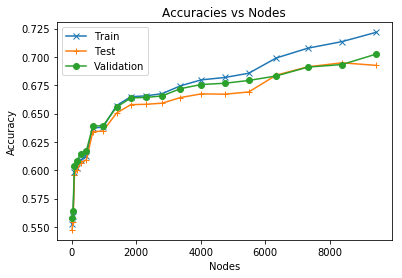

In [66]:
plt.plot(nodes,TrainAccuracies,marker='x')
plt.plot(nodes,TestAccuracies,marker='+')
plt.plot(nodes,ValidationAccuracies,marker='o')
plt.legend(['Train','Test','Validation'])
plt.ylabel('Accuracy')
plt.xlabel('Nodes')
plt.title('Accuracies vs Nodes')
plt.savefig('accnode.png')

ValueError: x and y must have same first dimension, but have shapes (10,) and (19,)

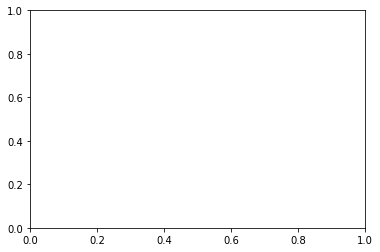

In [64]:
# Plot against Height
plt.plot(htlims,TrainAccuracies,marker='x')
plt.plot(htlims,TestAccuracies,marker='+')
plt.plot(htlims,ValidationAccuracies,marker='o')
plt.legend(['Train','Test','Validation'])
plt.ylabel('Accuracy')
plt.xlabel('Height')
plt.title('Accuracies vs Height')
plt.savefig('accht.png')

### Post-Pruning

In [75]:
# Create Tree
root = Tree();root.fit(len(X),0,40,[])

In [76]:
rootCopy = copy.deepcopy(root)

In [77]:
## Find the worst node
pruningTestAccuracies = []
pruningValidationAccuracies = []
nodes = []
num_nodes = root.count()
i=1
while(True):
    print("Iteration #"+str(i))
    vAcc = root.Accuracy(vX,vY)
    tAcc = root.Accuracy(tX,tY)
    pruningValidationAccuracies.append(vAcc)
    pruningTestAccuracies.append(tAcc)
    nodes.append(root.count())
    worstnode = ""
    accuracyTree = root.Accuracy(vX,vY)
    treeList = root.listTree('')
    for node in treeList:
        # Modify node to make it pseudo prune
        OriginalAttr = root.modify(node,-2)
        # Validation Accuracy
        accuracyPostPrune = root.Accuracy(vX,vY)
        print(node,accuracyPostPrune)
        if(accuracyPostPrune>accuracyTree):
            worstnode = node
            accuracyTree = accuracyPostPrune
        # Modify node back
        tmp = root.modify(node,OriginalAttr)
    if(worstnode==''):
        print("Done")
        break
    else:
        root.delete(worstnode)
    i+=1

Iteration #1
('', 0.522436491748563)
('0', 0.522621917300204)
('00', 0.522621917300204)
('000', 0.522621917300204)
('0000', 0.522621917300204)
('00000', 0.5225755609122937)
('000000', 0.5580845540515483)
('0000000', 0.5580845540515483)
('00000000', 0.5581309104394585)
('000000000', 0.5588262562581123)
('0000000000', 0.5623956981272019)
('00000000000', 0.5645744483589838)
('000000000000', 0.5908121639161876)
('0000000000000', 0.5922028555534953)
('00000000000000', 0.6004079362136102)
('000000000000000', 0.6019840534025589)
('0000000000000000', 0.6038383089189691)
('00000000000000000', 0.607129612460597)
('000000000000000000', 0.6070832560726868)
('0000000000000000000', 0.6081958093825329)
('00000000000000000000', 0.6081958093825329)
('000000000000000000000', 0.6081958093825329)
('0000000000000000000000', 0.6082421657704432)
('00000000000000000000000', 0.6087057296495457)
('000000000000000000000000', 0.6119043204153533)
('0000000000000000000000000', 0.6143148525866865)
('0000000000000000

('000000000000000000100000', 0.6393936584461338)
('0000000000000000001000000', 0.6393936584461338)
('00000000000000000010000000', 0.6393936584461338)
('000000000000000000100000000', 0.6393936584461338)
('0000000000000000001000000000', 0.6393936584461338)
('00000000000000000010000000000', 0.6393936584461338)
('000000000000000000100000000000', 0.6393936584461338)
('0000000000000000001000000000000', 0.6393936584461338)
('00000000000000000010000000000000', 0.6392545892824031)
('000000000000000000100000000000000', 0.6392545892824031)
('0000000000000000001000000000000000', 0.6392545892824031)
('00000000000000000010000000000000000', 0.6392545892824031)
('000000000000000000100000000000000000', 0.6392545892824031)
('0000000000000000001000000000000000000', 0.6392545892824031)
('00000000000000000010000000000000000000', 0.6392545892824031)
('000000000000000000100000000000000000000', 0.6392545892824031)
('0000000000000000001000000000000000000000', 0.6392545892824031)
('000000000000000001', 0.639300

('000000000000001000000000000000000000000', 0.6392545892824031)
('0000000000000010000000000000000000000000', 0.6392545892824031)
('00000000000001', 0.6390691637307621)
('000000000000010', 0.6390691637307621)
('0000000000000100', 0.6391618765065826)
('00000000000001000', 0.6391618765065826)
('000000000000010000', 0.6391618765065826)
('0000000000000100000', 0.6391618765065826)
('00000000000001000000', 0.6391618765065826)
('000000000000010000000', 0.6391618765065826)
('0000000000000100000000', 0.6391618765065826)
('00000000000001000000000', 0.6391618765065826)
('000000000000010000000000', 0.6392082328944929)
('0000000000000100000000000', 0.6392082328944929)
('00000000000001000000000000', 0.6392082328944929)
('000000000000010000000000000', 0.6392082328944929)
('0000000000000100000000000000', 0.6392082328944929)
('00000000000001000000000000000', 0.6392082328944929)
('000000000000010000000000000000', 0.6392082328944929)
('0000000000000100000000000000000', 0.6392545892824031)
('00000000000001

('0000000001000000000000000000000000000000', 0.6392545892824031)
('0000000001000000000000000000000000000001', 0.6392545892824031)
('000000000100000000000000000000000000001', 0.6392545892824031)
('0000000001000000000000000000000000000010', 0.6392545892824031)
('000000000100000000000000000000001', 0.6391618765065826)
('0000000001000000000000000000000010', 0.6392545892824031)
('00000000010000000000000000000000100', 0.6392545892824031)
('000000000100000000000000000000001000', 0.6392545892824031)
('0000000001000000000000000000000010000', 0.6392545892824031)
('00000000010000000000000000000000100000', 0.6392545892824031)
('000000000100000000000000000000001000000', 0.6392545892824031)
('0000000001000000000000000000000010000000', 0.6392545892824031)
('00000000010000000000000000000001', 0.6392545892824031)
('000000000100000000000000000000010', 0.6392545892824031)
('0000000001000000000000000000000100', 0.6392545892824031)
('00000000010000000000000000000001000', 0.6392545892824031)
('0000000001000

('000001000000000000000000000000001000000', 0.6392545892824031)
('0000010000000000000000000000000010000000', 0.6392545892824031)
('0000010000000000000000000000000010001', 0.6392545892824031)
('00000100000000000000000000000000100010', 0.6392545892824031)
('000001000000000000000000000000001000100', 0.6392545892824031)
('0000010000000000000000000000000010001000', 0.6392545892824031)
('000001000000000000000000000000001001', 0.6392545892824031)
('0000010000000000000000000000000010010', 0.6392545892824031)
('00000100000000000000000000000000100100', 0.6392545892824031)
('000001000000000000000000000000001001000', 0.6392545892824031)
('0000010000000000000000000000000010010000', 0.6392545892824031)
('0000010000000000000000000000000010011', 0.6392545892824031)
('00000100000000000000000000000000100110', 0.6392545892824031)
('000001000000000000000000000000001001100', 0.6392545892824031)
('0000010000000000000000000000000010011000', 0.6392545892824031)
('00000100000000000000000000000001', 0.639254589

('000001000000000000000000000011000000000', 0.6392545892824031)
('0000010000000000000000000000110000000000', 0.6392545892824031)
('000001000000000000000000000011000000001', 0.6392545892824031)
('0000010000000000000000000000110000000010', 0.6392545892824031)
('0000010000000000000000000000110000000011', 0.6392545892824031)
('0000010000000000000000000000110001', 0.6392545892824031)
('00000100000000000000000000001100010', 0.6392545892824031)
('000001000000000000000000000011000100', 0.6392545892824031)
('0000010000000000000000000000110001000', 0.6392545892824031)
('00000100000000000000000000001100010000', 0.6392545892824031)
('000001000000000000000000000011000100000', 0.6392545892824031)
('0000010000000000000000000000110001000000', 0.6392545892824031)
('00000100000000000000000000001100010001', 0.6392545892824031)
('000001000000000000000000000011000100010', 0.6392545892824031)
('0000010000000000000000000000110001000100', 0.6392545892824031)
('000001000000000000000000000011001', 0.63925458928

('000100000000000000000100', 0.6392545892824031)
('0001000000000000000001000', 0.6392545892824031)
('000100000000000000000101', 0.6392545892824031)
('0001000000000000000001010', 0.6392545892824031)
('000100000000000000001', 0.6392545892824031)
('0001000000000000000010', 0.6392545892824031)
('00010000000000000000100', 0.6392545892824031)
('000100000000000000001000', 0.6392545892824031)
('0001000000000000000010000', 0.6392545892824031)
('00010000000000000000100000', 0.6392545892824031)
('000100000000000000001000000', 0.6392545892824031)
('0001000000000000000010000000', 0.6392545892824031)
('0001000000000000000010000001', 0.6392545892824031)
('000100000000000000001000001', 0.6392545892824031)
('00010000000000000000100001', 0.6392545892824031)
('000100000000000000001000010', 0.6392545892824031)
('0001000000000000000010000100', 0.6392545892824031)
('00010000000000000000100001000', 0.6392545892824031)
('000100000000000000001000011', 0.6392545892824031)
('000100000000000000001001', 0.63925458

('0000000000000000000000000000100000', 0.6394863712219544)
('00000000000000000000000000001000000', 0.6394863712219544)
('000000000000000000000000000010000000', 0.6394863712219544)
('0000000000000000000000000000100000000', 0.6394863712219544)
('00000000000000000000000000001000000000', 0.6394863712219544)
('000000000000000000000000000010000000000', 0.6394863712219544)
('0000000000000000000000000000100000000000', 0.6394863712219544)
('0000000000000000000000000001', 0.6394400148340441)
('00000000000000000000000000010', 0.6394863712219544)
('000000000000000000000000000100', 0.6394863712219544)
('0000000000000000000000000001000', 0.6394863712219544)
('000000000000000000000000001', 0.6393009456703134)
('0000000000000000000000000010', 0.6393473020582237)
('00000000000000000000000000100', 0.6394400148340441)
('000000000000000000000000001000', 0.6394400148340441)
('0000000000000000000000000010000', 0.6394400148340441)
('00000000000000000000000000100000', 0.6394400148340441)
('0000000000000000000

('000000000000000010000000000000001000', 0.6394863712219544)
('0000000000000000100000000000000010000', 0.6394863712219544)
('00000000000000001000000000000000100000', 0.6394863712219544)
('000000000000000010000000000000001000000', 0.6394863712219544)
('0000000000000000100000000000000010000000', 0.6394863712219544)
('00000000000000001000000000000001', 0.6394863712219544)
('000000000000000010000000000000010', 0.6394863712219544)
('0000000000000000100000000000000100', 0.6394863712219544)
('00000000000000001000000000000001000', 0.6394863712219544)
('000000000000000010000000000000010000', 0.6394863712219544)
('0000000000000000100000000000000100000', 0.6394863712219544)
('00000000000000001000000000000001000000', 0.6394863712219544)
('000000000000000010000000000000010000000', 0.6394863712219544)
('0000000000000000100000000000000100000000', 0.6394863712219544)
('0000000000000001', 0.6394863712219544)
('00000000000000010', 0.6394863712219544)
('000000000000000100', 0.6394863712219544)
('00000000

('00000000001000000000000000000010000', 0.6394863712219544)
('000000000010000000000000000000100000', 0.6394863712219544)
('0000000000100000000000000000001000000', 0.6394863712219544)
('00000000001000000000000000000010000000', 0.6394863712219544)
('000000000010000000000000000000100000000', 0.6394863712219544)
('0000000000100000000000000000001000000000', 0.6394863712219544)
('000000000010000000000000000001', 0.6394863712219544)
('0000000000100000000000000000010', 0.6394863712219544)
('0000000000100000000000000001', 0.6394863712219544)
('00000000001000000000000000010', 0.6394863712219544)
('000000000010000000000000001', 0.6394863712219544)
('0000000000100000000000000010', 0.6394863712219544)
('00000000001000000000001', 0.6394863712219544)
('0000000001', 0.6394400148340441)
('00000000010', 0.6394400148340441)
('000000000100', 0.6394400148340441)
('0000000001000', 0.6394400148340441)
('00000000010000', 0.6394400148340441)
('000000000100000', 0.6394400148340441)
('0000000001000000', 0.639440

('000001000000000000000000000000000010', 0.6394863712219544)
('0000010000000000000000000000000000100', 0.6394863712219544)
('00000100000000000000000000000000001000', 0.6394863712219544)
('000001000000000000000000000000000010000', 0.6394863712219544)
('0000010000000000000000000000000000100000', 0.6394863712219544)
('00000100000000000000000000000000001001', 0.6394863712219544)
('000001000000000000000000000000000010010', 0.6394863712219544)
('0000010000000000000000000000000000100100', 0.6394863712219544)
('000001000000000000000000000000000010011', 0.6394863712219544)
('0000010000000000000000000000000000100110', 0.6394863712219544)
('0000010000000000000000000000000001', 0.6394863712219544)
('00000100000000000000000000000000010', 0.6394863712219544)
('000001000000000000000000000000000100', 0.6394863712219544)
('0000010000000000000000000000000001000', 0.6394863712219544)
('00000100000000000000000000000000010000', 0.6394863712219544)
('000001000000000000000000000000000100000', 0.6394863712219

('00000100000000000000000000001010000001', 0.6394863712219544)
('000001000000000000000000000010100000010', 0.6394863712219544)
('0000010000000000000000000000101000000100', 0.6394863712219544)
('000001000000000000000000000010100001', 0.6394863712219544)
('0000010000000000000000000000101000010', 0.6394863712219544)
('00000100000000000000000000001010000100', 0.6394863712219544)
('000001000000000000000000000010100001000', 0.6394863712219544)
('0000010000000000000000000000101000010000', 0.6394863712219544)
('00000100000000000000000000001010001', 0.6394863712219544)
('000001000000000000000000000010100010', 0.6394863712219544)
('0000010000000000000000000000101000100', 0.6394863712219544)
('00000100000000000000000000001010001000', 0.6394863712219544)
('000001000000000000000000000010100010000', 0.6394863712219544)
('0000010000000000000000000000101000100000', 0.6394863712219544)
('0000010000000000000000000000101001', 0.6394863712219544)
('00000100000000000000000000001010010', 0.6394863712219544)

('0001000000000000000000000100001000000', 0.6394863712219544)
('00010000000000000000000001000010000000', 0.6394863712219544)
('000100000000000000000000010000100000000', 0.6394863712219544)
('0001000000000000000000000100001000000000', 0.6394863712219544)
('000100000000000000000000010001', 0.6394863712219544)
('0001000000000000000000000100010', 0.6394863712219544)
('00010000000000000000000001000100', 0.6394863712219544)
('000100000000000000000000010001000', 0.6394863712219544)
('0001000000000000000000000100010000', 0.6394863712219544)
('00010000000000000000000001000100000', 0.6394863712219544)
('000100000000000000000000010001000000', 0.6394863712219544)
('0001000000000000000000000100010000000', 0.6394863712219544)
('00010000000000000000000001000100000000', 0.6394863712219544)
('000100000000000000000000010001000000000', 0.6394863712219544)
('0001000000000000000000000100010000000000', 0.6394863712219544)
('00010000000000000000000001001', 0.6394863712219544)
('000100000000000000000000010010

('00000000000000000000000000000000000100', 0.6396254403856851)
('000000000000000000000000000000000001000', 0.6396254403856851)
('0000000000000000000000000000000000010000', 0.6395790839977749)
('00000000000000000000000000000000001', 0.6396254403856851)
('000000000000000000000000000000000010', 0.6396254403856851)
('0000000000000000000000000000000000100', 0.6396254403856851)
('00000000000000000000000000000000001000', 0.6396254403856851)
('000000000000000000000000000000000010000', 0.6396254403856851)
('0000000000000000000000000000000000100000', 0.6396254403856851)
('000000000000000000000000000000001', 0.6396254403856851)
('0000000000000000000000000000000010', 0.6396254403856851)
('00000000000000000000000000000000100', 0.6396254403856851)
('00000000000000000000000000000001', 0.6394400148340441)
('000000000000000000000000000000010', 0.6395327276098647)
('0000000000000000000000000000000100', 0.6396254403856851)
('00000000000000000000000000000001000', 0.6395790839977749)
('00000000000000000000

('0000000000000000100000000000000000000000', 0.6396254403856851)
('00000000000000001000000000000000001', 0.6396254403856851)
('000000000000000010000000000000000010', 0.6396254403856851)
('0000000000000000100000000000000000100', 0.6396254403856851)
('00000000000000001000000000000000001000', 0.6396254403856851)
('000000000000000010000000000000000010000', 0.6396254403856851)
('0000000000000000100000000000000000100000', 0.6396254403856851)
('0000000000000000100000000000000001', 0.6396254403856851)
('00000000000000001000000000000000010', 0.6396254403856851)
('000000000000000010000000000000000100', 0.6396254403856851)
('0000000000000000100000000000000001000', 0.6396254403856851)
('00000000000000001000000000000000010000', 0.6396254403856851)
('000000000000000010000000000000000100000', 0.6396254403856851)
('0000000000000000100000000000000001000000', 0.6396254403856851)
('000000000000000010000000000000001', 0.6396254403856851)
('0000000000000000100000000000000010', 0.6396254403856851)
('0000000

('00000000001000000000', 0.6395327276098647)
('000000000010000000000', 0.6395327276098647)
('0000000000100000000000', 0.6395327276098647)
('00000000001000000000000', 0.6395327276098647)
('000000000010000000000000', 0.6395327276098647)
('0000000000100000000000000', 0.6395327276098647)
('00000000001000000000000000', 0.6395327276098647)
('000000000010000000000000000', 0.6395327276098647)
('0000000000100000000000000000', 0.6395327276098647)
('00000000001000000000000000000', 0.6395327276098647)
('000000000010000000000000000000', 0.6395327276098647)
('0000000000100000000000000000000', 0.6395327276098647)
('00000000001000000000000000000000', 0.6395327276098647)
('000000000010000000000000000000000', 0.6395327276098647)
('0000000000100000000000000000000000', 0.6396254403856851)
('000000000010000000000000000000001', 0.6396254403856851)
('0000000000100000000000000000001', 0.6396254403856851)
('00000000001000000000000000000010', 0.6396254403856851)
('000000000010000000000000000000100', 0.639625440

KeyboardInterrupt: 

In [ ]:
plt.plot(nodes,pruningTestAccuracies)
plt.plot(nodes,pruningValidationAccuracies)
plt.show()

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
n_est_grid = 100 * (np.arange(5)) + 50
max_features_grid = 0.2 * (np.arange(2)) + 0.1
min_sample_split_grid = 2 * (np.arange(5)+1)

In [ ]:
n_est_grid

In [ ]:
param_grid = {
#     'n_estimators': n_est_grid,
    'max_features': max_features_grid,
#     'min_samples_split': min_sample_split_grid
}

In [ ]:
search = GridSearchCV(RandomForestClassifier(n_estimators=100,bootstrap=True,oob_score=False), param_grid)

In [ ]:
search.fit(X,Y)

In [ ]:
search.estimator.oob_score

In [ ]:
R = search.predict(tX)
Correct = len(np.where(R==tY)[0])
Accuracy = float(Correct)/float(len(R))
print("Accuracy: "+str(Accuracy))

In [ ]:
clf = RandomForestClassifier(max_features=0.8,min_samples_split=5,warm_start=True, oob_score=True)

In [ ]:
clf.fit(X,Y)

In [ ]:
clf.oob_score_

In [ ]:
R = clf.predict(tX)

In [ ]:
Correct = len(np.where(R==tY)[0])
Accuracy = float(Correct)/float(len(R))
print("Accuracy: "+str(Accuracy))